In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('all-data.csv', encoding='ISO-8859-1')

# Exploring data

In [3]:
df.head()

,Sentiment,News Headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sentiment      4846 non-null   object
 1   News Headline  4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [5]:
df.isnull().sum()

Sentiment        0
News Headline    0
dtype: int64

In [6]:
df['Sentiment'].value_counts()

Sentiment
neutral     2879
positive    1363
negative     604
Name: count, dtype: int64

# Feature Extraction

In [7]:
y=df['Sentiment'].values
y.shape

(4846,)

In [8]:
x=df['News Headline'].values
x.shape

(4846,)

# Train-Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [11]:
x_train.shape

(2907,)

In [12]:
x_test.shape

(1939,)

In [13]:
y_train.shape

(2907,)

In [14]:
y_test.shape

(1939,)

In [15]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'news'})

In [16]:
df1

,news
0,The two companies will also partner in further...
1,Operating profit for the 12-month period decre...
2,The Board of Directors proposes to the Shareho...
3,"Also , a six-year historic analysis is provide..."
4,In addition the deal includes a call option wh...
...,...
2902,The announcement pushed Freenet shares down 6....
2903,"Svyturys-Utenos Alus , which is controlled by ..."
2904,`` Several growth initiatives in the chosen ge...
2905,"Cohen & Steers , Inc. : 5 534 626 shares repre..."


In [17]:
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})

In [18]:
df2

,sentiment
0,positive
1,negative
2,neutral
3,neutral
4,positive
...,...
2902,negative
2903,positive
2904,positive
2905,neutral


In [19]:
df_train=pd.concat([df1,df2],axis=1)

In [20]:
df_train.head()

,news,sentiment
0,The two companies will also partner in further...,positive
1,Operating profit for the 12-month period decre...,negative
2,The Board of Directors proposes to the Shareho...,neutral
3,"Also , a six-year historic analysis is provide...",neutral
4,In addition the deal includes a call option wh...,positive


In [21]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'news'})

In [22]:
df3

,news
0,"According to the company , staff will be laid ..."
1,"Of the sales price , a sales gain of some 3.1 ..."
2,The aim is to increase sales by at least one f...
3,"Kaido Kaare , general director for Atria Eesti..."
4,Their offering also covers localisation servic...
...,...
1934,Vaisala 's Present Weather Detector measures v...
1935,The completion of the recycling plant is an im...
1936,----------------------------------------------...
1937,"In the Baltic countries , development of opera..."


In [23]:
df4=pd.DataFrame(y_test)
df4=df4.rename(columns={0:'sentiment'})

In [24]:
df4

,sentiment
0,negative
1,positive
2,positive
3,positive
4,neutral
...,...
1934,neutral
1935,positive
1936,neutral
1937,negative


In [25]:
df_test=pd.concat([df3,df4],axis=1)
df_test.head()

,news,sentiment
0,"According to the company , staff will be laid ...",negative
1,"Of the sales price , a sales gain of some 3.1 ...",positive
2,The aim is to increase sales by at least one f...,positive
3,"Kaido Kaare , general director for Atria Eesti...",positive
4,Their offering also covers localisation servic...,neutral


# Basic Pre-Processing of Train and Test Data

In [26]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
def remove_punctuation(text):
    if(type(text)==float):
        return text
    ans=""
    for i in text:
        if i not in string.punctuation:
            ans+=i
    return ans

In [28]:
df_train['news']=df_train['news'].apply(lambda x:remove_punctuation(x))
df_test['news']=df_train['news'].apply(lambda x:remove_punctuation(x))

In [29]:
df_train.head()

,news,sentiment
0,The two companies will also partner in further...,positive
1,Operating profit for the 12month period decrea...,negative
2,The Board of Directors proposes to the Shareho...,neutral
3,Also a sixyear historic analysis is provided ...,neutral
4,In addition the deal includes a call option wh...,positive


In [30]:
df_test.head()

,news,sentiment
0,The two companies will also partner in further...,negative
1,Operating profit for the 12month period decrea...,positive
2,The Board of Directors proposes to the Shareho...,positive
3,Also a sixyear historic analysis is provided ...,positive
4,In addition the deal includes a call option wh...,neutral


In [31]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Code to Generate N-grams

In [32]:
def generate_N_grams(text, ngram=1):
    words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]
    print('Sentence after removing stopwords: ',words)
    temp=zip(*[words[i:] for i in range(0, ngram)])
    ans=[' '.join(ngram) for ngram in temp]
    return ans

In [33]:
generate_N_grams('The sun rises in the east',2)

Sentence after removing stopwords:  ['The', 'sun', 'rises', 'east']


['The sun', 'sun rises', 'rises east']

# Creating Unigrams

In [34]:
from collections import defaultdict

In [35]:
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)

for text in df_train[df_train.sentiment=="positive"].news:
    for word in generate_N_grams(text):
        positiveValues[word]+=1
        
for text in df_train[df_train.sentiment=="negative"].news:
    for word in generate_N_grams(text):
        negativeValues[word]+=1
        
for text in df_train[df_train.sentiment=="neutral"].news:
    for word in generate_N_grams(text):
        neutralValues[word]+=1

Sentence after removing stopwords:  ['The', 'two', 'companies', 'also', 'partner', 'developing', 'Raiso', 'cholesterol', 'lowering', 'brand', '', 'Benecol', '']
Sentence after removing stopwords:  ['In', 'addition', 'deal', 'includes', 'call', 'option', 'enable', 'Maritim', 'Food', 'AS', 'increase', 'holding', 'Sandanger', 'AS', '51', '', 'future', '']
Sentence after removing stopwords:  ['Finnish', 'handling', 'systems', 'company', 'Cargotec', 'Oyj', '', 'HEL', '', 'CGCBV', '', 'said', 'today', 'EUR', '13', 'million', '', 'USD', '166', '', 'contract', 'deliver', 'MacGregor', 'hatch', 'covers', 'ships', 'ordered', 'Norwegian', 'shipowner', 'Grieg', 'Shipping', '']
Sentence after removing stopwords:  ['Finnish', 'lifting', 'equipment', 'maker', 'Kone', 'Oyj', 'said', 'October', '4', '', '2007', 'order', 'worth', '15', 'mln', 'euro', '', '212', 'mln', 'deliver', 'total', '53', 'custom', 'designed', 'elevators', 'Norwegian', 'shipbuilder', 'Aker', 'Yards', 'ASA', '']
Sentence after removi

Sentence after removing stopwords:  ['Growth', 'expected', 'continue', '2008', '']
Sentence after removing stopwords:  ['At', 'time', 'profit', 'company', 'increased', '10', '', 'H1', 'reached', 'Ls', '79000', '']
Sentence after removing stopwords:  ['The', 'expansion', 'aims', 'attract', 'new', 'customers', 'Finland', 'abroad', '']
Sentence after removing stopwords:  ['CEO', 'company', 'Tarmo', 'Noop', 'said', 'growth', 'sale', 'premium', 'beers', 'biggest', '']
Sentence after removing stopwords:  ['The', 'solutions', 'used', 'upgrading', 'networks', 'Russian', 'MSO', '37', 'different', 'cities', 'Russia', '']
Sentence after removing stopwords:  ['', 'Demand', 'sports', 'equipment', 'good', '2005', '']
Sentence after removing stopwords:  ['Finnish', 'Bank', 'land', 'consolidated', 'net', 'operating', 'profit', 'increased', 'EUR', '48', 'mn', 'first', 'quarter', '2005', 'EUR', '64', 'mn', 'first', 'quarter', '2006', '']
Sentence after removing stopwords:  ['', 'Beyond', 'improved', 'vo

Sentence after removing stopwords:  ['', 'ADP', 'News', '', '', 'Dec', '11', '', '2008', '', 'Finnish', 'construction', 'engineering', 'company', 'Outotec', 'Oyj', '', 'OMX', '', 'OTE1V', '', 'said', 'today', 'EUR', '28', 'million', '', 'USD', '368', '', 'order', 'expand', 'phosphate', 'concentrator', 'Siilinjarvi', 'Norwegian', 'minera']
Sentence after removing stopwords:  ['Sanoma', 'Magazines', '', 'net', 'sales', 'estimated', 'grow', '2006', '']
Sentence after removing stopwords:  ['In', 'third', 'quarter', '', 'net', 'sales', 'increased', '12', '', 'yearonyear', 'EUR', '1595', 'million', '', '6', '', 'comparable', 'currency', 'rates', 'growth', '']
Sentence after removing stopwords:  ['The', 'District', 'Court', 'Helsinki', 'dismissed', 'charges', 'court', 'first', 'instance', '2005', '']
Sentence after removing stopwords:  ['Consolidated', 'operating', 'profit', 'excluding', 'oneoff', 'items', 'EUR', '306', 'mn', '', 'EUR', '296', 'mn', 'year', 'earlier', '']
Sentence after remov

Sentence after removing stopwords:  ['OUTOTEC', 'OYJ', 'PRESS', 'RELEASE', '', 'FEBRUARY', '19', '', '2008', 'AT', '1100', 'AM', 'Outotec', 'two', 'large', 'minerals', 'processing', 'technology', 'orders', 'Mirabela', 'Mineracao', 'Brasil', 'Ltda', '', 'Brazil', 'Cumerio', 'Med', 'JSCo', '', 'Bulgaria', '']
Sentence after removing stopwords:  ['Thereby', '', 'company', 'expand', 'offering', 'North', '', 'Central', 'South', 'America', '']
Sentence after removing stopwords:  ['', 'We', 'pleased', 'working', 'Fujitsu', 'NTT', 'DoCoMo', 'advance', 'progress', 'LTE', '', '', 'said', 'Juergen', 'Walter', '', 'Head', 'Converged', 'Core', '', 'Nokia', 'Siemens', 'Networks', '']
Sentence after removing stopwords:  ['Reuse', 'back', 'PET', 'bottles', 'also', 'steadily', 'increased', 'rate', 'use', 'strapping', 'tape', 'picked', 'dip', '2005', '', 'Petcore', 'said', 'previously', '']
Sentence after removing stopwords:  ['Comptel', '', 'vendor', 'dynamic', 'Operations', 'Support', 'System', '', 'O

Sentence after removing stopwords:  ['According', 'Mreal', 'CEO', '', 'Mikko', 'Helander', '', 'transaction', 'enable', 'company', 'proceed', 'swiftly', 'restructuring', 'program', '']
Sentence after removing stopwords:  ['According', 'Olvi', 'Managing', 'Director', 'Lasse', 'Aho', '', 'company', 'ongoing', 'MMX', 'Plus', 'project', 'aims', 'find', 'growth', 'outside', 'Finland', '']
Sentence after removing stopwords:  ['', 'I', 'pleased', 'receive', 'Nomination', 'Committee', 'request', 'confidence', '', '', 'says', 'Jon', 'Risfelt', '']
Sentence after removing stopwords:  ['SKF', '6', 'April', '2010', '', 'Alandsbanken', 'given', '', 'buy', '', 'recommendation', 'Swedish', 'industrial', 'company', 'SKF', 'AB', '', 'STO', '', 'SKF', 'B', '', 'share', 'price', 'target', 'SEK150', '']
Sentence after removing stopwords:  ['3', 'February', '2011', '', 'Finnish', 'broadband', 'data', 'communication', 'systems', 'provider', 'Teleste', 'Oyj', 'HEL', '', 'TLT1V', 'said', 'yesterday', 'net', '

Sentence after removing stopwords:  ['Those', 'partially', 'offset', '186', 'mln', 'eur', 'gain', 'sale', 'Celbi', 'pulp', 'plant', 'Portugal', '']
Sentence after removing stopwords:  ['This', 'truly', 'takes', 'efficiency', 'new', 'heights', '', '', 'Mr', 'Metso', 'adds', '']
Sentence after removing stopwords:  ['Estonian', 'telecoms', 'company', 'Elisa', 'customer', 'numbers', 'cross', '400000', 'TALLINN', '', 'Oct', '22', '', 'BNS', '', 'The', 'Estonian', 'telecommunications', 'company', 'Elisa', 'approximately', '50000', 'new', 'clients', 'nine', 'months', 'year', '', 'bringing', 'number', '401800', 'end', 'September', '', 'company', 'said', '']
Sentence after removing stopwords:  ['Revenue', 'July', 'September', 'grew', '14', 'percent', '', 'EURO', '', '467', 'million', 'year', 'earlier', '', 'company', 'said', 'Thursday', '']
Sentence after removing stopwords:  ['It', 'line', 'plans', 'focus', 'selected', 'growth', 'segments', 'streamline', 'corporate', 'structure', '']
Sentence 

Sentence after removing stopwords:  ['Operating', 'result', 'including', 'nonrecurring', 'items', 'rose', 'EUR', '146mn', 'loss', 'EUR', '267mn', '2009', '']
Sentence after removing stopwords:  ['Finland', 'national', 'carrier', 'Finnair', 'PLC', 'carried', 'record', '85', 'million', 'passengers', '2005', '', 'increase', '45', 'percent', 'previous', 'year', '', 'airline', 'reported', 'Tuesday', '']
Sentence after removing stopwords:  ['The', 'company', 'expects', 'net', 'sales', 'significantly', 'increase', '2009', '']
Sentence after removing stopwords:  ['Finnish', 'KCI', 'Konecranes', 'awarded', 'order', 'four', 'hot', 'metal', 'ladle', 'cranes', 'Indian', 'steel', 'producer', 'Bhushan', 'Steel', '', 'Strips', 'delivered', '2007', '']
Sentence after removing stopwords:  ['The', 'Vaisala', 'Group', 'successful', 'international', 'technology', 'company', 'develops', '', 'manufactures', 'markets', 'electronic', 'measurement', 'systems', 'products', '']
Sentence after removing stopwords:

Sentence after removing stopwords:  ['Significance', '', 'Teleste', 'emphasised', 'large', 'size', 'growing', 'economy', '', 'well', 'rapid', 'development', 'TV', 'services', 'distribution', 'industry', '', 'Poland', 'viewed', 'attractive', 'market', '']
Sentence after removing stopwords:  ['In', 'fourth', 'quarter', '2008', '', 'net', 'sales', 'increased', '2', '', 'EUR', '10507', 'mn', 'EUR', '10270', 'mn', 'fourth', 'quarter', '2007', '']
Sentence after removing stopwords:  ['One', 'installed', 'elevators', 'doubledeck', 'elevator', '', 'enables', 'efficient', 'use', 'building', 'core', 'space', '']
Sentence after removing stopwords:  ['Operating', 'profit', 'improved', '440', '', 'ER', '47', 'mn', 'EUR', '33', 'mn', '2004', '']
Sentence after removing stopwords:  ['The', 'shopping', 'center', 'opened', 'St', 'Petersburg', '', 'Russia', 'November', '2010', 'turn', 'cash', 'flow', 'Finnish', 'department', 'store', 'chain', 'Stockmann', 'Russian', 'operations', 'positive', 'first', 't

Sentence after removing stopwords:  ['', 'Last', 'year', '', 'Finnair', 'recorded', '326percent', 'growth', 'Asian', 'sector', '', 'carrying', '110', 'million', 'passengers', 'two', 'continents', '', '']
Sentence after removing stopwords:  ['TeliaSonera', 'TLSN', 'said', 'offer', 'line', 'strategy', 'increase', 'ownership', 'core', 'business', 'holdings', 'would', 'strengthen', 'Eesti', 'Telekom', 'offering', 'customers', '']
Sentence after removing stopwords:  ['', 'We', 'feeling', 'quite', 'positive', 'region', 'whole', '']
Sentence after removing stopwords:  ['The', 'aim', 'annual', 'improvement', 'Ruukki', 'Construction', 'operating', 'profit', 'EUR', '3', 'million', 'USD', '41', 'starting', '2009', '']
Sentence after removing stopwords:  ['With', 'acquisition', '', 'company', 'expand', 'offering', 'North', '', 'Central', 'South', 'America', '', 'said', '']
Sentence after removing stopwords:  ['New', 'product', 'launches', 'Finland', 'double', '2005', '']
Sentence after removing st

Sentence after removing stopwords:  ['VDW', 'combined', 'LXE', 'devices', 'enhances', 'productivity', '', 'enabling', 'workers', 'use', 'single', 'device', 'perform', 'voice', '', 'scanning', 'keyboard', 'functions', '']
Sentence after removing stopwords:  ['The', 'actions', 'expected', 'deliver', 'annual', 'cost', 'savings', 'EUR1520m', '']
Sentence after removing stopwords:  ['Operating', 'profit', 'rose', 'EUR', '1034', 'mn', 'EUR', '232', 'corresponding', 'period', '2006', '']
Sentence after removing stopwords:  ['The', 'company', 'use', 'assets', 'strengthening', 'balance', 'sheet', 'financial', 'position', '']
Sentence after removing stopwords:  ['In', '2006', '', 'company', 'intends', 'invest', 'significantly', 'expanding', 'distribution', 'maintenance', 'network', '']
Sentence after removing stopwords:  ['Diluted', 'EPS', 'rose', 'EUR3', '68', 'EUR0', '50', '']
Sentence after removing stopwords:  ['Finnish', 'steel', 'maker', 'Rautaruukki', 'Oyj', '', 'HEL', '', 'RTRKS', '', ''

Sentence after removing stopwords:  ['Airvana', 'UMTS', 'Home', 'Base', 'Station', 'femto', 'cell', 'uses', 'softwarebased', 'functionality', 'offtheshelf', 'silicon', 'accelerate', 'feature', 'development', 'reduce', 'product', 'cost', '']
Sentence after removing stopwords:  ['However', '', 'broker', 'gave', '', 'outperform', '', 'recommendation', 'stock', '']
Sentence after removing stopwords:  ['About', 'Nokia', 'Nokia', 'pioneer', 'mobile', 'telecommunications', 'world', 'leading', 'maker', 'mobile', 'devices', '']
Sentence after removing stopwords:  ['In', 'third', 'quarter', '2010', '', 'net', 'sales', 'increased', '52', '', 'EUR', '2055', 'mn', '', 'operating', 'profit', '349', '', 'EUR', '235', 'mn', '']
Sentence after removing stopwords:  ['It', 'also', '77', 'pct', '12month', 'volume', 'weighted', 'average', 'price', 'stock', '']
Sentence after removing stopwords:  ['In', 'January', '', 'traffic', '', 'measured', 'revenue', 'passenger', 'kilometres', 'RPK', '', 'went', '32', 

Sentence after removing stopwords:  ['According', 'PKC', '', 'acquisition', 'would', 'bring', 'significant', 'addition', 'PKC', 'customer', 'base', '']
Sentence after removing stopwords:  ['Higher', 'bit', 'rates', 'outgoing', 'traffic', 'improves', 'enduser', 'experience', 'mobile', 'broadband', 'services', 'video', 'conferencing', '', 'file', 'sharing', 'sending', 'emails', 'attachments', '']
Sentence after removing stopwords:  ['The', 'fair', 'value', 'investment', 'properties', 'totaled', 'EUR', '25349', 'mn', '', 'EUR', '24551', 'mn', '2006', '']
Sentence after removing stopwords:  ['Mreal', 'sales', 'expected', 'increased', '4', '', 'yearonyear', 'EUR609m', 'second', 'quarter', '2010', '']
Sentence after removing stopwords:  ['Adjusted', 'changes', 'Group', 'structure', '', 'Division', 'net', 'sales', 'increased', '17', '', '']
Sentence after removing stopwords:  ['Panostaja', 'Oyj', '', 'Panostaja', '', 'Board', 'Directors', 'decided', '16', 'December', '2010', 'new', 'longterm'

Sentence after removing stopwords:  ['Sales', 'rose', '3009', 'mln', 'eur', 'compared', 'last', 'year', '2761', 'mln', 'eur', 'line', '299', 'mln', 'eur', 'consensus', 'figure', '']
Sentence after removing stopwords:  ['Sales', 'rose', '10', 'pct', '566', 'mln', 'eur', 'back', 'strong', 'volume', 'favourable', 'currency', 'effects', '']
Sentence after removing stopwords:  ['The', 'company', 'booked', 'AprilJune', 'new', 'orders', 'worth', '949', 'mln', 'eur', '', 'compared', '786', 'mln', 'eur', 'period', 'year', 'ago', '']
Sentence after removing stopwords:  ['The', 'item', 'included', 'restructuring', 'costs', 'EUR1', '6', '', 'year', 'earlier', 'EUR13', '1', 'Diluted', 'EPS', 'stood', 'EUR0', '3', 'versus', 'loss', 'per', 'share', 'EUR', '01', '']
Sentence after removing stopwords:  ['The', 'bank', 'forecasts', 'Finland', 'GDP', 'grow', '2', '', '2010', '2011', '']
Sentence after removing stopwords:  ['However', '', 'bottomline', 'result', 'improved', 'thanks', 'positive', 'financia

Sentence after removing stopwords:  ['According', 'Bosse', '', 'present', 'cooperation', 'beneficial', 'parties', '', 'however', '']
Sentence after removing stopwords:  ['Speaking', 'justdrinks', 'today', '', 'spokesperson', 'Olvi', 'said', '', '', 'We', 'performed', 'well', 'four', 'countries', 'operate', '', 'namely', '', 'Finland', '', 'Estonia', '', 'Latvia', 'Lithuania', '', '']
Sentence after removing stopwords:  ['The', 'service', 'intended', 'allow', 'people', 'thirteen', 'Mediterranean', 'countries', 'reach', 'Baltic', 'rapidly', '', 'single', 'carrier', '']
Sentence after removing stopwords:  ['It', 'currently', 'employs', '750', 'people', 'expects', 'headcount', 'reach', '1000', 'end', '2007', '']
Sentence after removing stopwords:  ['STX', 'Finland', 'Oy', 'signed', 'preliminary', 'agreement', 'building', 'environmentally', 'friendly', '', 'new', 'generation', 'cruise', 'ferry', 'Viking', 'Line', 'manage', 'Turku', '', 'Finland', '', 'Stockholm', '', 'Sweden', 'withViking',

Sentence after removing stopwords:  ['According', 'Finnish', 'Aktia', 'Bank', 'Managing', 'Director', 'Jussi', 'Laitinen', '', 'bank', 'aim', 'triple', 'number', 'customers', 'Finland', 'next', 'five', 'years', '']
Sentence after removing stopwords:  ['Operating', 'profit', 'EUR', '98', 'mn', '', 'compared', 'loss', 'EUR', '127', 'mn', 'corresponding', 'period', '2009', '']
Sentence after removing stopwords:  ['Aspo', 'Plc', 'STOCK', 'EXCHANGE', 'RELEASE', 'February', '11', '', '2011', 'at8', '45', 'ESL', 'Shipping', 'Ltd', '', 'part', 'Aspo', 'Group', '', 'signed', 'new', '', 'longterm', 'contract', 'Rautaruukki', 'Corporation', 'marine', 'transport', 'raw', 'materials', 'Baltic', 'Sea', '']
Sentence after removing stopwords:  ['However', '', 'net', 'sales', '2010', 'seen', 'grown', 'EUR598', '3', 'EUR582', '3', '2009', '']
Sentence after removing stopwords:  ['The', 'growth', 'net', 'sales', 'continued', 'favourably', 'Middle', 'East', 'Africaand', 'Asia', 'Pacific', '']
Sentence aft

Sentence after removing stopwords:  ['Finnish', 'fibers', 'plastic', 'products', 'maker', 'Suominen', 'Corporation', 'said', 'net', 'loss', 'narrowed', '16', 'mln', 'euro', '', '20', 'mln', 'first', 'nine', 'months', '2006', '216', 'mln', 'euro', '', '27', 'mln', 'period', '2005', '']
Sentence after removing stopwords:  ['The', 'parties', 'agreed', 'negotiate', 'definitive', 'distribution', 'license', 'agreements', 'end', 'June', '2010', '']
Sentence after removing stopwords:  ['Previously', '', 'company', 'anticipated', 'operating', 'profit', 'improve', 'period', '']
Sentence after removing stopwords:  ['Profit', 'period', 'EUR', '59', 'mn', '', 'EUR', '13', 'mn', '']
Sentence after removing stopwords:  ['According', 'CEO', 'Kai', 'Telanne', '', 'company', 'newspapers', 'achieved', 'best', 'financial', 'result', 'ever', '']
Sentence after removing stopwords:  ['', 'After', 'fixing', 'homebase', '', 'cutting', 'costs', 'closing', 'nonprofitable', 'units', '', 'looking', 'going', 'forwa

Sentence after removing stopwords:  ['Adanac', 'Molybdenum', 'Canada', 'ordered', 'grinding', 'technology', 'molybdenum', 'project', 'British', 'Columbia', '', 'Canada', '', 'Shalkiya', 'Zinc', 'Kazakhstan', 'awarded', 'contract', 'grinding', 'technology', 'Shalkiya', 'zinclead', 'project', 'Kazakhstan', '']
Sentence after removing stopwords:  ['Finnish', 'forest', 'machinery', 'manufacturer', 'Ponsse', 'net', 'sales', 'grew', 'EUR', '513', 'mn', 'first', 'quarter', '2010', 'EUR', '375', 'mn', 'corresponding', 'period', '2009', '']
Sentence after removing stopwords:  ['Outotec', 'said', 'new', 'orders', 'worth', '4929', 'mln', 'eur', 'quarter', '', 'compared', '2404', 'mln', 'eur', 'year', 'earlier', '']
Sentence after removing stopwords:  ['The', 'concept', 'enables', 'commercially', 'affordable', 'way', 'manufacture', 'highquality', 'TCO', 'coated', 'glass', 'solar', 'industry', '']
Sentence after removing stopwords:  ['The', 'price', 'raw', 'material', 'aluminium', 'went', 'end', '2

Sentence after removing stopwords:  ['Operating', 'loss', 'totaled', 'EUR', '03', 'mn', 'compared', 'profit', 'EUR', '22', 'mn', 'corresponding', 'period', '2007', '']
Sentence after removing stopwords:  ['UPMKymmene', 'Corp', '', 'world', 'largest', 'maker', 'magazine', 'paper', '', 'Tuesday', 'reported', '19percent', 'profit', 'drop', 'lower', 'paper', 'prices', '', 'higher', 'costs', 'strong', 'euro', 'hurt', 'revenue', '']
Sentence after removing stopwords:  ['However', '', 'orders', 'received', 'period', 'review', 'fell', '17', '', 'quarteronquarter', 'EUR', '213', 'million', 'recorded', 'second', 'quarter', '2010', '']
Sentence after removing stopwords:  ['The', 'air', 'traffic', 'Finland', 'stoppage', 'since', '']
Sentence after removing stopwords:  ['Finnish', 'Food', 'Workers', '', 'Union', 'SEL', 'plans', 'hasten', 'collective', 'bargaining', 'twoday', 'strike', 'would', 'begin', '7', 'April', '2010', '', 'Finland', '']
Sentence after removing stopwords:  ['UPM', 'said', 'mov

Sentence after removing stopwords:  ['It', 'disappointment', 'see', 'plan', 'folded', '']
Sentence after removing stopwords:  ['Finnish', 'power', 'supply', 'solutions', 'systems', 'provider', 'Efore', 'Oyj', 'said', 'net', 'loss', 'widened', '32', 'mln', 'euro', '', '42', 'mln', 'first', 'quarter', 'fiscal', '20062007', 'ending', 'October', '31', '', '2007', '900000', 'euro', '', '12', 'mln', 'period', 'fiscal', '200506', '']
Sentence after removing stopwords:  ['Profit', 'taxes', 'EUR', '40', 'mn', '', 'EUR', '49', 'mn', '']
Sentence after removing stopwords:  ['The', 'Finnish', 'company', 'previously', 'said', 'operating', 'result', 'lower', 'breakeven', 'posted', 'year', 'earlier', '']
Sentence after removing stopwords:  ['Divisional', 'sales', 'demand', 'half', 'remained', '', 'inconsistent', '', '', 'added', '']
Sentence after removing stopwords:  ['In', 'separate', 'announcement', 'Helsinki', 'stock', 'exchange', '', 'Atria', 'revealed', 'company', 'third', 'quarter', 'profits',

Sentence after removing stopwords:  ['However', '', 'growth', 'margin', 'slowed', 'due', 'financial', 'crisis', '']
Sentence after removing stopwords:  ['In', 'Q1', '2009', '', 'company', 'result', 'taxes', 'continuing', 'operations', '', 'excluding', 'nonrecurring', 'items', '', 'totalled', 'EUR', '04', 'mn', '', 'compared', 'EUR', '01', 'mn', 'corresponding', 'period', '2008', '']
Sentence after removing stopwords:  ['Operating', 'profit', 'fell', 'EUR', '203', 'mn', 'EUR', '742', 'mn', 'second', 'quarter', '2008', '']
Sentence after removing stopwords:  ['Finnish', 'communication', 'electronics', 'components', 'supplier', 'Scanfil', 'Oyj', 'Tuesday', 'said', 'sales', 'first', 'half', '2006', '15', '', 'lower', 'period', 'year', 'ago', '']
Sentence after removing stopwords:  ['The', 'workforce', 'reduced', 'also', 'Amsterdam', 'office', '', 'Netherlands', '']
Sentence after removing stopwords:  ['The', 'largest', 'restructuring', 'planned', 'Italy', '', 'negotiations', '40', 'job', '

Sentence after removing stopwords:  ['Finnish', 'soapstone', 'processing', 'fireplaces', 'maker', 'Tulikivi', 'Oyj', 'said', 'February', '26', '', '2007', 'would', 'cut', 'less', '20', 'jobs', 'fireplace', 'sales', 'organization', '', 'production', 'facilities', 'subsidiary', 'Kermansavi', 'Oy', '']
Sentence after removing stopwords:  ['The', 'total', 'capital', 'funds', 'managed', 'bank', 'decreased', '28', '', 'EUR', '284mn', 'end', 'September', '2008', '']
Sentence after removing stopwords:  ['Operating', 'profit', 'excluding', 'nonrecurring', 'items', 'decreased', 'EUR', '62', 'mn', 'EUR', '168', 'mn', '2007', '', 'representing', '23', '', 'net', 'sales', '']
Sentence after removing stopwords:  ['At', '133', 'pm', '', 'OMX', 'Helsinki', '25', '030', 'pct', 'lower', '246367', 'OMX', 'Helsinki', '037', 'pct', '853742', 'volume', '256', 'mln', 'eur', '']
Sentence after removing stopwords:  ['Net', 'sales', 'eaten', 'weak', 'US', 'dollar', '']
Sentence after removing stopwords:  ['The'

Sentence after removing stopwords:  ['RISING', 'costs', 'forced', 'packaging', 'producer', 'Huhtamaki', 'axe', '90', 'jobs', 'Hampshire', 'manufacturing', 'plant', '']
Sentence after removing stopwords:  ['Only', 'driver', 'left', 'car', 'suspect', '', 'kidnapped', 'forced', 'gunpoint', 'drive', 'Durham', '']
Sentence after removing stopwords:  ['In', 'Finland', '', 'media', 'group', 'Talentum', 'start', 'personnel', 'negotiations', 'cut', 'staff', 'parent', 'company', 'Talentum', 'publishing', 'unit', 'Talentum', 'media', '']
Sentence after removing stopwords:  ['Compared', 'FTSE', '100', 'index', '', 'rose', '367', 'points', '', '06', '', '', 'day', '', 'relative', 'price', 'change', '02', '', '']
Sentence after removing stopwords:  ['Sevenmonth', 'sales', 'Ragutis', '', 'controlled', 'Finnish', 'brewery', 'Olvi', '', 'declined', '112', 'percent', '', '1541', 'million', 'liters', '', 'company', 'held', '989', 'percent', 'market', '']
Sentence after removing stopwords:  ['According', 

Sentence after removing stopwords:  ['The', 'terms', 'aforementioned', 'funding', 'considerably', 'Bank', 'current', 'CDS', 'levels', 'market', 'maturity', 'ranging', '1', '75', 'years', '']
Sentence after removing stopwords:  ['The', 'company', 'previous', 'estimate', 'lower', 'revenue', 'yearago', 'EUR', '939', 'million', '']
Sentence after removing stopwords:  ['Furthermore', '', 'sales', 'new', 'passenger', 'cars', 'light', 'commercial', 'vehicles', 'country', 'declined', '54', '', 'yearonyear', 'last', 'month', '']
Sentence after removing stopwords:  ['Applying', 'summer', 'work', 'seen', 'laborious', 'stressful', '']
Sentence after removing stopwords:  ['ADPnews', '', 'Sep', '28', '', '2009', '', 'Finnish', 'silicon', 'wafers', 'maker', 'Okmetic', 'Oyj', 'HEL', '', 'OKM1V', 'said', 'reduce', 'number', 'clerical', 'workers', '22', 'worldwide', 'result', 'personnel', 'negotiations', 'completed', 'today', '']
Sentence after removing stopwords:  ['Profit', 'period', 'totalled', 'EUR'

Sentence after removing stopwords:  ['Net', 'profit', 'period', '2006', '366', 'million', 'euros', '']
Sentence after removing stopwords:  ['The', 'contract', 'covers', 'turnkey', 'deliveries', 'five', 'airports', 'operated', 'authority', '', 'John', 'F', 'Kennedy', '', 'LaGuardia', '', 'Newark', '', 'Teterboro', 'Stewart', 'International', '']
Sentence after removing stopwords:  ['The', 'Efore', 'plant', 'Saarijarvi', 'central', 'Finland', 'one', 'largest', 'employers', 'region', '']
Sentence after removing stopwords:  ['BG', 'Crane', 'strong', 'customer', 'base', 'onroad', 'load', 'handling', 'related', 'installation', 'service', 'businesses', '']
Sentence after removing stopwords:  ['Nokia', 'Messaging', '11', 'enables', 'customers', 'receive', 'emails', '10', 'email', 'accounts', 'mobile', 'phone', 'supporting', 'POP', 'IMAP', 'email', 'services', '']
Sentence after removing stopwords:  ['Virala', 'Oy', 'Ab', 'allocated', 'Board', 'Directors', 'amount', 'EUR', '19', 'million', 'EUR

Sentence after removing stopwords:  ['Sukhraj', 'Dulai', '', '2900', 'block', 'Boni', 'Sue', 'Court', '', 'culdesac', 'city', 'north', 'side', '', 'started', 'vehicle', 'went', 'inside', 'house', '8', 'Tuesday', '', 'leaving', 'garage', 'door', 'open', '']
Sentence after removing stopwords:  ['Under', 'plan', '', 'CSES', 'worked', 'together', 'Public', 'Policy', 'Management', 'Institute', '', 'PPMI', '', 'partners', '', 'buildings', 'total', 'area', '10000', 'square', 'meters', 'built', 'territory', 'first', 'phase', '']
Sentence after removing stopwords:  ['Marathon', '46', 'percent', 'stake', 'PLX', '', 'said', '', 'according', 'Bloomberg', '']
Sentence after removing stopwords:  ['The', 'combined', 'value', 'orders', 'almost', 'EUR', '3mn', '']
Sentence after removing stopwords:  ['Nevertheless', '', 'development', 'allowed', 'ruin', 'print', 'newspaper', '', 'continues', 'Sanoma', 'News', '', 'main', 'medium', '']
Sentence after removing stopwords:  ['Operating', 'profit', 'quarter

Sentence after removing stopwords:  ['We', 'make', 'available', 'following', 'brandnew', 'market', 'analyses', '', 'Cement', '', 'UK', 'Cement', '', 'Poland', 'Cement', '', 'Belgium', 'These', 'analyses', 'give', 'clear', 'overview', 'actual', 'situation', 'future', 'outlook', 'cement', 'industry', 'European', 'countries', '']
Sentence after removing stopwords:  ['Helsinki', '19', 'May', '2010', '', 'Finnish', 'company', 'Lemminkainen', 'Oyj', '', 'HEL', '', 'LEM1S', '', 'said', 'today', 'construct', 'office', 'building', 'Toolonlahti', 'downtown', 'Helsinki', '', 'without', 'disclosing', 'financial', 'details', '']
Sentence after removing stopwords:  ['LT', 'also', 'acquired', '50', 'pct', 'stake', 'local', 'sector', 'company', 'Salvor', 'Oy', 'beginning', 'September', '2007', '']
Sentence after removing stopwords:  ['FCC', 'Chairman', 'Kevin', 'Martin', 'said', 'fair', 'play', 'required', 'extending', 'deregulatory', 'rules', 'digital', 'subscriber', 'lines', 'telecom', 'providers', 

Sentence after removing stopwords:  ['Dutch', 'publisher', 'De', 'Vijver', 'said', 'today', 'agreed', 'buy', '49', '', 'stake', 'Belgian', 'weekly', 'magazine', 'Humo', 'Finnish', 'media', 'company', 'Sanoma', 'HEL', '', 'SAA1V', '']
Sentence after removing stopwords:  ['Swedish', 'Wallenberg', 'family', 'controlled', 'Investor', 'bought', 'large', 'stake', 'C', 'shares', 'Swedish', 'retail', 'bank', 'SEB', '']
Sentence after removing stopwords:  ['A', 'total', '', '78', 'million', 'invested', 'project', '']
Sentence after removing stopwords:  ['Yara', 'Suomi', 'Ltd', 'also', 'provides', 'nitrogen', 'chemicals', 'technical', 'nitrates', 'various', 'sectors', 'industry', '', 'well', 'products', 'used', 'environmental', 'protection', '']
Sentence after removing stopwords:  ['He', 'wore', 'black', 'beanietype', 'cap', 'black', 'jacket', '']
Sentence after removing stopwords:  ['Finnish', 'Stockmann', 'Group', 'mail', 'order', 'unit', 'Hobby', 'Hall', 'launched', 'trial', 'marketing', 'cam

Sentence after removing stopwords:  ['The', 'company', 'reported', 'net', 'sales', '302', 'mln', 'euro', '', '4416', 'mln', 'operating', 'margin', '16', 'pct', '2006', '']
Sentence after removing stopwords:  ['No', 'financial', 'detail', 'available', '']
Sentence after removing stopwords:  ['Neste', 'Oil', 'said', 'results', 'biomass', '3', 'liquids', 'demonstration', 'plant', '', 'commissioned', 'June', '2009', '', 'promising', '', 'decision', 'commercial', 'plant', 'taken', '']
Sentence after removing stopwords:  ['The', 'volume', 'investments', 'two', 'phases', 'project', 'estimated', 'USD', '300mn', '', 'EUR', '21503', 'mn', '', '']
Sentence after removing stopwords:  ['wins', '98', '', 'acceptance', '23', 'December', '2009', '', 'Finnish', 'industrial', 'machinery', 'company', 'Metso', 'Oyj', '', 'HEL', '', 'MEO1V', '', 'said', 'today', 'complete', 'takeover', 'offer', 'textile', 'company', 'Tamfelt', 'Oyj', 'Abp', '', 'HEL', '', 'TAFKS', '', '', 'acquiring', '98', '', 'shares', '

Sentence after removing stopwords:  ['On', 'preliminary', 'estimate', '', 'hotel', 'operate', 'brand', 'Novotel', '']
Sentence after removing stopwords:  ['CompaniesandMarketscom', 'provides', 'wide', 'range', 'research', 'reports', '', 'industry', 'statistics', 'competitive', 'intelligence', 'industrial', 'sector', '']
Sentence after removing stopwords:  ['', 'We', 'become', 'convinced', 'quickly', '', '', 'told', 'Finnish', 'business', 'reporters', '']
Sentence after removing stopwords:  ['BAWAG', '', 'Is', 'issue', 'benchmark', '', 'covered', 'deal', '']
Sentence after removing stopwords:  ['The', 'expansion', 'delivered', 'fourth', 'quarter', '2006', '']
Sentence after removing stopwords:  ['It', '30', 'offices', 'worldwide', '90', 'pct', 'net', 'sales', 'generated', 'outside', 'Finland', '']
Sentence after removing stopwords:  ['As', 'reported', 'June', '26', '', '', 'circuits', 'continued', 'alternately', 'report', 'track', 'vacant', 'occupied', 'almost', 'constantly', 'June', '1

Sentence after removing stopwords:  ['CapMan', 'four', 'investment', 'areas', '', 'CapMan', 'Buyout', '', 'CapMan', 'Technology', '', 'CapMan', 'Life', 'Science', 'CapMan', 'Real', 'Estate', '', '', 'dedicated', 'team', '']
Sentence after removing stopwords:  ['Since', 'inception', '1999', '', 'Access', '', 'stable', 'management', 'team', 'remained', 'disciplined', 'focused', 'proactive', 'screening', '', 'selection', 'management', 'European', 'small', 'midmarket', 'buyout', 'funds', 'funds', 'mandates', '']
Sentence after removing stopwords:  ['Following', 'increase', '', 'Huhtamaki', 'Oyj', 'registered', 'share', 'capital', 'EUR', '35870629000', 'number', 'shares', 'outstanding', '105501850', '']
Sentence after removing stopwords:  ['In', '2005', 'Cargotec', 'net', 'sales', 'exceeded', 'EUR', '23', 'billion', '']
Sentence after removing stopwords:  ['A', 'Le', 'Coq', 'Special', 'developed', 'bicentenary', 'company', 'trade', 'mark', '', 'brewer', 'said', '']
Sentence after removing s

Sentence after removing stopwords:  ['As', 'part', 'reorganization', '', 'KaukoTelko', 'Ltd', 'divided', 'Telko', 'Ltd', '', 'Leipurin', 'Ltd', '', 'Hamina', 'Terminal', 'Services', 'Ltd', 'Kaukomarkkinat', 'Ltd', '']
Sentence after removing stopwords:  ['Neste', 'Oil', 'publish', 'third', 'quarter', '2008', 'results', 'Friday', '', '24', 'October', '2008', 'approximately', '9', '', 'EET', '', '']
Sentence after removing stopwords:  ['4', '', 'Complete', 'name', 'shareholder', '', 'Otto', 'Henrik', 'Bernhard', 'Nyberg', '5', '', 'Further', 'information', '', 'The', 'amount', 'shares', 'transferred', 'corresponds', '568', '', 'total', 'number', 'shares', 'Aspo', 'Plc', '']
Sentence after removing stopwords:  ['Finnish', 'construction', 'company', 'YIT', 'HEL', '', 'YTY1V', 'said', 'agreed', 'take', 'German', 'facility', 'engineering', 'facility', 'systems', 'firm', 'Caverion', 'EUR73m', 'USD90', '3', '']
Sentence after removing stopwords:  ['It', 'difficult', 'become', 'Google', 'Analyt

Sentence after removing stopwords:  ['FSecure', 'reported', '', '', 'The', 'first', 'half', '2008', 'seen', 'growing', 'number', 'targeted', 'malware', 'attacks', 'individuals', '', 'companies', '', 'organizations', '']
Sentence after removing stopwords:  ['The', 'order', 'includes', 'steel', 'frame', '', 'loadbearing', 'roof', 'structures', 'partition', 'wall', 'elements', '', 'Rautaruukki', 'said', 'expects', 'complete', 'installation', 'early', 'May', 'next', 'year', '']
Sentence after removing stopwords:  ['', 'We', 'continue', 'make', 'easier', 'users', 'explore', 'services', 'handsets', 'work', 'towards', 'bringing', 'Internet', 'wider', 'range', 'devices', 'including', 'mid', 'lowend', 'devices', '', '', 'said', 'Kallasvuo', '']
Sentence after removing stopwords:  ['Finnish', 'silicon', 'wafer', 'technology', 'company', 'Okmetic', 'Oyj', 'OMX', 'Helsinki', '', 'OKM1V', 'said', 'Wednesday', '17', 'September', 'invest', 'EUR6m', 'sensor', 'wafer', 'business', '2009', '']
Sentence 

Sentence after removing stopwords:  ['ALEXANDRIA', '', 'Va', '', 'March', '20', '', 'Patrik', 'Flykt', 'Timo', 'Alakoski', '', 'Helsinki', '', 'Finland', '', 'Tapio', 'Suihko', 'Nadarajah', 'Asokan', '', 'Espoo', '', 'Finland', '', 'developed', 'method', 'mobility', 'support', 'Internettype', 'protocol', 'traffic', 'communication', 'system', '']
Sentence after removing stopwords:  ['An', 'EU', 'law', 'issue', 'may', 'introduced', 'around', '2010', '']
Sentence after removing stopwords:  ['A', 'comprehensive', 'range', 'cuttolength', 'slitting', 'services', 'allow', 'Ruukki', 'particular', 'serve', 'light', 'engineering', 'customers', 'relocate', 'production', 'St', 'Petersburg', 'area', '']
Sentence after removing stopwords:  ['', 'We', 'selling', 'information', 'systems', 'development', 'business', 'Finns', '']
Sentence after removing stopwords:  ['The', 'service', 'also', 'enables', 'users', 'watch', 'emails', 'HTML', 'format', 'en', 'enhanced', '23', 'addition', 'languages', 'choose

Sentence after removing stopwords:  ['In', 'addition', 'software', 'development', '', 'new', 'design', 'unit', 'provide', 'mechanical', 'engineering', 'electronics', 'design', '']
Sentence after removing stopwords:  ['The', 'parties', 'also', 'agreed', 'LÆnnen', 'Tehtaat', 'right', 'sell', 'remaining', 'shares', 'Suomen', 'Rehu', 'HankkijaMaatalous', '15', 'months', 'purchase', 'majority', 'holding', '', 'earliest', '']
Sentence after removing stopwords:  ['Finnish', 'Nordic', 'Aluminium', 'starting', 'employeremployee', 'negotiations', 'Finland', 'concern', 'staff', 'groups', '']
Sentence after removing stopwords:  ['Amanda', 'said', 'already', 'made', 'USD5', '0', 'investment', 'commitment', 'Russia', 'Partners', 'II', 'fund', 'July', '2005', '']
Sentence after removing stopwords:  ['There', '15', 'initial', 'public', 'offerings', 'announced', 'Sweden', 'year', '', 'compared', 'two', 'period', 'year', 'earlier', '', 'Bloomberg', 'data', 'shows', '']
Sentence after removing stopwords:

Sentence after removing stopwords:  ['The', 'use', 'validation', 'rule', 'base', 'enables', 'verifying', 'processing', 'rule', 'bases', 'managed', 'different', 'administrators', 'fulfil', 'set', 'requirements', '']
Sentence after removing stopwords:  ['The', 'business', 'divested', 'generates', 'consolidated', 'net', 'sales', 'EUR', '60', 'million', 'annually', 'currently', '640', 'employees', '']
Sentence after removing stopwords:  ['Fortum', 'considering', 'taking', 'part', 'nuclear', 'energy', 'projects', 'outside', 'Finland', '']
Sentence after removing stopwords:  ['The', 'interchange', 'EditorsinChief', 'part', 'publisher', 'goal', 'enhance', 'job', 'circulation', 'personnel', 'groups', '']
Sentence after removing stopwords:  ['GENEVA', '', 'Feb', '10', '', 'Tero', 'Aaltonen', '', 'Finland', 'developed', 'radio', 'resource', 'control', 'method', '']
Sentence after removing stopwords:  ['CapMan', 'Plc', 'Press', 'Release', '31', 'March', '2008', 'Jukka', 'Ruuska', '', 'President',

Sentence after removing stopwords:  ['We', 'opportunity', 'responsibility', 'create', 'new', 'journalistic', 'culture', 'serve', 'readers', 'Alma', 'Media', 'newspapers', '', '', 'says', 'Hannu', 'Ollikainen', '', 'head', 'new', 'Helsinki', 'desk', '']
Sentence after removing stopwords:  ['Vacon', 'aims', 'establish', 'presence', 'solar', 'energy', 'business', 'various', 'parts', 'world', 'towards', 'end', '2010', '', 'said', 'Olli', 'Teva', '', 'marketing', 'director', 'renewable', 'energy', 'applications', '']
Sentence after removing stopwords:  ['Latvia', 'Stockmann', 'shopping', 'mall', 'subsidiary', 'Finland', 'Stockmann', 'Plc', '']
Sentence after removing stopwords:  ['The', 'company', 'expects', 'open', 'first', 'online', 'shop', 'US', 'summer', '2011', '']
Sentence after removing stopwords:  ['Exel', 'wants', 'serve', 'industrial', 'customers', 'individual', 'products', '']
Sentence after removing stopwords:  ['Her', 'last', 'position', 'Nokia', 'Siemens', 'Networks', 'head', 

Sentence after removing stopwords:  ['Teollisuuden', 'Voima', 'Oyj', '', 'Finnish', 'utility', 'known', 'TVO', '', 'said', 'shortlisted', 'Mitsubishi', 'Heavy', 'EUAPWR', 'model', 'along', 'reactors', 'Areva', '', 'Toshiba', 'Corp', '', 'GE', 'Hitachi', 'Nuclear', 'Energy', 'Korea', 'Hydro', '', 'Nuclear', 'Power', 'Co', '']
Sentence after removing stopwords:  ['Finnish', 'forestry', 'company', 'UPMKymmene', 'waste', 'management', 'company', 'Lassila', '', 'Tikanoja', 'said', 'Jan', '30', 'planning', 'produce', 'ethanol', 'energy', 'commercial', 'industrial', 'waste', '']
Sentence after removing stopwords:  ['The', 'markets', 'expect', 'Heineken', 'sell', 'Hartwall', 'whole', 'parts', '']
Sentence after removing stopwords:  ['Aldata', 'Solution', 'Oyj', 'Bertrand', 'Sciard', 'President', 'CEO', 'Further', 'information', '', 'Aldata', 'Solution', 'Oyj', '', 'Bertrand', 'Sciard', '', 'President', 'CEO', '', 'tel', '33', '1', '46', '48', '28', '00', 'Aldata', '100', '', 'RetailWholesale',

Sentence after removing stopwords:  ['The', 'figure', 'includes', 'change', 'fair', 'value', 'property', 'portfolio', '', 'EUR', '262', 'million', '']
Sentence after removing stopwords:  ['A', 'employees', 'would', 'remain', 'Oulu', 'plant', 'support', 'functions', 'group', 'units', '']
Sentence after removing stopwords:  ['In', 'June', 'sold', '30', 'percent', 'stake', 'Nordstjernan', '', 'investment', 'group', 'taken', 'option', 'acquire', 'EQT', 'remaining', 'shares', '']
Sentence after removing stopwords:  ['Some', '250', 'people', '', '200', 'workers', '', 'retiring', 'Raahe', 'Works', '2008', '2011', '']
Sentence after removing stopwords:  ['Honkarakenne', 'customer', 'project', 'one', 'biggest', 'real', 'estate', 'companies', 'Kazakhstan', '', 'according', 'company', '']
Sentence after removing stopwords:  ['EQT', 'completed', 'exit', 'Salcomp', '', 'Finnish', 'company', 'makes', 'mobile', 'phone', 'chargers', '', 'selling', 'remaining', 'stake', 'Swedish', 'investment', 'group'

Sentence after removing stopwords:  ['UNC', 'Charlotte', 'would', 'also', 'deploy', 'SSH', 'Tectia', 'Connector', 'enable', 'secure', 'application', 'connectivity', '']
Sentence after removing stopwords:  ['The', 'solid', 'fuel', 'heated', 'sludge', 'mixed', 'therein', '', '']
Sentence after removing stopwords:  ['The', 'highest', 'growth', 'would', 'China', '', 'weakening', 'demand', 'would', 'continue', 'North', 'America', '', 'UPM', 'said', '']
Sentence after removing stopwords:  ['Aspo', 'Group', 'structure', 'business', 'operations', 'continually', 'developed', 'without', 'predefined', 'schedules', '']
Sentence after removing stopwords:  ['Also', 'traditional', 'grapevine', 'carries', 'lot', 'weight', '']
Sentence after removing stopwords:  ['The', 'manager', 'critical', 'politicians', '', 'failure', 'differentiate', 'beleaguered', 'European', 'financial', 'institutions', 'Skandinavian', 'banks', '', '', 'sailed', 'crisis', 'without', 'issues', '', '']
Sentence after removing stop

Sentence after removing stopwords:  ['The', 'Estonian', 'parliament', 'set', 'vote', 'amendments', 'excise', 'duty', 'law', 'Wednesday', 'would', 'add', '042', 'kroons', 'price', 'liter', 'diesel', '045', 'kroons', 'price', 'liter', 'gasoline', 'start', '2010', '']
Sentence after removing stopwords:  ['Why', 'subscribe', 'magazine', '']
Sentence after removing stopwords:  ['Under', 'preliminary', 'estimation', '', 'technology', 'park', 'measure', '50000', 'square', 'meters', '']
Sentence after removing stopwords:  ['No', 'changes', 'media', 'activity', 'seen', 'October', 'compared', 'September', '']
Sentence after removing stopwords:  ['SDM', 'offers', 'general', 'rental', 'equipment', '', 'aluminium', 'scaffolding', '', 'power', 'generator', 'hoists', 'customers', 'construction', 'sector', '']
Sentence after removing stopwords:  ['The', 'antibody', '', 'administered', 'repeated', 'doses', '8', 'mgkg', '', 'generally', 'well', 'tolerated', '', 'pharmacokinetic', 'characteristics', 'BTT

Sentence after removing stopwords:  ['', 'They', 'want', 'credit', 'card', 'info', 'personal', 'details', '']
Sentence after removing stopwords:  ['Previously', '', 'Vaahto', 'Pulp', 'supplied', 'headboxes', 'rectifier', 'roll', 'dilution', 'control', 'technology', 'Stora', 'Enso', 'mill', 'Imatra', '', 'eastern', 'Finland', '']
Sentence after removing stopwords:  ['Igor', 'Oleg', 'Yankov', '', 'currently', 'manage', 'Moron', 'Vitim', '', 'hold', 'onto', '25', '', 'stake', '']
Sentence after removing stopwords:  ['Mreal', 'start', 'statutory', 'employeremployee', 'negotiations', 'Ænekoski', 'board', 'mill', 'concern', '130', 'people', '']
Sentence after removing stopwords:  ['It', 'Estonia', 'secondlargest', 'meat', 'processing', 'company', 'market', 'share', '', 'according', 'AC', 'Nielsen', '2008', 'data', '', '13', 'percent', '', '']
Sentence after removing stopwords:  ['The', 'Internal', 'Revenue', 'Service', 'sees', '20', 'percent', 'taxpayers', 'wait', 'last', 'two', 'weeks', 'fi

Sentence after removing stopwords:  ['MetsaBotnia', 'finance', 'payment', 'dividends', '', 'repayment', 'capital', 'repurchase', 'shares', 'funds', 'deriving', 'divestment', 'Uruguay', 'operations', '', 'shares', 'Pohjolan', 'Voima', '', 'utilising', 'existing', 'financing', 'facilities', '']
Sentence after removing stopwords:  ['It', 'first', 'application', 'market', 'invoice', 'purchase', 'requisition', 'approval', 'mobile', 'device', '']
Sentence after removing stopwords:  ['Basware', 'finances', 'acquisition', 'bank', 'loan', '']
Sentence after removing stopwords:  ['KaukoTelko', 'centralized', 'administration', 'dissolved', 'appropriate', 'parts', 'transferred', 'operating', 'activities', 'Group', 'administration', 'end', 'year', '']
Sentence after removing stopwords:  ['Founded', '1923', '', 'Finnair', 'one', 'world', 'oldest', 'airlines', 'flies', '60', 'destinations', 'fleet', '63', 'aircraft', '', 'employing', '9500', 'people', '']
Sentence after removing stopwords:  ['Galeria

Sentence after removing stopwords:  ['The', 'broadbased', 'WIG', 'index', 'ended', 'Thursday', 'session', '01', 'pct', '6500334', 'pts', '', 'bluechip', 'WIG20', '113', '368715', 'pts', '']
Sentence after removing stopwords:  ['The', 'contract', 'covers', 'new', 'energyefficient', 'AC', 'drives', 'designed', 'cooperation', 'companies', '']
Sentence after removing stopwords:  ['The', 'deliveries', 'started', 'April', '2006', 'completed', '2007', '']
Sentence after removing stopwords:  ['The', 'upgraded', 'factory', 'scheduled', 'come', 'stream', 'summer', '2008', '']
Sentence after removing stopwords:  ['No', 'decision', 'sale', 'issued', 'existing', 'treasury', 'shares', 'YA', 'Global', 'made', 'yet', '']
Sentence after removing stopwords:  ['EB', 'hold', 'exclusive', 'rights', 'market', 'new', 'entity', 'product', '']
Sentence after removing stopwords:  ['The', 'company', 'said', '80', '', 'shares', 'holding', 'company', 'sold', 'Meadville', 'Holdings', 'Limited', '', 'Hong', 'Kong', 

Sentence after removing stopwords:  ['The', 'Point', 'Village', '', 'designed', 'Scott', 'Tallon', 'Walker', '', 'include', 'shopping', 'center', '', 'office', 'premises', '', 'hotel', 'cinema', '']
Sentence after removing stopwords:  ['Under', 'rental', 'agreement', '', 'Stockmann', 'committed', 'invest', 'building', 'bridge', 'Gogol', 'Street', 'build', 'underground', 'tunnel', 'crossing', 'street', '2004', '']
Sentence after removing stopwords:  ['These', 'share', 'transactions', 'part', 'company', 'strategy', 'relinquishing', 'assets', 'part', 'core', 'business', '']
Sentence after removing stopwords:  ['Bids', 'offers', 'include', 'least', '1000', 'shares', 'value', 'shares', 'must', 'correspond', 'least', 'EUR4', '000', '']
Sentence after removing stopwords:  ['The', 'energy', 'sector', 'accounted', 'approximately', '33', '', 'steel', 'industry', '57', '', 'transportation', 'volume', '']
Sentence after removing stopwords:  ['CS', 'Cabot', 'exports', '55', '', 'production', 'mainl

Sentence after removing stopwords:  ['Okmetic', 'revised', '2010', 'financial', 'outlook', 'based', 'order', 'book', '']
Sentence after removing stopwords:  ['Name', 'Company', 'holdings', 'acquired', '', 'Citycon', 'Oyj', '2', '']
Sentence after removing stopwords:  ['The', 'value', 'order', 'USD', '22', 'mn', '']
Sentence after removing stopwords:  ['The', 'ecommerce', 'site', 'flagship', 'managed', 'Marimekko', 'North', 'America', 'Retail', 'LLC', '', 'subsidiary', 'established', 'US', 'last', 'year', '']
Sentence after removing stopwords:  ['Sponda', 'Plc', 'Annual', 'General', 'Meeting', 'decided', '23', 'March', '2005', 'establish', 'Shareholders', '', 'Nomination', 'Committee', 'prepare', 'proposals', 'Annual', 'General', 'Meeting', '2006', 'composition', 'Board', 'Directors', 'remuneration', '']
Sentence after removing stopwords:  ['The', 'new', 'company', 'buy', 'Baltic', 'Pearl', 'CJSC', 'lease', 'right', '81', 'hectares', 'construction', 'mall', 'gross', 'area', '140000', 's

Sentence after removing stopwords:  ['For', '2009', '', 'Incap', 'expects', 'revenue', 'EUR', '70', 'million', '']
Sentence after removing stopwords:  ['Outotec', 'scope', 'delivery', 'includes', 'design', '', 'basic', 'engineering', 'supply', 'proprietary', 'equipment', 'sinter', 'plant', 'grate', 'area', '496', 'square', 'meters', '']
Sentence after removing stopwords:  ['A', 'maximum', '666104', 'new', 'shares', 'subscribed', 'exercising', 'B', 'options', '2004', 'stock', 'option', 'plan', '']
Sentence after removing stopwords:  ['Due', 'Pirkka', 'beer', '', 'Olvi', 'brewery', 'Iisalmi', 'moving', '7day', '', '24hour', 'work', 'shifts', '']
Sentence after removing stopwords:  ['The', 'goal', 'significant', 'expansion', 'Finland', 'northern', 'Baltic', 'region', '']
Sentence after removing stopwords:  ['The', 'earnings', 'comparative', 'period', 'included', 'capital', 'gain', 'EUR', '8mn', 'sale', 'OMX', 'shares', '']
Sentence after removing stopwords:  ['The', 'scope', 'project', 'f

Sentence after removing stopwords:  ['The', 'NTSB', 'said', 'investigators', 'set', 'conduct', 'sight', 'distance', 'tests', 'July', '18', '', 'using', 'trains', 'similar', 'involved', 'accident', '']
Sentence after removing stopwords:  ['We', 'hope', 'future', 'turn', 'novel', 'method', 'prevention', 'alcohol', 'tobacco', 'smoking', 'associated', 'oral', 'cancers', '']
Sentence after removing stopwords:  ['Baltic', 'Pearl', 'CJSC', '', 'subsidiary', 'Shanghai', 'Foreign', 'Joint', 'Investment', 'Company', '', 'developing', 'project', 'St', 'Petersburg', '', 'comprising', 'million', 'square', 'meters', 'residential', 'space', '', 'two', 'hospitals', 'several', 'schools', 'nurseries', '']
Sentence after removing stopwords:  ['UPMKymmene', 'said', '', 'indicated', 'interest', 'domestic', 'consolidations', '', '']
Sentence after removing stopwords:  ['I', 'thank', 'Jarmo', 'Ukonaho', 'warmly', 'contribution', 'wish', 'best', 'future', 'challenges', '', '']
Sentence after removing stopword

Sentence after removing stopwords:  ['Construction', 'scheduled', 'start', 'AprilJune', '2007', 'completed', 'early', '2008', '']
Sentence after removing stopwords:  ['Tekla', 'provides', '3D', 'software', 'building', 'infrastructure', 'engineering', '', 'focus', 'building', 'information', 'modelling', 'steel', 'concrete', 'structures', 'design', 'construction', '']
Sentence after removing stopwords:  ['The', 'adjustment', 'measures', 'carried', 'phases', 'secure', 'delivery', 'capability', '']
Sentence after removing stopwords:  ['The', 'value', 'order', 'around', 'EUR', '100', 'million', '']
Sentence after removing stopwords:  ['1', 'April', '2011', '', 'Finnish', 'machinery', 'rental', 'company', 'Ramirent', 'Oyj', 'HEL', '', 'RMR1V', 'said', 'today', 'acquired', 'assets', 'sector', 'player', 'Stavebni', 'Doprava', 'Mechanizace', 'SDM', 'Czech', 'Republic', 'undisclosed', 'sum', '']
Sentence after removing stopwords:  ['Calls', 'switchboard', 'directory', 'services', 'decreased', 's

Sentence after removing stopwords:  ['The', 'Finnish', 'business', 'delegation', 'includes', 'representatives', '20', 'companies', 'include', 'Nokia', 'Corp', '', 'Finnfund', '', 'Outokumpu', 'Oyj', '', 'OKO', 'Bank', '', 'Alteams', 'Oy', 'Cargotec', 'Corp', '']
Sentence after removing stopwords:  ['The', 'transaction', 'subject', 'final', 'agreement', 'parties', '', 'approvals', 'decisionmaking', 'bodies', 'approval', 'Finnish', 'Competition', 'Authority', '']
Sentence after removing stopwords:  ['Conference', 'Call', 'To', 'participate', 'via', 'conference', 'call', '', 'please', 'dial', '510', 'minutes', 'beginning', 'event', '', '44', '0', '20', '7162', '0025', 'Europe', '1', '334£323£6201', 'USA', '']
Sentence after removing stopwords:  ['Customers', 'wide', 'range', 'industries', 'use', 'stainless', 'steel', 'services', 'worldwide', '']
Sentence after removing stopwords:  ['Maximum', 'amount', 'terminations', 'Finland', '40', 'employees', '', 'company', 'added', '']
Sentence afte

Sentence after removing stopwords:  ['Glaston', 'glass', 'processing', 'unit', '', 'Tamglass', 'Glass', 'Processing', '', 'manufacturer', 'high', 'quality', 'safety', 'glass', 'products', 'operating', 'Finland', '']
Sentence after removing stopwords:  ['The', 'value', 'orders', 'EUR', '25mn', '']
Sentence after removing stopwords:  ['A', 'total', 'six', 'polled', 'analysts', 'rated', 'Mreal', '', 'two', 'gave', '', 'buy', '', '', '', 'accumulate', '', '', 'three', 'gave', '', 'hold', '', 'one', 'gave', '', 'sell', '', '']
Sentence after removing stopwords:  ['The', 'arrangements', 'apply', 'group', 'units', 'outside', 'Finland', '']
Sentence after removing stopwords:  ['The', 'order', 'consists', 'outsourced', 'application', 'management', '', 'support', 'planning', 'Tecnotree', 'thirdparty', 'applications', '']
Sentence after removing stopwords:  ['According', 'Tiimari', '', 'consumers', 'advised', 'cut', 'away', 'rabbits', 'bow', 'tie', 'contains', 'formadehyde', 'dispose', '']
Senten

Sentence after removing stopwords:  ['MeeGo', '', 'learns', 'use', '', '', 'Fisher', 'said', '', 'putting', 'important', 'things', 'top', '']
Sentence after removing stopwords:  ['Niklas', 'Skogster', 'employed', 'ABB', 'Group', 'various', 'positions', 'concerning', 'development', 'operations', '']
Sentence after removing stopwords:  ['A', 'Flurry', 'Analytics', 'spokesperson', 'said', '', 'measuring', 'Windows', 'Phone', '7', 'data', 'weeks', '', 'firm', 'doublechecked', 'data', 'make', 'sure', '66', 'per', 'cent', 'rise', 'aberration', '']
Sentence after removing stopwords:  ['Results', 'expected', 'late', '2006', '']
Sentence after removing stopwords:  ['The', 'ten', 'year', 'rent', 'contract', 'right', 'prolongation', 'existing', 'terms', '', 'signed', 'Stockmann', 'owner', 'shopping', 'center', '1998', '']
Sentence after removing stopwords:  ['Tekla', 'organize', 'information', 'meeting', 'analysts', 'media', 'WTC', 'Helsinki', 'Marski', 'meeting', 'room', '', 'Aleksanterinkatu', 

Sentence after removing stopwords:  ['The', 'board', 'said', 'company', 'omitted', 'tender', 'substantial', 'part', 'works', 'rightfully', 'found', 'nonresponsive', 'evaluation', 'team', '']
Sentence after removing stopwords:  ['The', 'transaction', 'covers', 'building', 'lot', '46763', 'sq', 'factory', 'buildings', '19631', 'sq', 'Since', 'autumn', '2007', '', 'Scanfil', 'discontinued', 'production', 'operations', 'Oulu', '', 'facilities', 'partly', 'leased', 'parties', '']
Sentence after removing stopwords:  ['Operating', 'profit', 'totaled', 'EUR', '186', 'mn', '83', '', 'net', 'sales', '']
Sentence after removing stopwords:  ['The', 'resignation', 'effect', 'immediately', '']
Sentence after removing stopwords:  ['Stockholm', '', '3', 'March', '2011', 'About', 'Cybercom', 'The', 'Cybercom', 'Group', 'hightech', 'consultancy', 'offers', 'global', 'sourcing', 'endtoend', 'solutions', '']
Sentence after removing stopwords:  ['Meanwhile', '', 'minority', 'shareholders', '', 'expecting',

In [36]:
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [37]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

In [38]:
import matplotlib.pyplot as plt

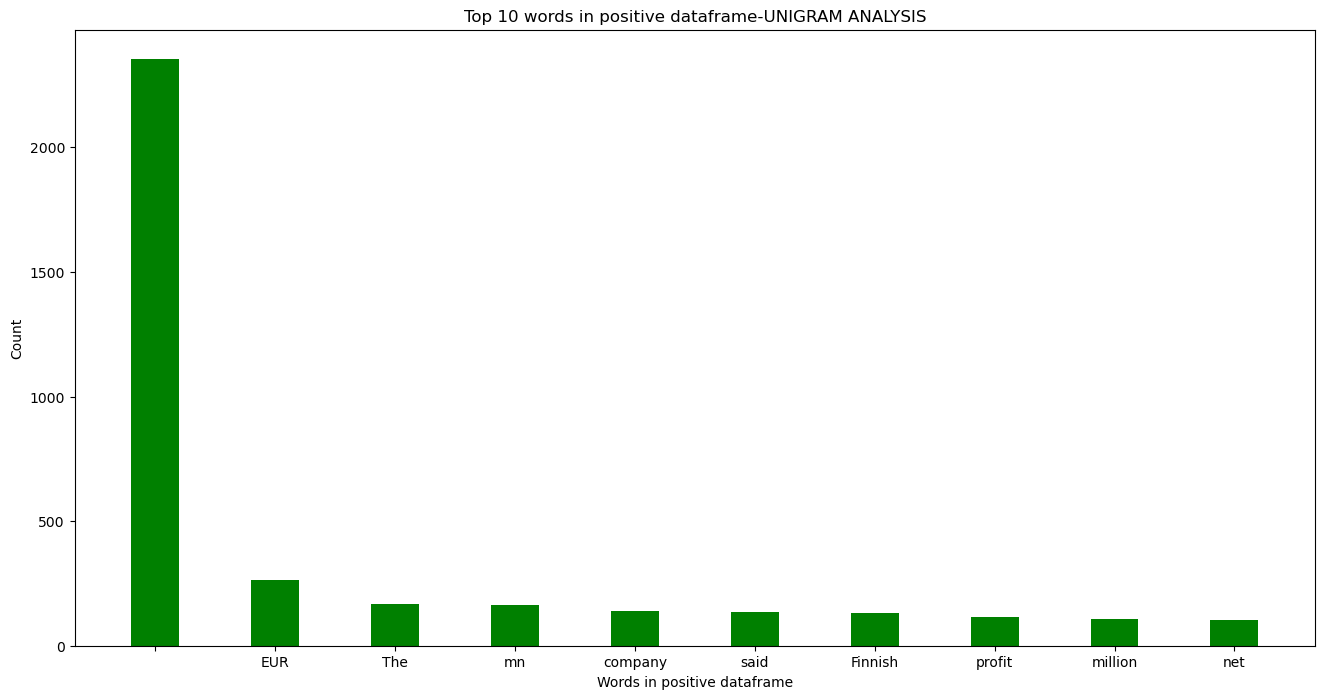

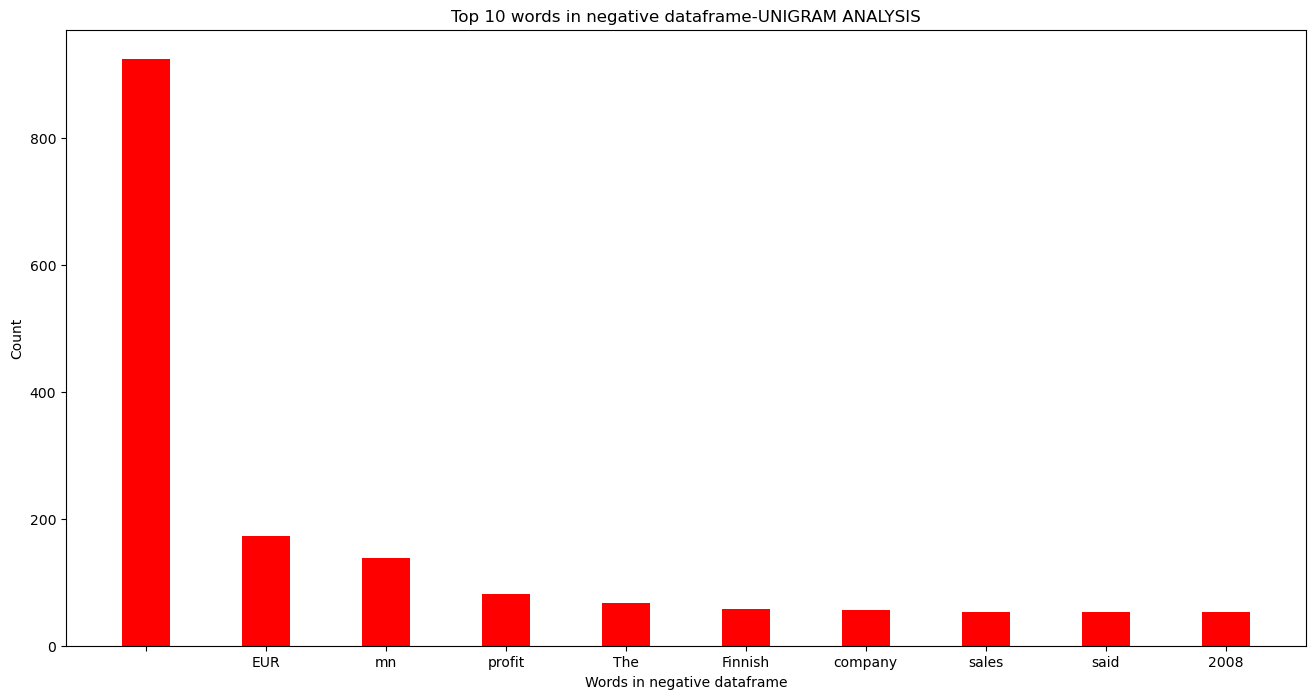

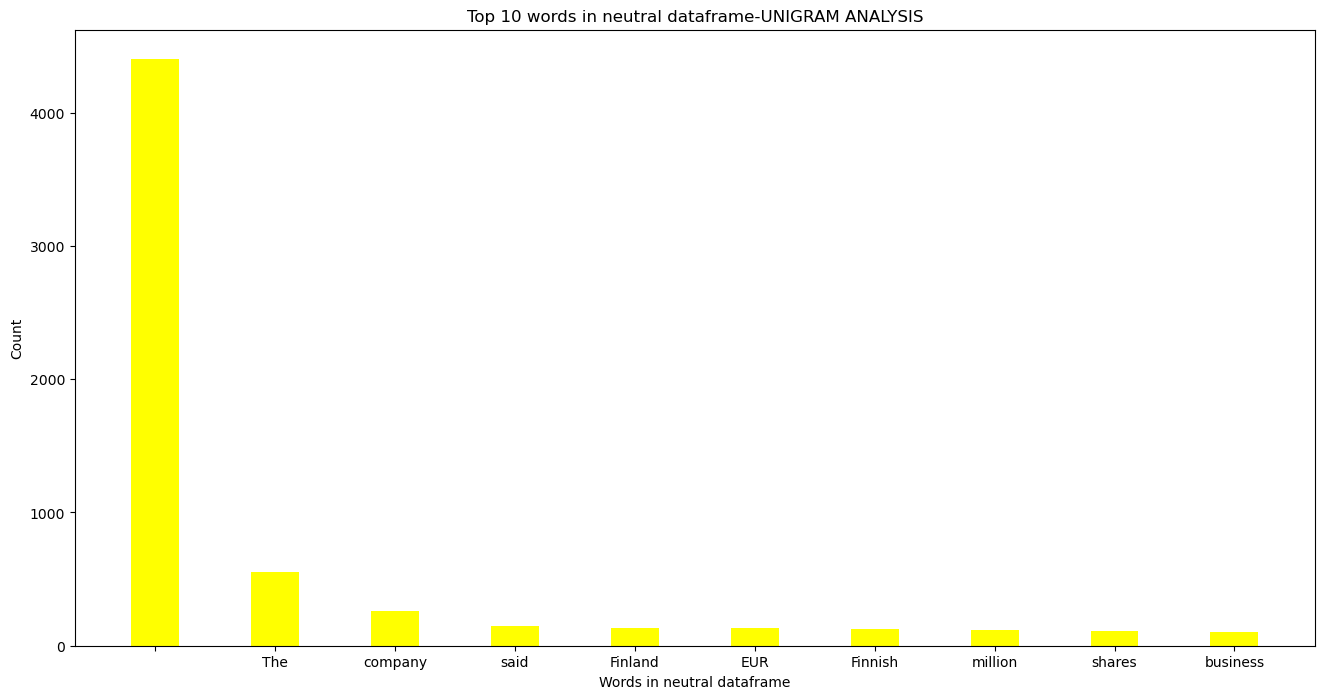

In [39]:
plt.figure(1,figsize=(16,8))
plt.bar(pd1,pd2, color ='green', width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")

plt.figure(2,figsize=(16,8))
plt.bar(ned1,ned2, color ='red', width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")

plt.figure(3,figsize=(16,8))
plt.bar(nud1,nud2, color ='yellow', width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")

plt.show()

# Creating Bigrams 

In [40]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)

for text in df_train[df_train.sentiment=="positive"].news:
    for word in generate_N_grams(text,2):
        positiveValues2[word]+=1
        
for text in df_train[df_train.sentiment=="negative"].news:
    for word in generate_N_grams(text,2):
        negativeValues2[word]+=1
        
for text in df_train[df_train.sentiment=="neutral"].news:
    for word in generate_N_grams(text,2):
        neutralValues2[word]+=1

Sentence after removing stopwords:  ['The', 'two', 'companies', 'also', 'partner', 'developing', 'Raiso', 'cholesterol', 'lowering', 'brand', '', 'Benecol', '']
Sentence after removing stopwords:  ['In', 'addition', 'deal', 'includes', 'call', 'option', 'enable', 'Maritim', 'Food', 'AS', 'increase', 'holding', 'Sandanger', 'AS', '51', '', 'future', '']
Sentence after removing stopwords:  ['Finnish', 'handling', 'systems', 'company', 'Cargotec', 'Oyj', '', 'HEL', '', 'CGCBV', '', 'said', 'today', 'EUR', '13', 'million', '', 'USD', '166', '', 'contract', 'deliver', 'MacGregor', 'hatch', 'covers', 'ships', 'ordered', 'Norwegian', 'shipowner', 'Grieg', 'Shipping', '']
Sentence after removing stopwords:  ['Finnish', 'lifting', 'equipment', 'maker', 'Kone', 'Oyj', 'said', 'October', '4', '', '2007', 'order', 'worth', '15', 'mln', 'euro', '', '212', 'mln', 'deliver', 'total', '53', 'custom', 'designed', 'elevators', 'Norwegian', 'shipbuilder', 'Aker', 'Yards', 'ASA', '']
Sentence after removi

Sentence after removing stopwords:  ['Production', 'expand', 'Elcoteq', 'locations', 'including', 'Mexico', 'Hungary', '2010', '']
Sentence after removing stopwords:  ['Commission', 'income', 'increased', '22', '', 'EUR', '44', 'mn', '', 'lending', 'volume', 'rose', '135', '', '']
Sentence after removing stopwords:  ['Pretax', 'profit', 'rose', 'EUR', '1019', 'mn', 'EUR', '1007', 'corresponding', 'period', '2005', '']
Sentence after removing stopwords:  ['Under', 'agreement', 'Biohit', 'becomes', 'focus', 'supplier', 'pipettors', 'disposable', 'pipettor', 'tips', 'VWR', 'customers', 'throughout', 'Europe', '']
Sentence after removing stopwords:  ['The', 'negotiations', 'carried', 'constructive', 'manner', '', 'parties', 'tried', 'find', 'solution', 'situation', '']
Sentence after removing stopwords:  ['For', 'Q2', '2010', '', 'consolidated', 'earnings', 'tax', 'totaled', 'EUR4', '5', '', 'compared', 'EUR3', '9', '', 'net', 'profit', 'EUR3', '2', '', 'compared', 'EUR2', '9', 'previous',

Sentence after removing stopwords:  ['Lifetree', 'founded', '2000', '', 'revenues', 'risen', 'average', '40', '', 'margins', 'late', '30s', '']
Sentence after removing stopwords:  ['ADP', 'News', '', 'Nov', '13', '', '2008', '', 'Finnish', 'printed', 'circuit', 'board', 'PCB', 'maker', 'Aspocomp', 'Group', 'Oyj', 'OMX', '', 'ACG1V', 'said', 'today', 'net', 'loss', 'narrowed', 'EUR', '2', 'million', 'USD', '25', 'first', 'nine', 'months', '2008', 'EUR', '57']
Sentence after removing stopwords:  ['Both', 'loans', 'used', 'finance', 'strategic', 'investments', 'shopping', 'center', 'redevelopment', 'projects', 'refinancing', 'maturing', 'debt', '']
Sentence after removing stopwords:  ['A', 'profit', 'still', 'target', '']
Sentence after removing stopwords:  ['', 'NTC', 'geographical', 'presence', 'complements', 'Ramirent', 'existing', 'network', 'brings', 'us', 'closer', 'customers', 'East', 'Bohemia', 'region', 'CzechRepublic', '', '']
Sentence after removing stopwords:  ['Finnair', 'exp

Sentence after removing stopwords:  ['Shares', 'Standard', 'Chartered', '', 'STAN', '', 'rose', '12', '', 'FTSE', '100', '', 'Royal', 'Bank', 'Scotland', '', 'RBS', '', 'shares', 'rose', '2', '', 'Barclays', 'shares', '', 'BARC', '', '', 'BCS', '', '17', '', '']
Sentence after removing stopwords:  ['Nordea', 'Group', 'operating', 'profit', 'increased', '2010', '18', 'percent', 'yearonyear', '364', 'billion', 'euros', 'total', 'revenue', '3', 'percent', '933', 'billion', 'euros', '']
Sentence after removing stopwords:  ['The', 'contracts', 'signed', 'acquire', 'uranium', 'produced', 'Sotkamo', 'nickelzinc', 'mine', 'eastern', 'Finland', 'owned', 'Talvivaara', '']
Sentence after removing stopwords:  ['Nevertheless', '', 'market', 'share', 'rose', '4914', 'percent', '4851', 'percent', 'year', 'earlier', '']
Sentence after removing stopwords:  ['Renzo', 'Piano', 'building', 'design', 'wonderful', 'addition', 'London', 'skyline', '', '', 'says', 'Noud', 'Veeger', '', 'EVP', 'Area', 'Directo

Sentence after removing stopwords:  ['HELSINKI', 'AFX', '', 'KCI', 'Konecranes', 'said', 'raised', 'stake', 'MMH', 'Holdings', 'Inc', '', 'owner', 'USbased', 'Morris', 'Materials', 'Handling', '', '909', 'pct', '745', 'pct', '']
Sentence after removing stopwords:  ['One', 'Uponor', 'promising', 'future', 'products', 'hydronic', 'cooling', 'system', '']
Sentence after removing stopwords:  ['', 'Consumers', 'well', 'received', 'packed', 'fresh', 'meat', '']
Sentence after removing stopwords:  ['The', 'agreement', 'expands', 'Tekla', 'Structures', '', 'scope', 'use', 'bridge', 'design', '']
Sentence after removing stopwords:  ['Finnish', 'cutlery', 'hand', 'tools', 'maker', 'Fiskars', 'Oyj', 'Abp', '', 'HEL', '', 'FISAS', '', 'said', 'today', 'net', 'profit', 'rose', 'EUR', '241', 'million', '', 'USD', '336', '', 'third', 'quarter', '2010', 'EUR', '179', 'million', 'year', 'earlier', '']
Sentence after removing stopwords:  ['India', 'trade', 'Russia', 'currently', 'stands', 'four', 'billi

Sentence after removing stopwords:  ['Nokia', '', 'strong', 'track', 'record', 'lowerend', 'handset', 'market', '', 'said', 'July', 'touchscreen', 'offering', 'would', 'come', 'year', 'cheaper', 'rival', 'models', 'order', 'tap', 'highervolume', 'market', '']
Sentence after removing stopwords:  ['', 'Overall', '', 'pleased', 'startup', 'curve', '', 'pleased', 'quality', 'paper', '', '', 'Stora', 'spokeswoman', 'Patricia', 'Dietz', 'said', 'Tuesday', '']
Sentence after removing stopwords:  ['According', 'ARehu', 'Managing', 'Director', '', 'Jouko', 'Lahtinen', '', 'project', 'stabilise', 'costs', 'improve', 'supply', 'security', '']
Sentence after removing stopwords:  ['In', 'future', '', 'company', 'intends', 'look', 'knowhow', 'outside', 'company', 'cooperate', 'actors', 'sector', '']
Sentence after removing stopwords:  ['Altia', 'operating', 'profit', 'jumped', 'EUR', '47', 'million', 'EUR', '66', 'million', '']
Sentence after removing stopwords:  ['Sales', 'came', '241', 'mln', 'eur

Sentence after removing stopwords:  ['Benefon', '', 'wireless', 'GPS', 'technology', 'company', '', 'supply', 'Karputer', 'TWIG', 'navigation', 'platform', '', 'GPS', 'satellite', 'navigation', 'voice', 'guidance', 'service', '']
Sentence after removing stopwords:  ['The', 'EPS', 'outlook', 'increased', '56', 'pct', '2007', '70', 'pct', '2008', '']
Sentence after removing stopwords:  ['In', 'recent', 'months', '', 'Capman', 'taken', 'significant', 'steps', 'simplify', 'operations', '', 'CEO', 'Lennart', 'Simonsen', 'said', '']
Sentence after removing stopwords:  ['', 'The', 'margarine', 'business', 'put', 'good', 'shape', 'last', 'two', 'years', '', 'making', 'natural', 'addition', 'Bunge', '', 'looking', 'leverage', 'position', 'Central', 'Northern', 'European', 'markets', '', '', 'Raisio', 'CEO', 'Matti', 'Rihko', 'said', 'statement', '']
Sentence after removing stopwords:  ['Efore', 'presence', 'also', 'opens', 'new', 'interesting', 'development', 'opportunities', 'students', '', ''

Sentence after removing stopwords:  ['', 'In', 'newly', 'formed', 'company', 'YIT', 'Stavo', 'local', 'contact', 'network', '', 'expertise', 'market', 'know', 'Euro', 'Stavokonsult', 'combined', 'YIT', 'housing', 'concept', '', '', 'said', 'Juha', 'Kostiainen', '', 'Yit', 'Vice', 'President', '', 'Corporate', 'Communications', 'Business', 'Development', '']
Sentence after removing stopwords:  ['Kesko', 'Agro', 'Eesti', '', 'retailer', 'wholesaler', 'grain', '', 'agricultural', 'warehousing', 'machinery', 'accessories', '', 'net', 'sales', '81', 'million', 'euros', '2007', '', 'increase', 'onetenth', 'preceding', 'year', '']
Sentence after removing stopwords:  ['In', 'JanuarySeptember', '2007', '', 'Finnlines', '', 'net', 'sales', 'rose', 'EUR', '5054', 'mn', 'EUR', '4735', 'mn', 'corresponding', 'period', '2006', '']
Sentence after removing stopwords:  ['Production', 'capacity', 'increase', '36', '000', '85', '000', 'tonnes', 'per', 'year', 'raw', 'material', 'continue', 'recycled', 'p

Sentence after removing stopwords:  ['Helsingin', 'Uutiset', '', 'Vantaan', 'Sanomat', 'Lansivayla', 'reach', '385000', 'readers', '', '40', '', 'consumers', 'greater', 'Helsinki', 'region', '']
Sentence after removing stopwords:  ['3', 'January', '2011', '', 'Finnish', 'flag', 'carrier', 'Finnair', 'Oyj', '', 'HEL', '', 'FIA1S', '', 'said', 'today', 'sealed', 'nineyear', 'sale', 'leaseback', 'agreement', 'newest', 'Airbus', 'A330', 'aircraft', 'syndication', 'Japanese', 'operating', 'lease', 'market', '']
Sentence after removing stopwords:  ['Pretax', 'profit', 'totaled', 'EUR', '3974', 'mn', '', 'EUR', '1647', 'mn', '']
Sentence after removing stopwords:  ['In', 'addition', '', 'Lehdentekijat', 'Oy', 'start', 'producing', 'new', 'membership', 'magazine', '', 'Viisas', 'Raha', '', 'Wise', 'Money', '', 'Association', '']
Sentence after removing stopwords:  ['In', 'release', '', 'Company', 'said', 'Vocollect', 'T2', 'customers', 'North', 'America', 'take', 'advantage', 'Voice', 'Directe

Sentence after removing stopwords:  ['Via', 'Satlan', 'acquisition', '', 'Teleste', 'plans', 'expand', 'market', 'presence', 'video', 'services', 'partner', 'cable', 'operators', '', 'broadcasters', 'IPTV', 'service', 'providers', '']
Sentence after removing stopwords:  ['The', 'CL51', 'designed', 'measure', 'cloud', 'base', 'height', 'vertical', 'visibility', 'weather', 'conditions', '', 'makes', 'ideal', 'instrument', 'meteorological', 'applications', 'rely', 'reliable', 'cloud', 'height', 'detection', '']
Sentence after removing stopwords:  ['Finnish', 'KCI', 'Konecranes', 'raised', 'net', 'sales', 'growth', 'estimate', '2006', '25', '', '35', '', '']
Sentence after removing stopwords:  ['At', 'press', 'conference', '', 'Lattelecom', 'board', 'chairman', 'Nils', 'Melngailis', 'explained', 'Blackstone', 'chosen', 'experience', 'IT', 'sector', 'well', 'financial', 'strength', '']
Sentence after removing stopwords:  ['For', 'first', 'nine', 'months', '2010', '', 'company', 'net', 'prof

Sentence after removing stopwords:  ['The', 'company', 'expects', 'net', 'sales', 'first', 'half', '2008', 'reach', 'previous', 'year', 'level', '']
Sentence after removing stopwords:  ['', 'I', 'warmly', 'welcome', 'Michael', 'Frei', 'Outotec', '']
Sentence after removing stopwords:  ['Both', 'operating', 'profit', 'sales', 'threemonth', 'period', 'increased', '', 'respectively', 'EUR0', '3', 'EUR13', '1', '', 'compared', 'corresponding', 'period', '2005', '']
Sentence after removing stopwords:  ['Finnish', 'Cargotec', 'Kalmar', 'received', 'significant', 'order', 'US', 'Department', 'Defense', '']
Sentence after removing stopwords:  ['In', 'JanuarySeptember', '2009', '', 'Group', 'net', 'interest', 'income', 'increased', 'EUR', '1124', 'mn', 'EUR', '743', 'mn', 'JanuarySeptember', '2008', '']
Sentence after removing stopwords:  ['Both', 'operating', 'profit', 'turnover', 'sixmonth', 'period', 'increased', '', 'respectively', '', 'EUR17', '6', 'EUR1149', '9', '', 'compared', 'correspo

Sentence after removing stopwords:  ['In', 'first', 'nine', 'months', '2010', '', 'company', 'net', 'loss', 'narrowed', 'EUR415', '000', 'EUR7', '4', 'corresponding', 'period', '2009', '']
Sentence after removing stopwords:  ['', 'The', 'new', 'structure', 'provides', 'better', 'communication', '', 'faster', 'decisionmaking', 'cost', 'savings', '', '', 'Proha', 'said', '']
Sentence after removing stopwords:  ['', 'The', 'CHF', 'great', 'product', '']
Sentence after removing stopwords:  ['Mr', 'Kivimeister', 'said', 'John', 'Deer', 'former', 'Timberjack', 'stands', 'win', 'situation', '', 'controls', 'around', '60', '', 'Estonia', 'forest', 'machinery', 'market', '']
Sentence after removing stopwords:  ['The', 'company', 'enhance', 'GPRS', 'capability', 'existing', '12', 'IDEA', 'telecom', 'service', 'areas', 'add', '10', 'service', 'areas', 'network', '']
Sentence after removing stopwords:  ['The', 'restructuring', 'creates', 'efficient', 'organization', 'increased', 'operational', 'fo

Sentence after removing stopwords:  ['The', 'company', 'also', 'said', 'November', '16', '', '2006', 'Real', 'Estate', 'Fund', 'I', 'Ky', 'signed', 'agreement', 'Finnish', 'window', 'maker', 'Fenestra', 'Oy', 'build', 'window', 'plant', 'Forssa', '', 'southern', 'Finland', '']
Sentence after removing stopwords:  ['The', 'combination', 'services', 'enabling', 'us', 'offer', 'complex', 'strengthened', 'service', 'chain', 'limited', 'Baltic', 'port', 'connections', 'also', 'getting', 'access', 'world', 'wide', 'Grimaldi', 'Network', 'Mediterranean', '', 'Africa', 'North', 'America', '', 'says', 'Uwe', 'Bakosch', '']
Sentence after removing stopwords:  ['Also', 'LemminkÆinen', 'profit', 'accounting', 'period', 'went', 'EUR', '31', 'mn', 'EUR', '245', 'mn', 'year', 'ago', '']
Sentence after removing stopwords:  ['According', 'Ringman', '', 'Finnish', 'paper', 'companies', 'acquired', 'knowhow', 'capacity', 'paper', 'recycling', '', 'turned', 'successful', 'strategy', '']
Sentence after remo

Sentence after removing stopwords:  ['9', 'September', '2010', '', 'Finnish', 'stationery', 'gift', 'retailer', 'Tiimari', 'HEL', '', 'TII1V', 'said', 'today', 'net', 'sales', 'rose', '2', '', 'yearonyear', 'EUR5', '7', 'August', '2010', '', 'driven', 'growth', 'Finland', '', 'demand', 'Baltics', 'remained', 'weak', '']
Sentence after removing stopwords:  ['I', 'looking', 'forward', 'contribute', 'SRV', 'success', 'competence', '', '', 'says', 'Taneli', 'Hassinen', '']
Sentence after removing stopwords:  ['Lithuanian', 'beer', 'makers', 'sold', '25688', 'million', 'liters', 'beer', '2005', '', 'rise', '45', 'per', 'cent', 'yearearlier', 'figure', '24592', 'million', 'liters', '']
Sentence after removing stopwords:  ['Sales', 'Department', 'Store', 'Division', 'increased', '15', '', 'sales', 'clothing', 'store', 'subsidiary', 'Seppala', 'increased', '8', '', 'Meanwhile', 'sales', 'Hobby', 'Hall', 'decreased', '12', '', '']
Sentence after removing stopwords:  ['Technical', 'indicators', 

Sentence after removing stopwords:  ['It', 'focus', 'improving', 'profitability', 'next', 'year', 'streamlining', 'operations', '']
Sentence after removing stopwords:  ['STORA', 'ENSO', '', 'NORSKE', 'SKOG', '', 'MREAL', '', 'UPMKYMMENE', 'Credit', 'Suisse', 'First', 'Boston', '', 'CFSB', '', 'raised', 'fair', 'value', 'shares', 'four', 'largest', 'Nordic', 'forestry', 'groups', '']
Sentence after removing stopwords:  ['Finnish', 'financial', 'solutions', 'developer', 'Basware', 'Corporation', '', 'OMX', 'Helsinki', 'BAS1V', '', 'said', 'Tuesday', '', '23', 'September', '', 'deliver', 'complete', 'Invoice', 'Automation', 'solution', 'large', 'US', 'engineering', '', 'construction', 'technical', 'services', 'organization', '']
Sentence after removing stopwords:  ['Mika', 'Stahlberg', '', 'VP', 'FSecure', 'Labs', '', 'said', '', '', 'We', 'excited', 'proud', 'FSecure', 'recognized', 'AVComparatives', 'Product', 'Year', '']
Sentence after removing stopwords:  ['Net', 'sales', 'went', '1',

Sentence after removing stopwords:  ['Cargotec', 'Germany', 'GmbH', 'awarded', 'contract', 'Stadtverwaltung', 'Mainz', 'chassis', 'bodies', 'Open', 'procedure', '']
Sentence after removing stopwords:  ['The', 'company', 'turned', 'earnings', 'per', 'share', '', 'EPS', '', 'EUR', '003', 'versus', 'loss', 'per', 'share', 'EUR', '001', '']
Sentence after removing stopwords:  ['', 'ADP', 'News', '', '', 'Feb', '6', '', '2009', '', 'Finnish', 'fishing', 'tackle', 'company', 'Rapala', 'VMC', 'Corp', '', 'HEL', '', 'RAP1V', '', 'said', 'today', 'net', 'profit', 'rose', 'EUR', '192', 'million', '', 'USD', '246', '', '2008', 'EUR', '175', 'million', '2007', '']
Sentence after removing stopwords:  ['', 'It', 'allows', 'young', 'child', 'move', 'forward', 'life', '', '']
Sentence after removing stopwords:  ['Finnish', 'Metso', 'supply', 'new', 'wood', 'handling', 'bleaching', 'lines', '', 'well', 'rebuild', 'kraft', 'liner', 'washing', 'line', 'Klabin', 'Tel\x97maco', 'Borba', 'mill', 'Brazilian'

Sentence after removing stopwords:  ['Tim', 'Cockroft', 'brings', 'excellent', 'track', 'record', '18', 'years', 'experience', '', 'moreover', '', 'Tim', 'successfully', 'developed', 'Capital', 'Markets', 'operations', 'Kaupthing', 'Singer', '', 'Friedlander', 'involving', 'corporate', 'finance', 'broking', 'focus', 'midmarket', 'companies', '']
Sentence after removing stopwords:  ['Viking', 'Line', 'cargo', 'revenue', 'increased', '54', '', 'EUR', '2146', 'mn', '', 'cargo', 'volume', 'increased', '24', '', '70116', 'cargo', 'units', '']
Sentence after removing stopwords:  ['SvyturysUtenos', 'Alus', '', 'controlled', 'Nordic', 'group', 'Baltic', 'Beverages', 'Holding', '', 'BBH', '', '', 'posted', '47percent', 'growth', 'beer', 'sales', 'JanuaryMay', '4622', 'million', 'litres', '']
Sentence after removing stopwords:  ['', 'Several', 'growth', 'initiatives', 'chosen', 'geographic', 'areas', 'already', 'ongoing', '', '', 'continued', '', 'noting', 'Lindex', 'opened', 'first', 'store', '

Sentence after removing stopwords:  ['UPM', 'said', 'move', 'lower', 'net', 'profit', '', 'x20ac', '385', 'million', 'US', '520', 'million', 'second', 'quarter', '', 'mainly', 'due', 'impairment', 'charges', '']
Sentence after removing stopwords:  ['We', 'also', 'cut', 'price', 'projections', 'paper', 'packaging', '', '', 'analyst', 'Goldman', 'Sachs', 'said', 'note', 'Monday', '']
Sentence after removing stopwords:  ['Sanoma', 'News', '', 'advertising', 'sales', 'decreased', '22', '', 'year', '']
Sentence after removing stopwords:  ['The', 'dismissed', 'staff', 'members', 'take', 'matter', 'court', 'unless', 'settled', 'outside', '']
Sentence after removing stopwords:  ['The', 'liquidity', 'providing', 'interrupted', 'May', '11', '', '2007', 'Aspocomp', 'Group', 'Oyj', 'shares', 'traded', '050', 'cent', '', 'Aspocomp', 'stock', 'exchange', 'release', '1152007', '', '']
Sentence after removing stopwords:  ['Operating', 'loss', 'totalled', 'EUR', '127', 'mn', '', 'compared', 'profit', '

Sentence after removing stopwords:  ['The', 'Finnish', 'company', 'previously', 'said', 'operating', 'result', 'lower', 'breakeven', 'posted', 'year', 'earlier', '']
Sentence after removing stopwords:  ['Divisional', 'sales', 'demand', 'half', 'remained', '', 'inconsistent', '', '', 'added', '']
Sentence after removing stopwords:  ['In', 'separate', 'announcement', 'Helsinki', 'stock', 'exchange', '', 'Atria', 'revealed', 'company', 'third', 'quarter', 'profits', 'declined', 'EUR13', '9', 'third', 'quarter', 'last', 'year', 'EUR12', '7', 'year', 'Q3', '']
Sentence after removing stopwords:  ['The', 'OMX', 'Helsinki', 'index', '034', 'pct', '825602', 'turnover', '813191', 'mln', 'eur', '']
Sentence after removing stopwords:  ['More', 'third', 'original', 'participants', 'dropped', 'due', 'nausea', 'side', 'effects', '']
Sentence after removing stopwords:  ['Raute', 'reported', 'loss', 'per', 'share', 'EUR0', '86', 'first', 'half', '2009', '', 'EPS', 'EUR0', '74', 'corresponding', 'perio

Sentence after removing stopwords:  ['Operating', 'profit', 'fell', 'EUR', '203', 'mn', 'EUR', '742', 'mn', 'second', 'quarter', '2008', '']
Sentence after removing stopwords:  ['Finnish', 'communication', 'electronics', 'components', 'supplier', 'Scanfil', 'Oyj', 'Tuesday', 'said', 'sales', 'first', 'half', '2006', '15', '', 'lower', 'period', 'year', 'ago', '']
Sentence after removing stopwords:  ['The', 'workforce', 'reduced', 'also', 'Amsterdam', 'office', '', 'Netherlands', '']
Sentence after removing stopwords:  ['The', 'largest', 'restructuring', 'planned', 'Italy', '', 'negotiations', '40', 'job', 'cuts', 'initiated', 'today', '', 'company', 'noted', '']
Sentence after removing stopwords:  ['Asian', 'traffic', 'declined', '34', 'per', 'cent', '']
Sentence after removing stopwords:  ['In', 'Finland', '', 'Bank', 'land', 'reports', 'operating', 'profit', 'fell', 'EUR', '61', 'mn', 'second', 'quarter', '2008', 'EUR', '75', 'mn', 'second', 'quarter', '2007', '']
Sentence after remo

Sentence after removing stopwords:  ['Operating', 'profit', 'excluding', 'nonrecurring', 'items', 'decreased', 'EUR', '62', 'mn', 'EUR', '168', 'mn', '2007', '', 'representing', '23', '', 'net', 'sales', '']
Sentence after removing stopwords:  ['At', '133', 'pm', '', 'OMX', 'Helsinki', '25', '030', 'pct', 'lower', '246367', 'OMX', 'Helsinki', '037', 'pct', '853742', 'volume', '256', 'mln', 'eur', '']
Sentence after removing stopwords:  ['Net', 'sales', 'eaten', 'weak', 'US', 'dollar', '']
Sentence after removing stopwords:  ['The', 'company', 'expects', 'net', 'sales', 'whole', '2009', 'remain', '2008', 'level', '']
Sentence after removing stopwords:  ['Pretax', 'profit', 'totaled', 'EUR', '49', 'mn', 'compared', 'EUR', '52', 'mn', 'first', 'quarter', '2005', '']
Sentence after removing stopwords:  ['As', 'result', 'transactions', '', 'aggregate', 'holdings', 'Burrill', 'Life', 'Sciences', 'Capital', 'Fund', '', 'LP', 'decreased', '5', 'per', 'cent', 'total', 'number', 'shares', 'votes

Sentence after removing stopwords:  ['Only', 'driver', 'left', 'car', 'suspect', '', 'kidnapped', 'forced', 'gunpoint', 'drive', 'Durham', '']
Sentence after removing stopwords:  ['In', 'Finland', '', 'media', 'group', 'Talentum', 'start', 'personnel', 'negotiations', 'cut', 'staff', 'parent', 'company', 'Talentum', 'publishing', 'unit', 'Talentum', 'media', '']
Sentence after removing stopwords:  ['Compared', 'FTSE', '100', 'index', '', 'rose', '367', 'points', '', '06', '', '', 'day', '', 'relative', 'price', 'change', '02', '', '']
Sentence after removing stopwords:  ['Sevenmonth', 'sales', 'Ragutis', '', 'controlled', 'Finnish', 'brewery', 'Olvi', '', 'declined', '112', 'percent', '', '1541', 'million', 'liters', '', 'company', 'held', '989', 'percent', 'market', '']
Sentence after removing stopwords:  ['According', 'Arokarhu', '', 'purchases', 'scanned', 'cash', 'register', 'computer', 'disappeared', 'total', 'sum', 'key', 'pressed', '']
Sentence after removing stopwords:  ['The',

Sentence after removing stopwords:  ['Furthermore', '', 'sales', 'new', 'passenger', 'cars', 'light', 'commercial', 'vehicles', 'country', 'declined', '54', '', 'yearonyear', 'last', 'month', '']
Sentence after removing stopwords:  ['Applying', 'summer', 'work', 'seen', 'laborious', 'stressful', '']
Sentence after removing stopwords:  ['ADPnews', '', 'Sep', '28', '', '2009', '', 'Finnish', 'silicon', 'wafers', 'maker', 'Okmetic', 'Oyj', 'HEL', '', 'OKM1V', 'said', 'reduce', 'number', 'clerical', 'workers', '22', 'worldwide', 'result', 'personnel', 'negotiations', 'completed', 'today', '']
Sentence after removing stopwords:  ['Profit', 'period', 'totalled', 'EUR', '08', 'mn', '', 'EUR', '11', 'mn', 'corresponding', 'period', '2008', '']
Sentence after removing stopwords:  ['Revenue', 'quarter', 'fell', '8', 'percent', '', 'EURO', '', '24', 'billion', 'compared', 'year', 'earlier', '']
Sentence after removing stopwords:  ['Cerberus', 'Capital', 'Management', 'LPbacked', 'printing', 'pape

Sentence after removing stopwords:  ['BG', 'Crane', 'strong', 'customer', 'base', 'onroad', 'load', 'handling', 'related', 'installation', 'service', 'businesses', '']
Sentence after removing stopwords:  ['Nokia', 'Messaging', '11', 'enables', 'customers', 'receive', 'emails', '10', 'email', 'accounts', 'mobile', 'phone', 'supporting', 'POP', 'IMAP', 'email', 'services', '']
Sentence after removing stopwords:  ['Virala', 'Oy', 'Ab', 'allocated', 'Board', 'Directors', 'amount', 'EUR', '19', 'million', 'EUR', '025', 'million', 'lower', 'maximum', 'announced', '12302010', '']
Sentence after removing stopwords:  ['Pharmaceuticals', '', 'Belgium', 'This', 'brandnew', 'market', 'analysis', 'gives', 'clear', 'overview', 'actual', 'situation', 'future', 'outlook', 'pharmaceutical', 'market', 'Belgium', '']
Sentence after removing stopwords:  ['He', 'said', 'things', 'different', 'new', 'Finnish', 'nuclear', 'power', 'stations', 'go', 'operation', 'large', 'hydro', 'powered', 'stations', 'north

Sentence after removing stopwords:  ['Nevertheless', '', 'development', 'allowed', 'ruin', 'print', 'newspaper', '', 'continues', 'Sanoma', 'News', '', 'main', 'medium', '']
Sentence after removing stopwords:  ['Operating', 'profit', 'quarter', 'AprilJune', '2006', 'amounted', 'EUR42', '9', 'net', 'sales', 'EUR156', '3']
Sentence after removing stopwords:  ['Cramo', '', 'headquartered', 'Vantaa', '', 'Finland', '', 'rents', 'construction', 'machinery', 'equipment', '', 'well', 'rents', 'sells', 'modular', 'space', '']
Sentence after removing stopwords:  ['According', 'Honka', 'Japan', 'Managing', 'Director', 'Marko', 'Saarelainen', '', 'Honkarakenne', 'exports', '200', 'ready', 'made', 'log', 'houses', 'Japan', 'year', '']
Sentence after removing stopwords:  ['UK', 'Sarantel', 'outsource', 'part', 'processes', 'Elcoteq', 'plant', 'Estonia', 'LONDON', '', 'Oct', '13', '', 'BNS', '', 'The', 'British', 'miniature', 'antennas', 'maker', 'Sarantel', 'signed', 'agreement', 'outsource', 'asse

Sentence after removing stopwords:  ['FCC', 'Chairman', 'Kevin', 'Martin', 'said', 'fair', 'play', 'required', 'extending', 'deregulatory', 'rules', 'digital', 'subscriber', 'lines', 'telecom', 'providers', 'use', 'broadband', 'networks', '']
Sentence after removing stopwords:  ['In', 'way', '', 'industry', 'starting', 'point', 'consumers', '', 'needs', '']
Sentence after removing stopwords:  ['In', 'providing', 'managed', 'services', '', 'Nokia', 'takes', 'responsibility', 'building', '', 'operating', 'transferring', 'well', 'optimising', 'Indosat', '3G', 'network', '']
Sentence after removing stopwords:  ['The', 'identity', 'buyer', 'yet', 'known', '']
Sentence after removing stopwords:  ['The', 'company', 'said', 'production', 'volumes', 'far', 'indicate', 'circuit', 'capable', 'targeted', 'output', 'rate', '60000', 'tonnes', 'per', 'day', '', '22', 'million', 'tonnes', 'year', '']
Sentence after removing stopwords:  ['Aspo', 'net', 'sales', '2006', 'totaled', 'EUR', '2259', 'millio

Sentence after removing stopwords:  ['Yara', 'Suomi', 'Ltd', 'also', 'provides', 'nitrogen', 'chemicals', 'technical', 'nitrates', 'various', 'sectors', 'industry', '', 'well', 'products', 'used', 'environmental', 'protection', '']
Sentence after removing stopwords:  ['He', 'wore', 'black', 'beanietype', 'cap', 'black', 'jacket', '']
Sentence after removing stopwords:  ['Finnish', 'Stockmann', 'Group', 'mail', 'order', 'unit', 'Hobby', 'Hall', 'launched', 'trial', 'marketing', 'campaign', 'Russia', '']
Sentence after removing stopwords:  ['Alpina', 'Sports', 'Lebanon', '', 'New', 'Hampshire', 'USA', 'based', 'distributor', 'eg', 'Alpina', 'ski', 'shoes', 'skis', '', 'Exel', 'ski', 'poles', '', 'Start', 'ski', 'waxes', 'also', 'Peltonen', 'crosscountry', 'skis', '']
Sentence after removing stopwords:  ['Amer', 'Sports', 'divests', 'industrial', 'site', 'Rumilly', '', 'France', '', '', 'This', 'announcement', 'distributed', 'Thomson', 'Reuters', 'behalf', 'Thomson', 'Reuters', 'clients',

Sentence after removing stopwords:  ['wins', '98', '', 'acceptance', '23', 'December', '2009', '', 'Finnish', 'industrial', 'machinery', 'company', 'Metso', 'Oyj', '', 'HEL', '', 'MEO1V', '', 'said', 'today', 'complete', 'takeover', 'offer', 'textile', 'company', 'Tamfelt', 'Oyj', 'Abp', '', 'HEL', '', 'TAFKS', '', '', 'acquiring', '98', '', 'shares', 'votes', '']
Sentence after removing stopwords:  ['Taking', 'cue', 'playbook', 'East', 'Dillon', 'Lions', '', 'created', 'special', 'team', 'heavyhitting', 'style', 'players', '', 'bootcut', 'jeans', '', 'tummy', 'tops', '', 'course', '', 'cowboy', 'boots', '']
Sentence after removing stopwords:  ['Metso', 'Foundries', 'Jyvaskyla', 'Oy', 'discontinue', 'production', 'line', '30', 'September', '2008', '', 'company', 'said', '']
Sentence after removing stopwords:  ['About', 'Dopplr', 'Dopplr', 'service', 'smart', 'travellers', '']
Sentence after removing stopwords:  ['Subscribers', 'China', 'Unicom', '', 'nation', 'second', 'largest', 'mobi

Sentence after removing stopwords:  ['The', 'personnel', 'expertise', 'high', 'level', 'technology', 'play', 'major', 'role', 'Exel', 'Composites', 'operations', '']
Sentence after removing stopwords:  ['TeliaSonera', 'subsidiary', '', 'mobile', 'operator', 'EMT', 'Estonia', '', 'created', 'world', 'first', 'mobile', 'identification', 'service', 'makes', 'possible', 'vote', 'via', 'mobile', 'phone', '']
Sentence after removing stopwords:  ['In', 'addition', '', 'existing', 'service', 'counter', 'area', 'reception', 'hall', 'rebuilt', 'access', 'provided', 'local', 'rail', 'connections', '']
Sentence after removing stopwords:  ['Ponsse', 'divide', 'sales', 'maintenance', 'service', 'network', 'six', 'geographical', 'areas', '']
Sentence after removing stopwords:  ['Outotec', 'scope', 'delivery', 'covers', 'engineering', '', 'supply', 'special', 'equipment', 'services', 'calcination', 'plant', 'two', 'circulating', 'fluid', 'bed', 'calciners', '']
Sentence after removing stopwords:  ['Th

Sentence after removing stopwords:  ['HELSINKI', 'AFX', '', 'Salcomp', '', 'mobile', 'phone', 'charger', 'manufacturer', '', 'said', 'appointed', 'Markku', 'Hangasjarvi', 'new', 'CEO', '', 'following', 'resignation', 'Mats', 'Eriksson', '']
Sentence after removing stopwords:  ['Pertti', 'Ervi', 'independent', 'Company', 'major', 'shareholders', '']
Sentence after removing stopwords:  ['These', 'module', 'products', 'available', 'trials', '3Q07', 'volume', 'deliveries', '4Q07', '']
Sentence after removing stopwords:  ['However', '', 'two', 'previously', 'ordered', 'sets', 'start', 'producing', 'electricity', 'end', 'October', '2010', '', 'said', '']
Sentence after removing stopwords:  ['', 'These', 'developments', 'partly', 'reflect', 'government', 'higher', 'activity', 'field', 'dividend', 'policy', '', '']
Sentence after removing stopwords:  ['Ahlstrom', 'Corporation', 'STOCK', 'EXCHANGE', 'ANNOUNCEMENT', '722007', '1030', 'A', 'total', '56955', 'new', 'shares', 'Ahlstrom', 'Corporati

Sentence after removing stopwords:  ['4', '', 'Complete', 'name', 'shareholder', '', 'Otto', 'Henrik', 'Bernhard', 'Nyberg', '5', '', 'Further', 'information', '', 'The', 'amount', 'shares', 'transferred', 'corresponds', '568', '', 'total', 'number', 'shares', 'Aspo', 'Plc', '']
Sentence after removing stopwords:  ['Finnish', 'construction', 'company', 'YIT', 'HEL', '', 'YTY1V', 'said', 'agreed', 'take', 'German', 'facility', 'engineering', 'facility', 'systems', 'firm', 'Caverion', 'EUR73m', 'USD90', '3', '']
Sentence after removing stopwords:  ['It', 'difficult', 'become', 'Google', 'Analytics', 'channel', 'partner', '']
Sentence after removing stopwords:  ['Ahlstrom', '', 'headquartered', 'Helsinki', '', 'Finland', '', 'global', 'leader', 'development', '', 'manufacture', 'marketing', 'high', 'performance', 'fibrebased', 'materials', '']
Sentence after removing stopwords:  ['The', 'Costanza', 'light', '', 'aluminum', 'base', 'washable', 'shade', '', 'comes', 'white', '', 'pistachio'

Sentence after removing stopwords:  ['The', 'order', 'includes', 'steel', 'frame', '', 'loadbearing', 'roof', 'structures', 'partition', 'wall', 'elements', '', 'Rautaruukki', 'said', 'expects', 'complete', 'installation', 'early', 'May', 'next', 'year', '']
Sentence after removing stopwords:  ['', 'We', 'continue', 'make', 'easier', 'users', 'explore', 'services', 'handsets', 'work', 'towards', 'bringing', 'Internet', 'wider', 'range', 'devices', 'including', 'mid', 'lowend', 'devices', '', '', 'said', 'Kallasvuo', '']
Sentence after removing stopwords:  ['Finnish', 'silicon', 'wafer', 'technology', 'company', 'Okmetic', 'Oyj', 'OMX', 'Helsinki', '', 'OKM1V', 'said', 'Wednesday', '17', 'September', 'invest', 'EUR6m', 'sensor', 'wafer', 'business', '2009', '']
Sentence after removing stopwords:  ['Homeowners', 'across', 'North', 'America', 'green', 'experiences', 'share', 'cost', 'savings', 'clean', 'ecofriendly', 'heating', '']
Sentence after removing stopwords:  ['The', 'company', 's

Sentence after removing stopwords:  ['ALEXANDRIA', '', 'Va', '', 'March', '20', '', 'Patrik', 'Flykt', 'Timo', 'Alakoski', '', 'Helsinki', '', 'Finland', '', 'Tapio', 'Suihko', 'Nadarajah', 'Asokan', '', 'Espoo', '', 'Finland', '', 'developed', 'method', 'mobility', 'support', 'Internettype', 'protocol', 'traffic', 'communication', 'system', '']
Sentence after removing stopwords:  ['An', 'EU', 'law', 'issue', 'may', 'introduced', 'around', '2010', '']
Sentence after removing stopwords:  ['A', 'comprehensive', 'range', 'cuttolength', 'slitting', 'services', 'allow', 'Ruukki', 'particular', 'serve', 'light', 'engineering', 'customers', 'relocate', 'production', 'St', 'Petersburg', 'area', '']
Sentence after removing stopwords:  ['', 'We', 'selling', 'information', 'systems', 'development', 'business', 'Finns', '']
Sentence after removing stopwords:  ['The', 'service', 'also', 'enables', 'users', 'watch', 'emails', 'HTML', 'format', 'en', 'enhanced', '23', 'addition', 'languages', 'choose

Sentence after removing stopwords:  ['Finnish', 'WÆrtsilÆ', 'provides', 'power', 'solutions', 'marine', 'energy', 'markets', 'opened', 'Service', 'Centre', 'Murmansk', '', 'Russia', '']
Sentence after removing stopwords:  ['In', 'addition', 'software', 'development', '', 'new', 'design', 'unit', 'provide', 'mechanical', 'engineering', 'electronics', 'design', '']
Sentence after removing stopwords:  ['The', 'parties', 'also', 'agreed', 'LÆnnen', 'Tehtaat', 'right', 'sell', 'remaining', 'shares', 'Suomen', 'Rehu', 'HankkijaMaatalous', '15', 'months', 'purchase', 'majority', 'holding', '', 'earliest', '']
Sentence after removing stopwords:  ['Finnish', 'Nordic', 'Aluminium', 'starting', 'employeremployee', 'negotiations', 'Finland', 'concern', 'staff', 'groups', '']
Sentence after removing stopwords:  ['Amanda', 'said', 'already', 'made', 'USD5', '0', 'investment', 'commitment', 'Russia', 'Partners', 'II', 'fund', 'July', '2005', '']
Sentence after removing stopwords:  ['There', '15', 'in

Sentence after removing stopwords:  ['treatment', 'products', 'Usa', '', 'Canada', '', 'Mexico', '', 'Australia', 'Brazil', 'Today', '', 'Global', 'Research', '', 'Data', 'Services', 'going', 'publish', 'several', 'market', 'analyses', 'markets', 'water', 'treatment', 'products', 'selected', 'countries', '']
Sentence after removing stopwords:  ['compensation', 'news', '', 'opinions', 'distributions', '']
Sentence after removing stopwords:  ['When', 'cruising', '', 'revs', 'fall', 'less', 'engine', 'output', 'required', '']
Sentence after removing stopwords:  ['The', 'use', 'validation', 'rule', 'base', 'enables', 'verifying', 'processing', 'rule', 'bases', 'managed', 'different', 'administrators', 'fulfil', 'set', 'requirements', '']
Sentence after removing stopwords:  ['The', 'business', 'divested', 'generates', 'consolidated', 'net', 'sales', 'EUR', '60', 'million', 'annually', 'currently', '640', 'employees', '']
Sentence after removing stopwords:  ['Fortum', 'considering', 'taking'

Sentence after removing stopwords:  ['Public', 'services', 'also', 'available', '']
Sentence after removing stopwords:  ['According', 'Ultrascan', '', 'software', 'acquired', 'crackers', '', 'managed', 'change', 'mobile', 'phone', 'way', 'phone', 'able', 'get', 'hold', 'onetime', 'password', 'sent', 'bank', 'via', 'text', 'message', '']
Sentence after removing stopwords:  ['We', 'opportunity', 'responsibility', 'create', 'new', 'journalistic', 'culture', 'serve', 'readers', 'Alma', 'Media', 'newspapers', '', '', 'says', 'Hannu', 'Ollikainen', '', 'head', 'new', 'Helsinki', 'desk', '']
Sentence after removing stopwords:  ['Vacon', 'aims', 'establish', 'presence', 'solar', 'energy', 'business', 'various', 'parts', 'world', 'towards', 'end', '2010', '', 'said', 'Olli', 'Teva', '', 'marketing', 'director', 'renewable', 'energy', 'applications', '']
Sentence after removing stopwords:  ['Latvia', 'Stockmann', 'shopping', 'mall', 'subsidiary', 'Finland', 'Stockmann', 'Plc', '']
Sentence after

Sentence after removing stopwords:  ['Swedish', 'telco', 'TeliaSonera', 'teaming', 'Friends', '', 'Swedish', 'organization', 'bullying', '', 'fight', 'bullying', 'children', 'teenagers', 'via', 'electronic', 'channels', '']
Sentence after removing stopwords:  ['We', 'went', 'market', 'yield', 'guidance', '725', '', 'area', '', 'gave', 'us', 'flexibility', 'go', '18th', '']
Sentence after removing stopwords:  ['The', 'plant', 'expected', 'start', 'production', 'first', 'half', '2007', '']
Sentence after removing stopwords:  ['The', 'agreement', 'must', 'approved', 'Russian', 'competition', 'authorities', 'enters', 'force', '']
Sentence after removing stopwords:  ['The', 'mall', 'part', 'Baltic', 'Pearl', 'development', 'project', 'city', 'St', 'Petersburg', '', 'Baltic', 'Pearl', 'CJSC', '', 'subsidiary', 'Shanghai', 'Foreign', 'Joint', 'Investment', 'Company', '', 'developing', 'homes', '35000', 'people', '']
Sentence after removing stopwords:  ['The', 'pine', 'oil', 'project', 'relate

Sentence after removing stopwords:  ['Shortterm', 'licenses', 'games', 'cost', 'little', '', '3', 'purchasing', 'game', 'outright', 'cost', 'much', '', '10', '', '15', '']
Sentence after removing stopwords:  ['Neste', 'Oil', 'Corporation', 'refining', 'marketing', 'company', 'concentrating', 'clean', '', 'highquality', 'traffic', 'fuels', '']
Sentence after removing stopwords:  ['The', 'purchase', 'sum', 'EUR', '10mn', 'US', '1297', 'mn', '']
Sentence after removing stopwords:  ['Finnish', 'energy', 'company', 'Fortum', 'set', 'new', 'stricter', 'target', 'limits', 'shortterm', 'carbon', 'dioxide', 'emissions', 'heat', 'electricity', 'production', '']
Sentence after removing stopwords:  ['Finnish', 'house', 'manufacturers', 'targeting', 'strongly', 'growing', 'onefamily', 'house', 'market', 'Russia', '']
Sentence after removing stopwords:  ['HELSINKI', '', 'AFX', '', '', 'Outokumpu', 'said', 'agreed', 'sell', 'Hitura', 'nickel', 'mine', 'Finland', 'Canadian', 'group', 'Belvedere', 'Res

Sentence after removing stopwords:  ['We', 'offer', 'clients', 'integrated', 'management', 'consulting', '', 'total', 'solutions', 'complex', 'projects', 'efficient', '', 'bestinclass', 'design', 'supervision', '']
Sentence after removing stopwords:  ['The', 'orders', 'also', 'include', 'highpower', 'drives', 'control', 'seismic', 'compressors', '']
Sentence after removing stopwords:  ['New', 'Delhi', '', 'Feb', '12', '', 'Korteniemi', 'Anneli', '', 'Helokunnas', 'Tuija', '', 'Peltola', 'Marjo', '', 'Keskinen', 'Jukka', '', 'Salminen', 'Jussi', '', 'Tusa', 'Kia', 'Janhonen', 'Risto', 'Nokia', 'Telecommunications', 'Oy', '', 'Espoo', '', 'Finland', 'developed', 'cable', 'adjustment', 'device', '']
Sentence after removing stopwords:  ['Ethanol', 'would', 'made', 'barley', '', 'production', 'could', 'start', '2008', '']
Sentence after removing stopwords:  ['', 'I', 'trying', 'deal', 'slavery', 'different', 'perspective', 'balance', 'story', '', '', 'says', 'DeRamus', '', 'formerly', 'writ

Sentence after removing stopwords:  ['Marimekko', 'makes', 'sorts', 'colorful', 'little', 'impulse', 'buys', '', 'umbrellas', '', 'baby', 'bibs', '', 'change', 'purses', '', 'sale', '', 'better', 'take', 'advantage', 'shoppers', 'ca', 'nt', 'commit', 'furniture', 'want', 'piece', 'action', '']
Sentence after removing stopwords:  ['Water', 'Treatment', 'Products', 'In', 'Australia', 'Today', '', 'Global', 'Research', '', 'Data', 'Services', 'going', 'publish', 'market', 'analysis', 'market', 'chemical', 'water', 'treatment', 'products', 'Australia', '']
Sentence after removing stopwords:  ['The', 'deal', 'covers', 'Stockmann', 'Auto', 'Oy', 'Ab', 'sales', 'aftersales', 'services', 'concerning', 'Volkswagen', 'Audi', 'Helsinki', '', 'Espoo', 'Vantaa', '']
Sentence after removing stopwords:  ['No', 'service', 'pricing', 'details', 'disclosed', '']
Sentence after removing stopwords:  ['TietoEnator', 'signed', 'agreement', 'acquire', 'Indian', 'research', 'development', '', 'RD', '', 'servi

Sentence after removing stopwords:  ['As', 'result', '', 'number', 'personnel', 'Finland', 'reduced', '158', '']
Sentence after removing stopwords:  ['Affecto', 'provide', 'new', 'EFI', 'Data', 'Warehouse', 'reporting', 'solution', '', 'behavioural', 'scoring', 'system', 'supporting', 'operational', 'decision', 'processes', 'Data', 'Migration', 'old', 'legacy', 'systems', 'new', 'EFI', 'system', '']
Sentence after removing stopwords:  ['CF2', 'Pty', 'Ltd', 'became', 'substantial', 'holder', 'Renison', 'Consolidated', 'Mines', 'NL', 'January', '25', '150', 'million', 'shares', '', '79', 'pc', '', '']
Sentence after removing stopwords:  ['In', 'JanuarySeptember', '2007', '', 'operating', 'profit', 'totaled', 'EUR', '205', 'mn', '']
Sentence after removing stopwords:  ['The', 'company', 'listed', 'Nordic', 'Exchange', 'Helsinki', '']
Sentence after removing stopwords:  ['On', 'January', '29', '', '2009', 'The', 'largest', 'Nordic', 'bank', 'Nordea', 'Finnish', 'retail', 'chain', 'Stockman

Sentence after removing stopwords:  ['According', 'latest', 'information', '', 'Benefon', 'launch', 'Twig', 'device', '20', 'September', '2006', '']
Sentence after removing stopwords:  ['The', 'company', 'also', 'shut', 'one', 'paper', 'machine', 'Finland', 'one', 'Austria', '', 'well', 'two', 'label', 'paper', 'machines', 'Finland', '10', 'months', '', 'Helsinkibased', 'UPM', 'said', 'yesterday', '']
Sentence after removing stopwords:  ['The', 'total', 'value', 'order', '', 'placed', 'Aspo', '', 'marine', 'transportation', 'subsidiary', 'ESL', 'Shipping', 'Oy', '', 'EUR', '60', 'million', '', 'USD', '775', '', '']
Sentence after removing stopwords:  ['The', 'results', 'enable', 'preparation', 'conceptual', 'plant', 'design', 'capital', 'estimates', '']
Sentence after removing stopwords:  ['No', 'financial', 'details', 'disclosed', '']
Sentence after removing stopwords:  ['Jun', '14', '', '2009', '', 'AOL', 'Weblogs', 'delivered', 'Newstex', '', '', 'Looks', 'like', 'E71', 'upstaged', 

Sentence after removing stopwords:  ['Once', 'plants', 'ground', 'continue', 'grow', '', 'success', 'garden', 'lies', 'well', 'maintained', '']
Sentence after removing stopwords:  ['All', 'welcome', '']
Sentence after removing stopwords:  ['It', 'would', 'premature', 'talk', 'dates', '', 'volume', 'investment', 'procedure', '', '', 'said', '']
Sentence after removing stopwords:  ['Runway', 'Visual', 'Range', 'calculated', 'assessment', 'distance', 'pilot', 'see', 'runway', '']
Sentence after removing stopwords:  ['Her', 'work', 'NetApp', 'included', 'strategically', 'repositioning', 'brand', 'category', 'major', 'global', 'relaunch', '']
Sentence after removing stopwords:  ['When', 'new', 'types', 'network', 'elements', 'added', 'network', '', 'conversion', 'file', 'updated', 'adding', 'information', 'required', 'converting', 'message', 'format', 'new', 'network', 'element', 'type', 'format', 'understood', 'management', 'system', '']
Sentence after removing stopwords:  ['The', 'governm

Sentence after removing stopwords:  ['', 'EB', 'Tough', 'VoIP', 'designed', 'fulfill', 'communications', 'needs', 'military', 'units', '', 'continue', 'strive', 'towards', 'achieving', 'goal', '', '', 'Mikko', 'Viitaniemi', '', 'EB', 'Elektrobit', 'Defense', 'Products', '', 'Wireless', 'Solutions', 'senior', 'manager', '', 'said', 'statement', '']
Sentence after removing stopwords:  ['Tampere', 'Science', 'Parks', 'Finnish', 'company', 'owns', '', 'leases', 'builds', 'office', 'properties', 'specialises', 'facilities', 'technologyoriented', 'businesses', '']
Sentence after removing stopwords:  ['Raisio', 'site', 'main', 'production', 'plants', 'well', 'company', 'headquarters', '']
Sentence after removing stopwords:  ['Finnish', 'glass', 'technology', 'group', 'Glaston', 'Corporation', '', 'OMX', 'Helsinki', '', 'GLA1V', '', 'reported', 'Thursday', '', '14', 'August', '', 'operating', 'profit', 'EUR6', '5', 'net', 'sales', 'EUR201', '5', 'period', 'JanuarySeptember', '2008', '']
Senten

Sentence after removing stopwords:  ['A', 'maximum', '20', 'employees', '', 'work', 'Karttakeskus', 'responsible', 'producing', 'Geographic', 'Information', 'Services', '', 'affected', '', 'company', 'added', '']
Sentence after removing stopwords:  ['Patrizia', 'adds', 'acquisition', 'portfolio', 'already', 'worth', 'EUR3bn', '']
Sentence after removing stopwords:  ['The', 'sale', 'food', 'potato', 'business', 'part', 'Raisio', 'plan', 'streamline', 'clarify', 'business', 'operations', '']
Sentence after removing stopwords:  ['Stonesoft', 'global', 'provider', 'proven', '', 'next', 'generation', 'solutions', 'simplify', 'network', 'security', 'management', '']
Sentence after removing stopwords:  ['The', 'talks', 'involved', 'Food', 'Ingredients', 'Divisions', '', 'well', 'group', 'service', 'functions', '', 'company', 'said', '']
Sentence after removing stopwords:  ['Market', 'data', 'analytics', 'derived', 'primary', 'secondary', 'research', '']
Sentence after removing stopwords:  ['N

Sentence after removing stopwords:  ['AHMS', 'also', 'offer', 'Hotel', 'Hotel', 'Project', 'Consultancy', '', 'Management', 'Services', '', 'Brand', 'Franchise', '', 'Training', 'Sales', 'Marketing', 'services', 'panIndia', 'basis', '']
Sentence after removing stopwords:  ['Other', 'shareholder', 'entitlements', 'became', 'effective', 'today', '']
Sentence after removing stopwords:  ['Rapala', 'Fishing', 'Frenzy', '2009', '']
Sentence after removing stopwords:  ['The', 'company', 'supports', 'global', 'customers', 'developing', 'new', 'technologies', 'offers', 'fast', 'route', 'product', 'development', 'applications', 'volume', 'production', '']
Sentence after removing stopwords:  ['', 'The', 'new', 'unit', 'major', 'investment', 'Finnish', 'media', 'scene', '']
Sentence after removing stopwords:  ['The', 'acquisition', 'financed', '', '256', 'billion', 'debt', 'arranged', 'Goldman', '', 'Sachs', '', 'Co', '']
Sentence after removing stopwords:  ['The', 'customers', 'access', 'integrat

Sentence after removing stopwords:  ['The', 'natural', 'source', 'isoprene', 'tree', 'species', 'Hevea', 'brasiliensis', '', 'also', 'known', 'rubber', 'tree', '']
Sentence after removing stopwords:  ['The', 'deal', 'includes', 'entire', 'personnel', 'PlanMill', 'Oy', '', 'transfer', 'new', 'company', 'socalled', 'old', 'employees', '']
Sentence after removing stopwords:  ['Secure', 'files', 'online', 'Like', 'filling', 'tax', 'return', '', 'making', 'backup', 'boring', '']
Sentence after removing stopwords:  ['Another', 'noticeable', 'thing', 'search', 'Tata', 'Airtel', 'brands', 'mostly', 'related', '', 'broadband', 'connections', '', '']
Sentence after removing stopwords:  ['Aldata', 'Solution', '', 'global', 'company', 'engaged', 'supplier', 'consumer', 'business', 'process', 'optimization', '', 'announced', 'details', 'Dollars', 'Dinosaurs', 'program', '']
Sentence after removing stopwords:  ['Finnish', 'fibrebased', 'materials', 'maker', 'Ahlstrom', 'Corp', '', 'HEL', '', 'AHL1V'

Sentence after removing stopwords:  ['The', 'center', 'offers', 'comprehensive', 'range', 'device', 'design', 'services', 'spanning', 'electronics', '', 'mechanics', 'software', 'design', 'full', 'range', 'testing', 'laboratory', 'services', '']
Sentence after removing stopwords:  ['VNH', 'generates', 'annual', 'net', 'sales', '5', 'mln', 'eur', 'employs', '21', 'people', '']
Sentence after removing stopwords:  ['The', 'business', 'idea', 'Budget', 'Sport', 'offer', 'customers', 'wide', 'range', 'highquality', 'sports', 'equipment', 'clothing', 'low', 'prices', '', 'company', 'said', '']
Sentence after removing stopwords:  ['Mreal', 'plans', 'discontinue', 'production', 'standard', 'coated', 'fine', 'paper', 'Hallein', 'Gohrsmhle', 'mills', '']
Sentence after removing stopwords:  ['It', 'also', 'process', 'taking', 'seat', 'CapMan', 'board', '', 'course', 'support', 'CapMan', 'management', '']
Sentence after removing stopwords:  ['The', 'company', 'serves', 'customers', 'various', 'ind

Sentence after removing stopwords:  ['According', 'Finnish', 'financial', 'services', 'group', 'Sampo', 'CEO', '', 'Bj¦rn', 'Wahlroos', '', 'Danish', 'Danske', 'Bank', 'acquisition', 'Sampo', 'Bank', 'EUR', '4bn', 'largest', 'cash', 'deal', 'Finland', 'economic', 'history', '']
Sentence after removing stopwords:  ['YIT', 'Kausta', 'build', 'commercial', 'residential', 'highrises', 'Virsuliskes', 'area', '']
Sentence after removing stopwords:  ['The', 'number', 'magazine', 'newspaper', 'readers', 'remained', 'unchanged', '']
Sentence after removing stopwords:  ['Tekla', 'Structures', '16', '', 'team', '', 'compatible', 'Windows', '7', 'operating', 'system', '']
Sentence after removing stopwords:  ['The', 'Group', 'consolidated', 'net', 'sales', '2008', 'totaled', '34', 'billion', 'euros', 'employs', 'approximately', '13000', 'persons', '']
Sentence after removing stopwords:  ['', 'It', 'testament', 'quality', 'LTE', 'solution', 'commitment', 'Japanese', 'market', '', '', 'added', '']
Se

Sentence after removing stopwords:  ['Jacobs', 'supporting', 'Storengy', 'investment', 'developing', 'storage', 'sites', 'since', '2006', 'owner', 'engineer', '']
Sentence after removing stopwords:  ['The', 'new', 'plant', 'planned', 'electricity', 'generation', 'capacity', '350', 'megawatts', '', 'MW', '', 'heat', 'generation', 'capacity', '']
Sentence after removing stopwords:  ['In', 'addition', '', 'Kazakh', 'delegation', 'visit', 'Finland', 'SITRA', 'investment', 'fund', '', 'Honkarakenne', 'Ltd', 'Nokia', 'headquarters', 'study', 'TeliaSonera', 'Ltd', 'JSC', 'activities', '']
Sentence after removing stopwords:  ['At', 'CapMan', 'Haavisto', 'responsible', 'Group', 'Finances', 'Accounting', 'IT', '']
Sentence after removing stopwords:  ['The', 'handset', 'maker', 'disclose', 'financial', 'details', '']
Sentence after removing stopwords:  ['Aspo', 'serves', 'demanding', 'businesstobusiness', 'customers', '']
Sentence after removing stopwords:  ['Goodwill', 'intangible', 'assets', 'a

Sentence after removing stopwords:  ['According', '', 'posted', 'World', 'Intellectual', 'Property', 'Organization', '', '', 'The', 'present', 'invention', 'relates', 'hydrocarbons', 'particularly', 'manufacture', 'hydrocarbon', 'components', 'suitable', 'aviation', 'fuels', 'jet', 'fuels', 'blending', 'stocks', 'aviation', 'fuels', '']
Sentence after removing stopwords:  ['Erkki', 'Jarvinen', '', 'President', 'Rautakirja', 'head', 'Sanoma', 'Trade', 'division', '', 'leave', 'current', 'tasks', 'spring', '2009', 'similar', 'position', 'outside', 'Sanoma', 'Group', '']
Sentence after removing stopwords:  ['The', 'total', 'value', 'contract', 'EUR', '8', 'million', '']
Sentence after removing stopwords:  ['In', 'volume', '', 'focus', 'already', 'outside', 'Finland', '', '60', '', 'group', 'products', 'made', 'Poland', 'Baltic', 'countries', '']
Sentence after removing stopwords:  ['Antniemi', 'refuted', 'report', 'Finnish', 'daily', 'Turun', 'Sanomat', 'company', 'reorganizing', 'operati

Sentence after removing stopwords:  ['BAVARIA', 'Industriekapital', 'AG', '2006', 'revenues', 'EUR', '333', 'million', '', 'EBITDA', 'EUR', '51', 'million', '']
Sentence after removing stopwords:  ['Metso', 'Foundries', 'Jyvaskyla', 'Oy', 'discontinue', 'production', 'line', '30', 'September', '2008', '']
Sentence after removing stopwords:  ['Glaston', 'glass', 'processing', 'unit', '', 'Tamglass', 'Glass', 'Processing', '', 'manufacturer', 'high', 'quality', 'safety', 'glass', 'products', '', 'operates', 'Finland', '']
Sentence after removing stopwords:  ['The', 'board', 'said', 'company', 'omitted', 'tender', 'substantial', 'part', 'works', 'rightfully', 'found', 'nonresponsive', 'evaluation', 'team', '']
Sentence after removing stopwords:  ['The', 'transaction', 'covers', 'building', 'lot', '46763', 'sq', 'factory', 'buildings', '19631', 'sq', 'Since', 'autumn', '2007', '', 'Scanfil', 'discontinued', 'production', 'operations', 'Oulu', '', 'facilities', 'partly', 'leased', 'parties'

In [41]:
df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

In [42]:
pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

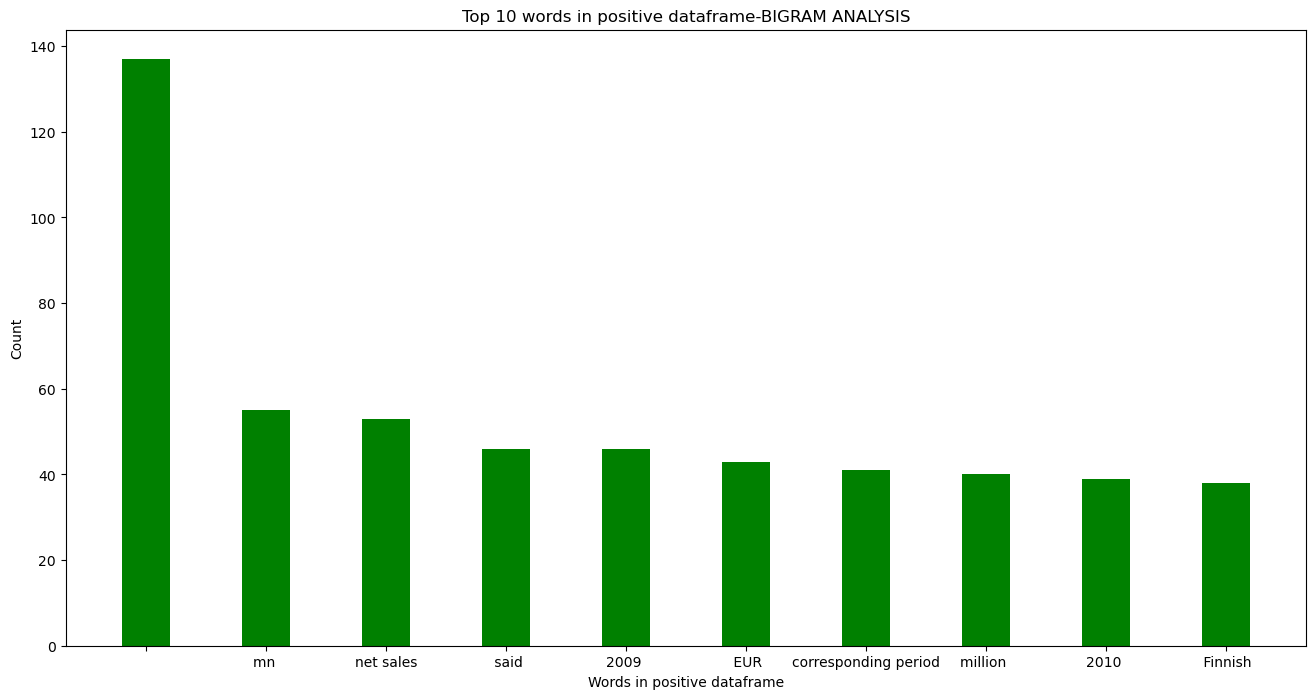

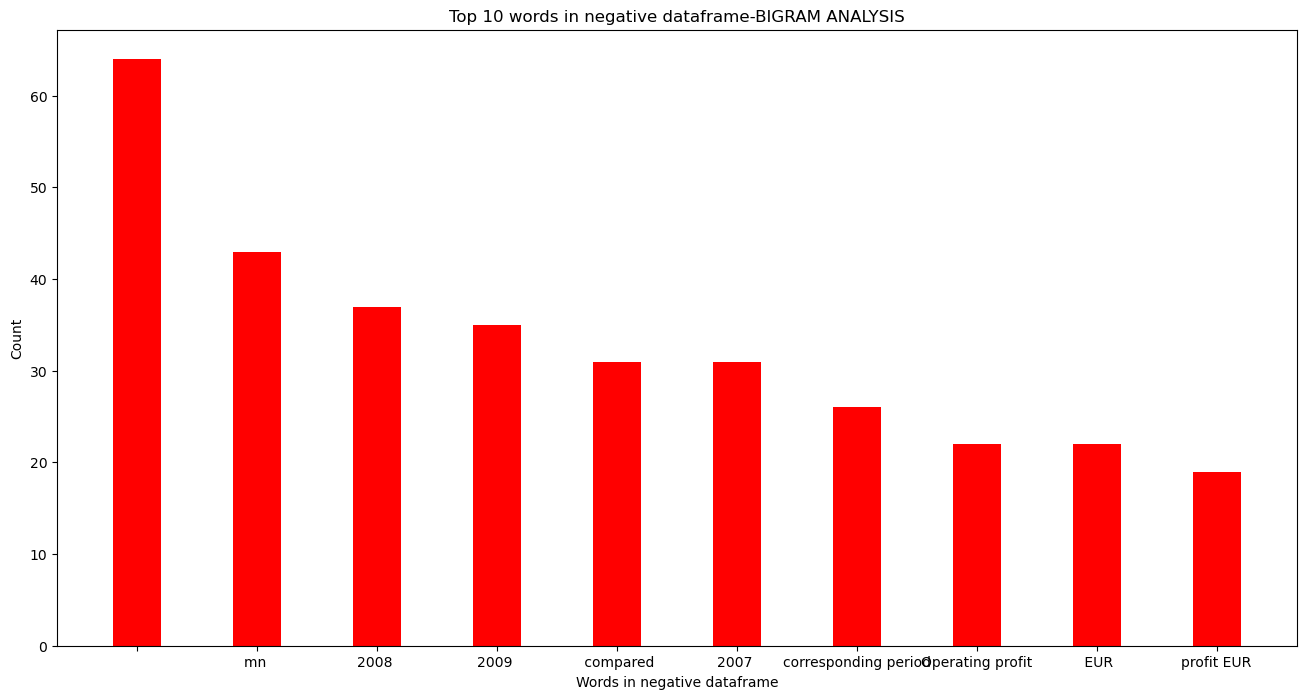

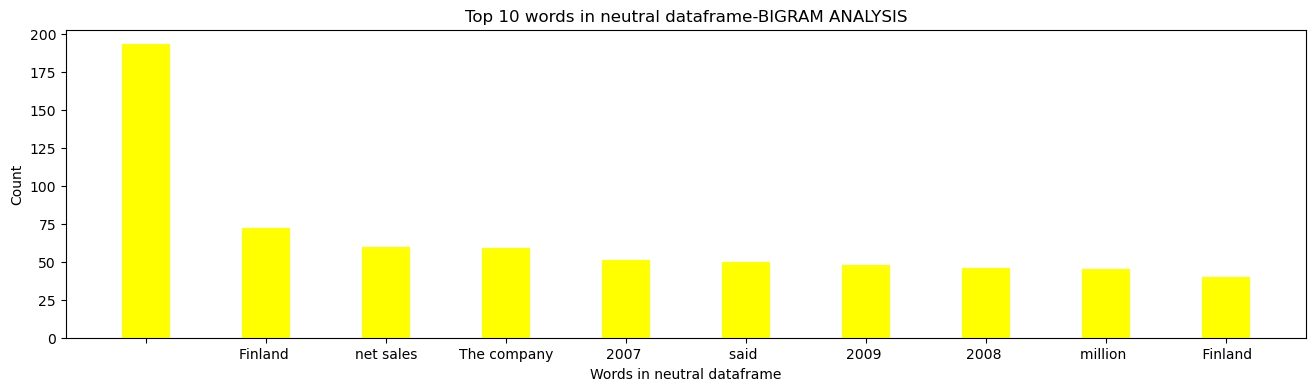

In [43]:
plt.figure(1,figsize=(16,8))
plt.bar(pd1bi,pd2bi, color ='green',width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-BIGRAM ANALYSIS")
plt.savefig("positive-bigram.png")

plt.figure(2,figsize=(16,8))
plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-BIGRAM ANALYSIS")
plt.savefig("negative-bigram.png")
plt.show()

plt.figure(3,figsize=(16,4))
plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-BIGRAM ANALYSIS")
plt.savefig("neutral-bigram.png")
plt.show()

plt.show()

# Creating Trigrams

In [44]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)

for text in df_train[df_train.sentiment=="positive"].news:
    for word in generate_N_grams(text,3):
        positiveValues3[word]+=1
        
for text in df_train[df_train.sentiment=="negative"].news:
    for word in generate_N_grams(text,3):
        negativeValues3[word]+=1
        
for text in df_train[df_train.sentiment=="neutral"].news:
    for word in generate_N_grams(text,3):
        neutralValues3[word]+=1

Sentence after removing stopwords:  ['The', 'two', 'companies', 'also', 'partner', 'developing', 'Raiso', 'cholesterol', 'lowering', 'brand', '', 'Benecol', '']
Sentence after removing stopwords:  ['In', 'addition', 'deal', 'includes', 'call', 'option', 'enable', 'Maritim', 'Food', 'AS', 'increase', 'holding', 'Sandanger', 'AS', '51', '', 'future', '']
Sentence after removing stopwords:  ['Finnish', 'handling', 'systems', 'company', 'Cargotec', 'Oyj', '', 'HEL', '', 'CGCBV', '', 'said', 'today', 'EUR', '13', 'million', '', 'USD', '166', '', 'contract', 'deliver', 'MacGregor', 'hatch', 'covers', 'ships', 'ordered', 'Norwegian', 'shipowner', 'Grieg', 'Shipping', '']
Sentence after removing stopwords:  ['Finnish', 'lifting', 'equipment', 'maker', 'Kone', 'Oyj', 'said', 'October', '4', '', '2007', 'order', 'worth', '15', 'mln', 'euro', '', '212', 'mln', 'deliver', 'total', '53', 'custom', 'designed', 'elevators', 'Norwegian', 'shipbuilder', 'Aker', 'Yards', 'ASA', '']
Sentence after removi

Sentence after removing stopwords:  ['The', 'company', 'goal', 'achieve', 'annual', 'savings', 'EUR', '2', 'million', '', 'USD', '27', '', '', 'two', 'thirds', 'realized', '2010', '']
Sentence after removing stopwords:  ['Finlan', 'listed', 'food', 'industry', 'company', 'HKScan', 'Group', 'controlled', 'companies', 'Baltics', 'improved', 'revenues', 'EUR', '35', 'mn', 'EUR', '1604', 'mn', '2010', 'EUR', '1569', 'mn', 'year', '']
Sentence after removing stopwords:  ['Production', 'expand', 'Elcoteq', 'locations', 'including', 'Mexico', 'Hungary', '2010', '']
Sentence after removing stopwords:  ['Commission', 'income', 'increased', '22', '', 'EUR', '44', 'mn', '', 'lending', 'volume', 'rose', '135', '', '']
Sentence after removing stopwords:  ['Pretax', 'profit', 'rose', 'EUR', '1019', 'mn', 'EUR', '1007', 'corresponding', 'period', '2005', '']
Sentence after removing stopwords:  ['Under', 'agreement', 'Biohit', 'becomes', 'focus', 'supplier', 'pipettors', 'disposable', 'pipettor', 'tip

Sentence after removing stopwords:  ['Operating', 'profit', 'totaled', 'EUR', '177', 'mn', 'compared', 'EUR', '176', 'mn', 'corresponding', 'period', '2007', '']
Sentence after removing stopwords:  ['Validating', 'fgVoIP', 'client', 'Symbian', 'Signed', 'represents', 'significant', 'step', 'forward', 'accomplishing', 'goal', '']
Sentence after removing stopwords:  ['Citigroup', '', 'Inc', '', 'NYSE', '', 'C', '', 'announced', 'Global', 'Transaction', 'Services', '', 'GTS', '', 'business', 'awarded', 'new', 'mandate', 'Finlandbased', 'Pohjola', 'Bank', 'Group', '']
Sentence after removing stopwords:  ['Lifetree', 'founded', '2000', '', 'revenues', 'risen', 'average', '40', '', 'margins', 'late', '30s', '']
Sentence after removing stopwords:  ['ADP', 'News', '', 'Nov', '13', '', '2008', '', 'Finnish', 'printed', 'circuit', 'board', 'PCB', 'maker', 'Aspocomp', 'Group', 'Oyj', 'OMX', '', 'ACG1V', 'said', 'today', 'net', 'loss', 'narrowed', 'EUR', '2', 'million', 'USD', '25', 'first', 'nine

Sentence after removing stopwords:  ['Comptel', '', 'vendor', 'dynamic', 'Operations', 'Support', 'System', '', 'OSS', '', 'software', '', 'selected', 'Orascom', 'Telecom', '', 'OTH', '', 'partner', 'provisioning', 'activation', 'solutions', 'mobile', 'services', '']
Sentence after removing stopwords:  ['Shares', 'Standard', 'Chartered', '', 'STAN', '', 'rose', '12', '', 'FTSE', '100', '', 'Royal', 'Bank', 'Scotland', '', 'RBS', '', 'shares', 'rose', '2', '', 'Barclays', 'shares', '', 'BARC', '', '', 'BCS', '', '17', '', '']
Sentence after removing stopwords:  ['Nordea', 'Group', 'operating', 'profit', 'increased', '2010', '18', 'percent', 'yearonyear', '364', 'billion', 'euros', 'total', 'revenue', '3', 'percent', '933', 'billion', 'euros', '']
Sentence after removing stopwords:  ['The', 'contracts', 'signed', 'acquire', 'uranium', 'produced', 'Sotkamo', 'nickelzinc', 'mine', 'eastern', 'Finland', 'owned', 'Talvivaara', '']
Sentence after removing stopwords:  ['Nevertheless', '', 'mar

Sentence after removing stopwords:  ['3', 'February', '2011', '', 'Finnish', 'broadband', 'data', 'communication', 'systems', 'provider', 'Teleste', 'Oyj', 'HEL', '', 'TLT1V', 'said', 'yesterday', 'net', 'profit', 'rocketed', 'EUR4', '8', '2010', 'EUR416', '000', '2009', 'lifted', 'dividend', 'proposal', '']
Sentence after removing stopwords:  ['International', 'sales', 'rose', '598', '', 'EUR', '12444', 'mn', '']
Sentence after removing stopwords:  ['HELSINKI', 'AFX', '', 'KCI', 'Konecranes', 'said', 'raised', 'stake', 'MMH', 'Holdings', 'Inc', '', 'owner', 'USbased', 'Morris', 'Materials', 'Handling', '', '909', 'pct', '745', 'pct', '']
Sentence after removing stopwords:  ['One', 'Uponor', 'promising', 'future', 'products', 'hydronic', 'cooling', 'system', '']
Sentence after removing stopwords:  ['', 'Consumers', 'well', 'received', 'packed', 'fresh', 'meat', '']
Sentence after removing stopwords:  ['The', 'agreement', 'expands', 'Tekla', 'Structures', '', 'scope', 'use', 'bridge', '

Sentence after removing stopwords:  ['In', 'JulySeptember', '2008', '', 'YIT', 'net', 'sales', 'increased', 'EUR', '9708', 'mn', '', 'compared', 'EUR', '9068', 'mn', 'corresponding', 'period', '2007', '']
Sentence after removing stopwords:  ['The', 'brokerage', 'said', '2006', 'seen', '', 'true', 'turning', 'point', '', 'European', 'steel', 'base', 'prices', '', 'better', 'pricing', 'seen', 'carrying', 'second', 'quarter', '2006', '']
Sentence after removing stopwords:  ['Nokia', '', 'strong', 'track', 'record', 'lowerend', 'handset', 'market', '', 'said', 'July', 'touchscreen', 'offering', 'would', 'come', 'year', 'cheaper', 'rival', 'models', 'order', 'tap', 'highervolume', 'market', '']
Sentence after removing stopwords:  ['', 'Overall', '', 'pleased', 'startup', 'curve', '', 'pleased', 'quality', 'paper', '', '', 'Stora', 'spokeswoman', 'Patricia', 'Dietz', 'said', 'Tuesday', '']
Sentence after removing stopwords:  ['According', 'ARehu', 'Managing', 'Director', '', 'Jouko', 'Lahtin

Sentence after removing stopwords:  ['Finnish', 'operator', 'Elisa', 'Aker', 'Yards', 'signed', 'longterm', 'service', 'deal', 'Elisa', 'deliver', 'necessary', 'voice', 'data', 'services', 'Aker', 'Yards', 'Finland', '']
Sentence after removing stopwords:  ['Benefon', '', 'wireless', 'GPS', 'technology', 'company', '', 'supply', 'Karputer', 'TWIG', 'navigation', 'platform', '', 'GPS', 'satellite', 'navigation', 'voice', 'guidance', 'service', '']
Sentence after removing stopwords:  ['The', 'EPS', 'outlook', 'increased', '56', 'pct', '2007', '70', 'pct', '2008', '']
Sentence after removing stopwords:  ['In', 'recent', 'months', '', 'Capman', 'taken', 'significant', 'steps', 'simplify', 'operations', '', 'CEO', 'Lennart', 'Simonsen', 'said', '']
Sentence after removing stopwords:  ['', 'The', 'margarine', 'business', 'put', 'good', 'shape', 'last', 'two', 'years', '', 'making', 'natural', 'addition', 'Bunge', '', 'looking', 'leverage', 'position', 'Central', 'Northern', 'European', 'mark

Sentence after removing stopwords:  ['The', 'OMX', 'Nordic', '40', '', 'OMXN40', '', 'index', '', 'comprising', '40', 'traded', 'Nordic', 'stocks', 'Nasdaq', 'OMX', 'exchange', '', 'closed', '129', '', '108447', 'points', 'Friday', '']
Sentence after removing stopwords:  ['', 'Lietuvos', 'Respublikos', 'sveikatos', 'apsaugos', 'ministerija', 'awarded', 'contract', 'UAB', '', 'AFFECTO', 'LIETUVA', '', 'financial', 'systems', 'software', 'package', '']
Sentence after removing stopwords:  ['Viking', 'Line', 'head', 'Jan', 'Kaarstroem', 'told', 'TT', 'company', 'ferries', 'well', 'equipped', 'handle', 'ice', 'passengers', 'safe', '']
Sentence after removing stopwords:  ['', 'In', 'newly', 'formed', 'company', 'YIT', 'Stavo', 'local', 'contact', 'network', '', 'expertise', 'market', 'know', 'Euro', 'Stavokonsult', 'combined', 'YIT', 'housing', 'concept', '', '', 'said', 'Juha', 'Kostiainen', '', 'Yit', 'Vice', 'President', '', 'Corporate', 'Communications', 'Business', 'Development', '']
Se

Sentence after removing stopwords:  ['HELSINKI', 'AFX', '', 'Outokumpu', 'Technology', 'said', 'signed', '35', 'mln', 'eur', 'agreement', 'Mongolia', 'Erdenet', 'Mining', 'Corporation', 'engineering', 'first', 'HydroCopper', 'plant', 'built', 'Erdenet', 'mine', 'site', '']
Sentence after removing stopwords:  ['Ruukki', 'forecast', '1520', '', 'annual', 'sales', 'growth', 'positive', 'pretax', 'result', '2010', '']
Sentence after removing stopwords:  ['Finnish', 'Cargotec', 'awarded', 'significant', 'order', 'total', '292', 'Hiab', 'loader', 'cranes', 'BAE', 'Systems', 'US', '']
Sentence after removing stopwords:  ['The', 'competition', 'received', 'great', 'enthusiasm', 'employees', '', 'goes', '']
Sentence after removing stopwords:  ['Microsoft', 'also', 'churned', 'courtship', '', 'agreeing', 'use', 'Navteq', 'mapping', 'service', '', 'offered', 'company', 'Nokia', 'bought', '', '81', 'billion', 'years', 'ago', '']
Sentence after removing stopwords:  ['Both', 'operating', 'profit', '

Sentence after removing stopwords:  ['Finnish', 'steel', 'maker', 'Rautaruukki', 'Oyj', '', 'HEL', '', 'RTRKS', '', '', 'Ruukki', '', 'said', 'today', 'net', 'loss', 'contracted', 'EUR', '49', 'million', '', 'USD', '682', '', 'first', 'nine', 'months', '2010', 'EUR', '229', 'million', 'period', 'year', 'ago', '']
Sentence after removing stopwords:  ['In', 'first', 'quarter', '2010', '', 'marktomarket', 'result', 'pretax', 'profit', 'EUR', '133', 'million', 'versus', 'loss', 'EUR', '32', 'million', 'period', 'last', 'year', '']
Sentence after removing stopwords:  ['TeliaSonera', 'secured', 'deliveries', '4G', 'modems', 'support', '3G', '2G', 'second', 'quarter', '2010', '']
Sentence after removing stopwords:  ['Cost', 'cutting', 'measures', '', 'produced', 'around', 'EUR70m', 'savings', 'past', 'nine', 'months', '', 'dampened', 'airline', 'loss', '', 'Finnair', 'said', '']
Sentence after removing stopwords:  ['The', 'transaction', 'line', 'Aspo', 'strategy', 'expand', 'Baltic', 'Sea', '

Sentence after removing stopwords:  ['Operating', 'loss', 'EUR', '179mn', '', 'compared', 'loss', 'EUR', '188mn', 'second', 'quarter', '2009', '']
Sentence after removing stopwords:  ['The', 'Basware', 'Connectivity', 'services', 'allow', 'companies', 'handle', 'purchase', 'pay', 'processes', 'online', 'make', 'internal', 'processes', 'efficient', '', '', 'said', 'CEO', 'Ilkka', 'Sihvo', '', 'Basware', 'Corporation', '']
Sentence after removing stopwords:  ['Dubbed', 'Nokia', 'Money', 'Solutions', '', 'company', 'officials', 'say', 'initiative', 'would', 'seek', 'bridge', 'gap', 'banked', 'unbanked', 'developing', 'countries', '']
Sentence after removing stopwords:  ['Kazgiprotsvetmet', 'Outotec', 'Finland', 'signed', 'agreement', 'strategic', 'cooperation', 'marketing', 'providing', 'minerals', 'processing', 'metallurgical', 'plants', 'related', 'services', 'Kazakhstan', 'surrounding', 'countries', '']
Sentence after removing stopwords:  ['Operating', 'profit', 'rose', 'EUR', '311', '

Sentence after removing stopwords:  ['We', 'choose', 'efficient', '', 'best', 'overall', 'value', 'option', 'customers', 'already', 'bidding', 'stage', '']
Sentence after removing stopwords:  ['Operating', 'profit', 'rose', 'EUR', '5mn', 'EUR', '28', 'mn', 'fourth', 'quarter', '2008', '']
Sentence after removing stopwords:  ['By', 'combining', 'existing', 'solutions', 'single', 'platform', '', 'Comptel', 'said', 'reduced', 'cost', 'deployment', '']
Sentence after removing stopwords:  ['With', 'measures', '', 'Suominen', 'Corporation', 'aims', 'ensure', 'competitiveness', 'Flexible', 'Packaging', 'business', 'long', 'term', '']
Sentence after removing stopwords:  ['1', 'February', '2011', '', 'Finnish', 'textile', 'clothing', 'company', 'Marimekko', 'Oyj', 'HEL', '', 'MMO1V', 'said', 'today', 'preliminary', 'operating', 'profit', 'grew', 'EUR8', '2', '2010', 'EUR6', '3', '2009', '']
Sentence after removing stopwords:  ['Demand', 'brisk', 'expected', 'order', 'levels', 'remained', 'high'

Sentence after removing stopwords:  ['However', '', 'bottomline', 'result', 'improved', 'thanks', 'positive', 'financial', 'items', '']
Sentence after removing stopwords:  ['Both', 'operating', 'profit', 'net', 'sales', '12month', 'period', 'increased', '', 'respectively', 'EUR4', '7', 'EUR26', '7', '', 'compared', '2004', '']
Sentence after removing stopwords:  ['Finnish', 'Metso', 'Paper', 'awarded', 'contract', 'rebuild', 'Sabah', 'Forest', 'Industries', '', '', 'SFI', '', 'pulp', 'mill', 'Sabah', '', 'Malaysia', '']
Sentence after removing stopwords:  ['', 'ADP', 'News', '', '', 'Feb', '12', '', '2009', '', 'Finnish', 'IT', 'solutions', 'provider', 'Affecto', 'Oyj', '', 'HEL', '', 'AFE1V', '', 'said', 'today', 'net', 'profit', 'rose', 'EUR', '85', 'million', '', 'USD', '11m', '', '2008', 'EUR', '7', 'million', '2007', '']
Sentence after removing stopwords:  ['Equity', 'ratio', '609', '', 'compared', '542', '', 'In', 'third', 'quarter', '2007', '', 'net', 'sales', 'Frozen', 'Foods',

Sentence after removing stopwords:  ['STX', 'Finland', 'Oy', 'signed', 'preliminary', 'agreement', 'building', 'environmentally', 'friendly', '', 'new', 'generation', 'cruise', 'ferry', 'Viking', 'Line', 'manage', 'Turku', '', 'Finland', '', 'Stockholm', '', 'Sweden', 'withViking', 'Line', 'ABP', '']
Sentence after removing stopwords:  ['Finnish', 'metal', 'components', 'supplier', 'Componenta', 'Oyj', 'said', 'net', 'profit', 'went', '35', 'mln', 'euro', '', '45', 'mln', '2006', '22', 'mln', 'euro', '', '28', 'mln', '2005', '']
Sentence after removing stopwords:  ['Last', 'year', 'net', 'sales', 'rose', 'EUR', '683', 'million', 'EUR', '622', 'million', '']
Sentence after removing stopwords:  ['Finnish', 'silicon', 'wafers', 'manufacturer', 'Okmetic', 'Oyj', 'said', 'swung', 'net', 'profit', '49', 'mln', 'euro', '', '63', 'mln', 'first', 'nine', 'months', '2006', 'net', 'loss', '18', 'mln', 'euro', '', '23', 'mln', 'year', 'earlier', '']
Sentence after removing stopwords:  ['', 'Our', 

Sentence after removing stopwords:  ['The', 'growth', 'net', 'sales', 'continued', 'favourably', 'Middle', 'East', 'Africaand', 'Asia', 'Pacific', '']
Sentence after removing stopwords:  ['This', 'bold', 'spinning', '360', 'red', 'fabric', 'design', 'set', 'beautifully', 'Ercols', 'Napoli', 'sofa', '']
Sentence after removing stopwords:  ['We', 'succeeded', 'increasing', 'market', 'share', 'sold', 'apartment', '', '', 'comments', 'Mr', 'Kari', 'Kauniskangas', '', 'Head', 'YIT', 'International', 'Construction', 'Services', '']
Sentence after removing stopwords:  ['Poyry', 'good', 'track', 'record', 'major', 'transportation', 'projects', 'Latin', 'America', '']
Sentence after removing stopwords:  ['', 'Our', 'customer', 'satisfied', 'Basware', 'Invoice', 'Automation', 'solution', 'extends', 'implementation', 'new', 'geographies', '']
Sentence after removing stopwords:  ['Consumption', 'forecast', 'grow', '2', '', '']
Sentence after removing stopwords:  ['In', 'financial', 'report', '', '

Sentence after removing stopwords:  ['By', 'cutting', 'number', 'plants', '', 'group', 'trim', 'fixed', 'costs', '']
Sentence after removing stopwords:  ['Major', 'Order', 'India', 'Comptel', 'Corporation', 'received', 'significant', 'longterm', 'order', 'mediation', 'provisioning', 'solutions', 'used', 'leading', 'operator', 'India', '']
Sentence after removing stopwords:  ['Earnings', 'per', 'share', '', 'EPS', '', 'first', 'quarter', '2007', 'amounted', 'EUR0', '07', '', 'EUR0', '04', '']
Sentence after removing stopwords:  ['I', 'use', 'natural', 'fibers', 'make', 'clothes', 'comfortable', '', 'allow', 'skin', 'breathe', 'ecofriendly', '']
Sentence after removing stopwords:  ['This', 'much', 'better', 'process', 'using', 'virgin', 'paper', 'requires', 'less', 'transportation', 'wood', 'pulp', 'places', 'like', 'Finland', 'Canada', '']
Sentence after removing stopwords:  ['Last', 'year', '', 'Lemminkainen', 'completed', 'Kouvola', 'Ksupermarket', 'contract', '']
Sentence after remov

Sentence after removing stopwords:  ['The', 'concept', 'enables', 'commercially', 'affordable', 'way', 'manufacture', 'highquality', 'TCO', 'coated', 'glass', 'solar', 'industry', '']
Sentence after removing stopwords:  ['The', 'price', 'raw', 'material', 'aluminium', 'went', 'end', '2005', '', 'company', 'considers', 'outlook', '2006', 'favourable', '']
Sentence after removing stopwords:  ['For', 'example', '', 'net', 'sales', 'increased', '59', '', 'first', 'quarter', '', 'EBITDA', 'increased', 'negative', 'EUR', '02', 'mn', 'first', 'quarter', '2009', '']
Sentence after removing stopwords:  ['According', 'SeppÆnen', '', 'new', 'technology', 'UMTS900', 'solution', 'network', 'building', 'costs', 'onethird', 'lower', 'building', '35', 'G', 'networks', '', 'operating', '2100', 'MHz', 'frequency', '']
Sentence after removing stopwords:  ['Finnish', 'food', 'industry', 'companies', 'HK', 'Ruokatalo', 'Atria', 'form', 'joint', 'venture', 'company', 'called', 'LÆnsiKalkkuna', 'produce', 't

Sentence after removing stopwords:  ['Shares', 'Royal', 'Sun', 'Alliance', 'continued', 'slide', 'back', '12month', 'high', '172p', 'last', 'month', '', 'potential', 'suitor', 'ruled', 'takeover', 'bid', '']
Sentence after removing stopwords:  ['Operating', 'loss', 'totaled', 'EUR', '03', 'mn', 'compared', 'profit', 'EUR', '22', 'mn', 'corresponding', 'period', '2007', '']
Sentence after removing stopwords:  ['UPMKymmene', 'Corp', '', 'world', 'largest', 'maker', 'magazine', 'paper', '', 'Tuesday', 'reported', '19percent', 'profit', 'drop', 'lower', 'paper', 'prices', '', 'higher', 'costs', 'strong', 'euro', 'hurt', 'revenue', '']
Sentence after removing stopwords:  ['However', '', 'orders', 'received', 'period', 'review', 'fell', '17', '', 'quarteronquarter', 'EUR', '213', 'million', 'recorded', 'second', 'quarter', '2010', '']
Sentence after removing stopwords:  ['The', 'air', 'traffic', 'Finland', 'stoppage', 'since', '']
Sentence after removing stopwords:  ['Finnish', 'Food', 'Work

Sentence after removing stopwords:  ['Sales', 'Finland', 'decreased', '20', '', '', 'international', 'sales', 'decreased', '93', '', 'terms', 'euros', '', '151', '', 'terms', 'local', 'currencies', '']
Sentence after removing stopwords:  ['Sales', 'Finland', 'decreased', '105', '', 'January', '', 'sales', 'outside', 'Finland', 'dropped', '17', '', '']
Sentence after removing stopwords:  ['It', 'disappointment', 'see', 'plan', 'folded', '']
Sentence after removing stopwords:  ['Finnish', 'power', 'supply', 'solutions', 'systems', 'provider', 'Efore', 'Oyj', 'said', 'net', 'loss', 'widened', '32', 'mln', 'euro', '', '42', 'mln', 'first', 'quarter', 'fiscal', '20062007', 'ending', 'October', '31', '', '2007', '900000', 'euro', '', '12', 'mln', 'period', 'fiscal', '200506', '']
Sentence after removing stopwords:  ['Profit', 'taxes', 'EUR', '40', 'mn', '', 'EUR', '49', 'mn', '']
Sentence after removing stopwords:  ['The', 'Finnish', 'company', 'previously', 'said', 'operating', 'result', 'l

Sentence after removing stopwords:  ['The', 'airline', 'share', 'price', 'closed', 'slightly', '', '', 'x20ac', '', '1251', '', '', '15US', '74', '', 'Helsinki', '']
Sentence after removing stopwords:  ['', 'ADP', 'News', '', '', 'Feb', '12', '', '2009', '', 'Finnish', 'construction', 'company', 'Lemminkainen', 'Oyj', '', 'HEL', '', 'LEM1S', '', 'said', 'today', 'net', 'profit', 'decreased', 'EUR', '635', 'million', '', 'USD', '811', '', '2008', 'EUR', '806', 'million', '2007', '']
Sentence after removing stopwords:  ['However', '', 'growth', 'margin', 'slowed', 'due', 'financial', 'crisis', '']
Sentence after removing stopwords:  ['In', 'Q1', '2009', '', 'company', 'result', 'taxes', 'continuing', 'operations', '', 'excluding', 'nonrecurring', 'items', '', 'totalled', 'EUR', '04', 'mn', '', 'compared', 'EUR', '01', 'mn', 'corresponding', 'period', '2008', '']
Sentence after removing stopwords:  ['Operating', 'profit', 'fell', 'EUR', '203', 'mn', 'EUR', '742', 'mn', 'second', 'quarter'

Sentence after removing stopwords:  ['The', 'tightened', 'competition', 'situation', 'production', 'automation', 'market', 'affected', 'net', 'sales', '2006', '', 'Cencorp', 'said', '']
Sentence after removing stopwords:  ['Finnish', 'soapstone', 'processing', 'fireplaces', 'maker', 'Tulikivi', 'Oyj', 'said', 'February', '26', '', '2007', 'would', 'cut', 'less', '20', 'jobs', 'fireplace', 'sales', 'organization', '', 'production', 'facilities', 'subsidiary', 'Kermansavi', 'Oy', '']
Sentence after removing stopwords:  ['The', 'total', 'capital', 'funds', 'managed', 'bank', 'decreased', '28', '', 'EUR', '284mn', 'end', 'September', '2008', '']
Sentence after removing stopwords:  ['Operating', 'profit', 'excluding', 'nonrecurring', 'items', 'decreased', 'EUR', '62', 'mn', 'EUR', '168', 'mn', '2007', '', 'representing', '23', '', 'net', 'sales', '']
Sentence after removing stopwords:  ['At', '133', 'pm', '', 'OMX', 'Helsinki', '25', '030', 'pct', 'lower', '246367', 'OMX', 'Helsinki', '037'

Sentence after removing stopwords:  ['Operating', 'profit', 'fell', 'EUR', '79', 'mn', 'second', 'quarter', '2005', 'EUR', '51', 'mn', 'second', 'quarter', '2006', '']
Sentence after removing stopwords:  ['The', 'period', 'sales', 'dropped', 'EUR30', '6', 'EUR38', '3', '', 'according', 'interim', 'report', '', 'released', 'today', '']
Sentence after removing stopwords:  ['Diluted', 'earnings', 'per', 'share', '', 'EPS', '', 'fell', 'EUR', '063', 'EUR', '171', '']
Sentence after removing stopwords:  ['RISING', 'costs', 'forced', 'packaging', 'producer', 'Huhtamaki', 'axe', '90', 'jobs', 'Hampshire', 'manufacturing', 'plant', '']
Sentence after removing stopwords:  ['Only', 'driver', 'left', 'car', 'suspect', '', 'kidnapped', 'forced', 'gunpoint', 'drive', 'Durham', '']
Sentence after removing stopwords:  ['In', 'Finland', '', 'media', 'group', 'Talentum', 'start', 'personnel', 'negotiations', 'cut', 'staff', 'parent', 'company', 'Talentum', 'publishing', 'unit', 'Talentum', 'media', '']

Sentence after removing stopwords:  ['Operating', 'profit', 'fell', 'EUR', '354', 'mn', 'EUR', '688', 'mn', '2007', '', 'including', 'vessel', 'sales', 'gain', 'EUR', '123', 'mn', '']
Sentence after removing stopwords:  ['Paper', 'stocks', 'among', 'biggest', 'fallers', '', 'Stora', 'Enso', '230', 'pct', '1401', 'eur', '', 'Mreal', '286', 'pct', '509', 'eur', 'UPMKymmene', '114', 'pct', 'lower', '1910', 'eur', '']
Sentence after removing stopwords:  ['The', 'terms', 'aforementioned', 'funding', 'considerably', 'Bank', 'current', 'CDS', 'levels', 'market', 'maturity', 'ranging', '1', '75', 'years', '']
Sentence after removing stopwords:  ['The', 'company', 'previous', 'estimate', 'lower', 'revenue', 'yearago', 'EUR', '939', 'million', '']
Sentence after removing stopwords:  ['Furthermore', '', 'sales', 'new', 'passenger', 'cars', 'light', 'commercial', 'vehicles', 'country', 'declined', '54', '', 'yearonyear', 'last', 'month', '']
Sentence after removing stopwords:  ['Applying', 'summer

Sentence after removing stopwords:  ['In', 'Switzerland', '', 'Teleste', 'established', 'supplier', 'products', 'long', 'time', 'primary', 'customers', 'include', 'cable', 'fibertothehome', '', 'FTTH', '', 'operators', '']
Sentence after removing stopwords:  ['Risto', 'Raty', '', 'Tekla', 'executive', 'vice', 'president', '', 'said', 'Tekla', 'Structures', 'ArchiCAD', 'cover', 'entire', 'design', 'documentation', 'workflow', 'throughout', 'construction', 'project', '']
Sentence after removing stopwords:  ['Most', 'growth', 'beer', 'consumption', 'took', 'place', 'Far', 'East', '', 'Latin', 'America', 'Africa', '']
Sentence after removing stopwords:  ['Luna', 'took', 'fifth', 'place', 'sixunder', '207', '', 'shot', 'behind', 'Spain', 'Beatriz', 'Recari', 'Germany', 'Martina', 'Eberl', '', 'Welsh', 'player', 'Becky', 'Brewerton', 'highestplaced', 'British', 'finisher', '', 'sharing', 'seventh', 'place', 'threeunder', '210', 'shooting', '71', '']
Sentence after removing stopwords:  ['', '

Sentence after removing stopwords:  ['These', 'companies', '20000', 'sq', 'office', 'commercial', 'building', 'substantial', 'amount', 'building', 'right', 'new', 'shopping', 'center', 'Liljeholmen', '', 'Stockholm', '']
Sentence after removing stopwords:  ['Includes', 'company', 'brand', 'share', 'data', 'category', '', 'well', 'distribution', 'channel', 'data', '']
Sentence after removing stopwords:  ['Quality', 'chargers', 'CHARGZ', 'brand', 'sold', 'selected', 'retail', 'stores', 'sales', 'locations', 'worldwide', '']
Sentence after removing stopwords:  ['The', 'study', 'designed', 'enable', 'formal', 'statistical', 'evaluation', 'therapeutic', 'activity', '', 'company', 'said', '']
Sentence after removing stopwords:  ['industry', 'Asia', '\x88', 'Pakistan', '', 'Malaysia', '', 'Taiwan', 'Philippines', 'Today', '', 'Global', 'Research', '', 'Data', 'Services', 'going', 'publish', 'several', 'market', 'analyses', 'cement', 'markets', 'Asia', '']
Sentence after removing stopwords:  [

Sentence after removing stopwords:  ['One', 'even', 'receive', 'spot', 'alerts', 'soon', 'jobs', 'posted', '', 'putting', 'front', 'queue', 'opportunities', '']
Sentence after removing stopwords:  ['The', 'final', 'outcome', 'rights', 'offering', 'reported', 'around', '23', 'October', '2009', '']
Sentence after removing stopwords:  ['Beef', 'imports', 'fell', 'slightly', '2006', '', '14mn', 'kilos', '']
Sentence after removing stopwords:  ['Sales', '14', 'per', 'cent', 'Finland', '27', 'per', 'cent', 'abroad', 'sales', 'lifted', 'strong', 'growth', 'sales', 'Russia', 'Lithuania', '']
Sentence after removing stopwords:  ['Kesko', 'wwwkeskofi', 'Finnish', 'retail', 'specialist', 'whose', 'stores', 'offer', 'quality', 'daily', 'lives', 'consumers', 'valued', 'products', 'services', 'competitive', 'prices', '']
Sentence after removing stopwords:  ['The', 'deal', '', 'already', 'approved', 'shareholders', '', 'carried', 'first', 'half', '2011', '']
Sentence after removing stopwords:  ['The'

Sentence after removing stopwords:  ['Paychex', '100', 'offices', 'serving', 'approximately', '554000', 'payroll', 'clients', 'nationwide', 'May', '31', '', '2009', '']
Sentence after removing stopwords:  ['The', 'bank', 'also', 'expects', 'additional', 'costs', '', 'related', 'Dash', '8', '', 'Q400', 'jets', '', 'group', 'shelved', 'October', '2007', '']
Sentence after removing stopwords:  ['The', 'company', 'delivered', 'technical', 'infrastructure', '', 'used', 'NAV', 'data', 'warehouse', 'business', 'intelligence', 'initiatives', '']
Sentence after removing stopwords:  ['Elisa', 'commissioned', 'Finland', 'Poyry', 'Telecom', 'Oy', 'conduct', 'study', 'reception', 'Estonia', 'largest', 'cities', 'besides', 'Tallinn', '']
Sentence after removing stopwords:  ['In', '2008', '', 'steel', 'industry', 'accounted', '64', 'percent', 'cargo', 'volumes', 'transported', '', 'whereas', 'energy', 'industry', 'accounted', '28', 'percent', 'industries', '8', 'percent', '']
Sentence after removing 

Sentence after removing stopwords:  ['Chief', 'Financial', 'Officer', 'Jim', 'Heindlmeyer', 'said', 'Beyond', 'Oblivion', 'advanced', 'talks', 'four', 'major', 'recording', 'companies', 'service', '']
Sentence after removing stopwords:  ['', 'Nordic', 'infrastructure', 'construction', 'one', 'strategic', 'growth', 'areas', '']
Sentence after removing stopwords:  ['Nordic', 'Walking', 'first', 'used', 'summer', 'training', 'method', 'crosscountry', 'skiers', '']
Sentence after removing stopwords:  ['Risto', 'Jalo', '', 'chief', 'executive', 'Dormus', 'Print', 'also', 'owner', 'remainder', 'company', '', 'keep', 'position', 'acquisition', '']
Sentence after removing stopwords:  ['LONDON', 'AFX', '', 'Fortum', 'said', 'agreed', 'sell', 'industrial', 'maintenance', 'service', 'operations', 'funds', 'managed', 'CapMan', 'undisclosed', 'sum', '']
Sentence after removing stopwords:  ['With', 'new', 'arrangement', '', 'customer', 'responsibilities', 'become', 'mainly', 'regional', '']
Sentence

Sentence after removing stopwords:  ['A', 'total', '30', '', 'order', 'value', 'booked', 'fourth', 'quarter', '2009', 'remainder', 'booked', 'second', 'quarter', '2010', '']
Sentence after removing stopwords:  ['It', 'includes', 'options', 'additional', '30', 'communal', 'building', 'sites', 'well', 'construction', 'supervision', 'works', 'construction', 'sites', '']
Sentence after removing stopwords:  ['Jun', '25', '', '2008', '', 'Boy', 'Genius', 'Report', 'delivered', 'Newstex', '', '', 'The', 'Nokia', '', 'NYSE', '', 'NOK', '', 'N78', '', 'huh', '']
Sentence after removing stopwords:  ['Dopplr', 'members', 'share', 'personal', 'business', 'travel', 'plans', 'privately', 'networks', '', 'highlight', 'interesting', 'places', 'stay', '', 'eat', 'explore', 'cities', 'around', 'world', '']
Sentence after removing stopwords:  ['Editor', 'note', '', 'Grimaldi', 'generated', '17', 'bln', 'euro', '', '', '2182', 'bln', '', 'turnover', '2005', '', 'ANSA', 'reported', 'May', '29', '', '2006',

Sentence after removing stopwords:  ['GeoSentric', 'flagship', 'product', 'GyPSii', 'platform', '', 'uses', 'pioneering', 'geolocation', 'software', 'technology', 'connect', 'people', 'people', '', 'people', 'places', 'new', 'exciting', 'social', 'community', 'locationspecific', 'services', '']
Sentence after removing stopwords:  ['Headline', 'release', 'dated', 'March', '26', '', '2008', 'read', '', 'Acacia', 'Subsidiary', 'Enters', 'Settlement', 'Agreement', 'Rule', 'Based', 'Monitoring', 'Technology', 'FSecure', '', 'sted', 'Acacia', 'Technologies', 'Licenses', 'Rule', 'Based', 'Monitoring', 'Technology', 'FSecure', '', '']
Sentence after removing stopwords:  ['An', 'audio', 'webcast', 'available', 'live', 'archived', 'Cerner', 'Web', 'site', 'wwwcernercom', '']
Sentence after removing stopwords:  ['The', 'insurance', 'division', 'turned', 'EUR120m', 'profit', '']
Sentence after removing stopwords:  ['The', 'business', 'section', 'also', 'includes', 'Ahlstrom', 'sustainability', 're

Sentence after removing stopwords:  ['FinancialWire', 'tm', 'press', 'release', 'service', '', 'receives', 'compensation', 'news', '', 'opinions', 'distributions', '']
Sentence after removing stopwords:  ['already', 'good', 'position', 'technical', 'building', 'services', 'market', 'Ostrobothnia', '']
Sentence after removing stopwords:  ['Sanoma', 'Magazines', 'International', 'invite', 'shareholders', 'holding', 'approximately', '15', '', 'shares', 'sell', 'shares', '']
Sentence after removing stopwords:  ['Finnish', 'Neste', 'Oil', 'previously', 'list', '', 'fallen', 'list', 'completely', '']
Sentence after removing stopwords:  ['Temporary', 'layoffs', 'units', 'already', 'started', '']
Sentence after removing stopwords:  ['Shareholders', 'right', 'put', 'agenda', 'AGM', 'items', 'within', 'competence', 'general', 'meeting', '']
Sentence after removing stopwords:  ['In', 'beers', '', 'Olvi', 'retained', 'market', 'position', '']
Sentence after removing stopwords:  ['A', 'total', 'EUR

Sentence after removing stopwords:  ['He', 'said', '', '', 'It', 'sale', 'actively', 'marketing', '']
Sentence after removing stopwords:  ['Nokia', 'said', 'still', 'expects', 'sell', '150', 'million', 'Symbian', 'devices', 'years', 'come', '', 'giving', 'indication', 'expects', 'Phone', '7', 'handoff', 'work', '']
Sentence after removing stopwords:  ['QPR', 'product', 'family', 'fully', 'compatible', 'Microsoft', 'Windows', '7', 'operating', 'system', '']
Sentence after removing stopwords:  ['In', 'addition', '', 'launch', 'versatile', 'online', 'service', 'complete', 'traditional', 'printed', 'newspaper', '', 'Mr', 'Valkama', 'says', '']
Sentence after removing stopwords:  ['The', 'total', 'value', 'project', 'estimated', '30', 'mln', 'euro', '', '44', 'mln', '', 'services', '20', 'mln', 'euro', '', '29', 'mln', 'thirdparty', 'licences', '10', 'mln', 'euro', '', '15', 'mln', '']
Sentence after removing stopwords:  ['There', 'substitutes', 'AC', 'drives', '']
Sentence after removing s

Sentence after removing stopwords:  ['', 'The', 'issues', 'identified', 'Stonesoft', 'affect', 'range', 'content', 'inspection', 'technology', '']
Sentence after removing stopwords:  ['Ahlstrom', 'Corporation', 'STOCK', 'EXCHANGE', 'ANNOUNCEMENT', '2342007', 'Ahlstrom', 'Corporation', 'publish', 'first', 'quarter', 'financial', 'results', '2007', 'Friday', '', 'April', '27', '', '2007', 'approximately', '830', 'Finnish', 'time', '']
Sentence after removing stopwords:  ['They', 'race', 'Google', 'get', 'lots', 'users', 'onto', 'service', 'social', 'networking', 'creates', 'new', 'business', 'models', '', 'said', 'Martin', 'Garner', '', 'Londonbased', 'analyst', 'CCS', 'Insight', '']
Sentence after removing stopwords:  ['Stora', 'Enso', 'also', 'meetings', 'labor', 'authorities', '', 'Employment', 'Economic', 'Development', 'Centres', 'representatives', 'government', 'order', 'find', 'solutions', '']
Sentence after removing stopwords:  ['Protalix', 'developing', 'genetically', 'engineere

Sentence after removing stopwords:  ['The', 'portfolio', 'comprises', '118000', 'm2', 'leasable', 'space', 'vacancy', 'rate', 'roughly', '5', '', '', 'let', 'around', '140', 'tenants', 'two', 'largest', 'Swedish', 'government', 'Ericsson', '']
Sentence after removing stopwords:  ['Finnish', 'silicon', 'wafers', 'maker', 'Okmetic', 'Oyj', 'said', 'September', '17', '', '2008', 'invest', 'total', '15', 'mln', 'euro', '', '213', 'mln', 'sensor', 'wafer', 'business', '']
Sentence after removing stopwords:  ['The', 'purchase', 'price', 'disclosed', '']
Sentence after removing stopwords:  ['RLNordic', 'part', 'RaiffeisenBankingGroup', 'Austria', 'subsidiary', 'RaiffeisenLeasing', 'GmbH', 'Austria', '']
Sentence after removing stopwords:  ['', 'The', 'industry', 'coming', 'interesting', 'fork', 'road', 'handset', 'manufacturers', 'wireless', 'carriers', 'attempt', 'serve', 'portal', 'Webbased', 'service', 'wireless', 'handset', '', '', 'wrote', '']
Sentence after removing stopwords:  ['The', 

Sentence after removing stopwords:  ['ISMS', 'disclose', 'financial', 'results', '', 'daily', 'said', '']
Sentence after removing stopwords:  ['Timo', 'Penttila', 'appointed', 'new', 'manager', 'responsible', 'asset', 'management', 'Nordea', 'institutional', 'customers', 'Finland', '']
Sentence after removing stopwords:  ['Initial', 'estimated', 'total', 'value', 'contract', '250', '000', 'Euros', '', 'excluding', 'VAT', '']
Sentence after removing stopwords:  ['Before', 'Kemira', 'installation', 'NordAlu', 'producing', '3500', 'tons', 'liquid', 'solid', 'aluminum', 'waste', 'per', 'year', '']
Sentence after removing stopwords:  ['', 'The', 'rest', 'week', 'tapings', 'Jimmy', 'Kimmel', 'Live', 'canceled', 'back', 'feet', '']
Sentence after removing stopwords:  ['Mformation', 'provides', 'enhanced', 'management', 'applications', 'enabling', 'configuration', 'control', 'throughout', 'lifecycle', '']
Sentence after removing stopwords:  ['UPM', 'talking', 'Myllykoski\x88', 'creditor', 'ban

Sentence after removing stopwords:  ['Maggie', 'Ramsey', 'wait', '', 'thousands', 'Oregon', 'Washington', 'guides', '', 'anglers', 'others', 'flock', 'frequent', 'seminars', '', 'nearly', '']
Sentence after removing stopwords:  ['The', 'new', 'facility', '', 'known', 'Technopolis', 'Pulkovo', '', 'introduce', 'Russian', 'market', 'entirely', 'new', 'concept', 'creating', '', 'operating', 'growing', 'commerciallyfunded', 'science', 'technology', 'park', 'support', 'growth', 'knowledgeintensive', 'companies', '']
Sentence after removing stopwords:  ['', 'Nokia', 'interested', 'bring', 'Nokia', 'market', '', '']
Sentence after removing stopwords:  ['The', 'reductions', 'concluded', 'autumn', '2010', '']
Sentence after removing stopwords:  ['Tecnomen', 'system', 'features', 'new', 'range', 'valueadded', 'services', 'prepaid', 'postpaid', 'billing', '', 'charging', 'rating', 'voice', 'calls', '', 'data', 'traffic', '', 'kind', 'content', 'services', 'mobile', 'fixed', 'networks', '']
Senten

Sentence after removing stopwords:  ['NASDAQ', 'OMX', '', 'GEO1V', '', 'GyPSii', 'business', 'unit', '', 'developers', 'awardwinning', 'GyPSii', 'mobile', 'social', 'networking', 'application', '', 'today', 'announced', 'availability', 'free', 'download', 'via', 'Samsung', 'Mobile', 'Applications', 'Store', '']
Sentence after removing stopwords:  ['The', 'maximum', 'grade', 'veneer', 'yield', 'calculated', '', 'based', 'dimensions', 'grades', 'veneer', 'products', '', 'well', 'iterating', 'places', 'peeling', 'axes', 'simulating', 'peeling', 'process', '']
Sentence after removing stopwords:  ['A', 'meeting', 'media', 'analysts', 'held', 'day', '1030', 'Stonesoft', 'Headquarters', 'Helsinki', '', 'Italahdenkatu', '22', 'A', 'The', 'Interim', 'report', 'presented', 'Stonesoft', 'CEO', 'Ilkka', 'Hiidenheimo', '']
Sentence after removing stopwords:  ['The', 'order', 'valued', 'USD12', '2']
Sentence after removing stopwords:  ['The', 'transaction', '', 'includes', 'US', '15', 'billion', 'eu

Sentence after removing stopwords:  ['Neste', 'Oil', 'said', 'build', 'biodiesel', 'production', 'facility', 'Rotterdam', '', 'Netherlands', '', 'estimated', 'cost', '670', 'million', 'euros', '', 'naming', 'Francebased', 'Technip', 'project', 'main', 'contractor', '']
Sentence after removing stopwords:  ['BUSINESS', 'LINE', '', 'May', '16', '', '2008', 'Sriperumbudur', '', 'May', '15', '', 'Nokia', 'two', 'key', 'suppliers', '', 'Aspocomp', 'Wintek', '', 'likely', 'start', 'operations', 'within', 'three', 'months', 'Nokia', 'Telecom', 'Park', 'Sriperumbudur', '', '45', 'km', 'west', 'Chennai', '']
Sentence after removing stopwords:  ['Ahlstrom', 'share', 'quoted', 'NASDAQ', 'OMX', 'Helsinki', '']
Sentence after removing stopwords:  ['The', 'businesses', 'divested', 'offer', 'dairy', '', 'edible', 'fats', '', 'readymeal', 'icecream', 'packaging', 'multinational', 'local', 'customers', '']
Sentence after removing stopwords:  ['Finnish', 'navigation', 'device', 'manufacturer', 'Benefon',

Sentence after removing stopwords:  ['Solidium', 'picked', 'Tikkurila', 'shares', 'dividend', 'book', 'value', 'EUR15', '80', 'per', 'share', '']
Sentence after removing stopwords:  ['JÆrviSuomen', 'Portti', 'also', 'planning', 'reduce', 'use', 'sodium', 'nitrite', '']
Sentence after removing stopwords:  ['After', 'signing', '', 'total', 'amount', 'Aspo', 'revolving', 'credit', 'facility', 'agreements', 'EUR', '50', 'million', '', 'replaces', 'formerly', 'valid', 'agreements', 'EUR', '80', 'million', '']
Sentence after removing stopwords:  ['Competition', 'authorities', 'approve', 'deal', 'finalized', '']
Sentence after removing stopwords:  ['ADPnews', '', 'Dec', '23', '', '2009', '', 'Norwegian', 'financial', 'services', 'group', 'SpareBank', '1', 'Gruppen', 'AS', 'OSL', '', 'SBGRP', 'said', 'board', 'directors', 'appointed', 'today', 'Jarle', 'Haug', 'managing', 'director', 'claims', 'collection', 'subsidiary', 'SpareBank', '1', 'Gruppen', 'Finans']
Sentence after removing stopwords:

Sentence after removing stopwords:  ['Stora', 'Enso', '', 'global', 'paper', '', 'packaging', 'wood', 'products', 'company', '', 'Neste', 'Oil', '', 'Finnish', 'company', 'engaged', 'refining', 'marketing', 'oil', '', 'inaugurated', 'demonstration', 'plant', 'Varkaus', '', 'Finland', 'biomass', 'liquids', 'production', 'utilizing', 'forestry', 'residues', '']
Sentence after removing stopwords:  ['The', 'Group', '', 'net', 'sales', 'EUR', '235', 'million', '2009', '', 'employs', '2', '000', 'people', '33', 'countries', '']
Sentence after removing stopwords:  ['The', 'dividend', 'paid', 'April', '15', '', '2008', 'shareholders', 'record', 'date', 'April', '8', '', '2008', 'entered', 'list', 'shareholders', 'kept', 'Finnish', 'Central', 'Securities', 'Depository', 'Ltd', '']
Sentence after removing stopwords:  ['Economic', 'development', 'China', 'longer', 'taking', 'place', 'East', 'coast', 'Shanghai', 'area', '', 'Vauramo', 'says', '']
Sentence after removing stopwords:  ['Margin', 'cal

Sentence after removing stopwords:  ['Russia', 'Video', 'International', 'Group', 'holds', 'controlling', 'stake', 'Russian', 'Media', 'Ventures', '']
Sentence after removing stopwords:  ['Deutsche', 'Beteiligungs', '', 'well', 'private', 'equity', 'fund', 'manages', '', 'first', 'bought', '75', '', 'MCE', 'secondary', 'buyout', 'White', 'Plains', '', 'NY', '', 'financial', 'investor', 'Andlinger', '', 'Co', '2007', '']
Sentence after removing stopwords:  ['According', 'Seikku', '', 'retail', 'sector', 'Finland', 'controlled', '34', 'large', 'actors', '', 'food', 'manufacturers', 'still', 'relatively', 'small', '']
Sentence after removing stopwords:  ['Net', 'profit', 'period', '2009', '', 'EURO', '', '29', 'million', '']
Sentence after removing stopwords:  ['Teleste', 'BK', 'Optiflex', 'amplifier', 'products', 'used', 'ongoing', 'capacity', 'upgrade', 'KDG', 'network', 'bidirectionality', '']
Sentence after removing stopwords:  ['The', 'inaugural', 'speech', 'given', 'Hannu', 'Kyrolai

Sentence after removing stopwords:  ['Sanoma', 'also', 'Executive', 'Committee', '', 'accordance', 'Company', 'Articles', 'Association', '', 'prepares', 'proposals', 'matters', 'decided', 'noted', 'Board', 'Directors', '']
Sentence after removing stopwords:  ['Aker', 'Yards', 'Finland', 'begin', 'using', 'Chinese', 'subcontractors', 'Finnish', 'shipyards', '']
Sentence after removing stopwords:  ['We', 'serve', 'broad', 'range', 'customers', '', 'including', 'construction', 'process', 'industries', '', 'shipyards', '', 'public', 'sector', 'households', '']
Sentence after removing stopwords:  ['The', 'company', 'decided', 'stop', 'operations', 'Ruukki', 'Construction', 'Division', 'Latvia', 'Lithuania', '', 'concentrate', 'production', 'logistics', 'Parnu', '', 'Estonia', '2009', '']
Sentence after removing stopwords:  ['Our', 'customers', 'come', 'following', 'countries', '', 'UK', '', 'USA', '', 'Spain', '', 'France', '', 'Italy', '', 'Germany', '', 'China', '', 'Hong', 'Kong', '', 'S

Sentence after removing stopwords:  ['Finnish', 'automation', 'solutions', 'developer', 'Cencorp', 'Corporation', '', 'OMX', 'Helsinki', '', 'CNC1V', '', 'reported', 'Thursday', '', '6', 'November', '', 'operating', 'loss', 'EUR1', '3', 'net', 'sales', 'EUR11', '9', 'period', 'January', 'September', '2008', '']
Sentence after removing stopwords:  ['Saunalahti', 'part', 'Elisa', 'group', '']
Sentence after removing stopwords:  ['The', 'contract', 'take', 'effect', '2009', 'five', 'ten', 'year', 'period', '']
Sentence after removing stopwords:  ['The', 'oil', 'shale', 'feedersupply', 'solution', 'deliver', 'crushed', 'oil', 'shale', 'shale', 'oil', 'refinery', 'already', 'operation', 'well', 'novel', 'Enefit280', 'shale', 'oil', 'technology', 'processing', 'plant', '']
Sentence after removing stopwords:  ['Officials', 'disclose', 'contract', 'value', '']
Sentence after removing stopwords:  ['The', 'price', 'specified', 'completion', 'date', '']
Sentence after removing stopwords:  ['The',

Sentence after removing stopwords:  ['The', 'operator', 'one', '6', 'operators', 'granted', 'WiMAX', 'license', 'Taiwan', '', 'hopes', 'first', 'launch', 'commercial', 'services', 'early', '2009', '']
Sentence after removing stopwords:  ['The', 'category', 'marked', 'maturity', 'recession', '']
Sentence after removing stopwords:  ['The', 'customer', 'forwarded', 'site', '', 'unknown', 'logged', 'first', 'number', '']
Sentence after removing stopwords:  ['According', 'Rautaruukki', '', 'company', 'wants', 'promote', 'use', 'emissionfree', 'energy', 'sources', '']
Sentence after removing stopwords:  ['The', 'full', 'MidnightTrader', 'extendedhours', 'trading', 'analysis', 'news', 'service', 'available', 'realtime', 'COMTEX', '']
Sentence after removing stopwords:  ['Gearing', '43', '', 'compared', '67', '', '2004', '']
Sentence after removing stopwords:  ['Pharmaceutical', 'market', 'Belgium', 'Global', 'Research', '', 'Data', 'Services', 'published', 'recently', 'market', 'analysis', 'p

Sentence after removing stopwords:  ['The', 'official', 'opening', 'office', '', 'located', 'Prague', '', 'celebrated', 'May', '20', '']
Sentence after removing stopwords:  ['The', 'pershare', 'subscription', 'price', 'shares', 'subscribed', 'option', 'rights', 'EUR', '135', '']
Sentence after removing stopwords:  ['ALEXANDRIA', '', 'Va', '', 'Nov', '19', '', 'Erkki', 'Aho', '', 'Elimaki', '', 'Finland', '', 'developed', 'method', 'apparatus', 'conjunction', 'shoe', 'press', '']
Sentence after removing stopwords:  ['As', 'result', 'transaction', '', 'Sanoma', 'Budapest', 'acquired', 'stake', 'online', 'store', 'Egeszsegbolt', '']
Sentence after removing stopwords:  ['The', 'previous', 'offer', '34', '', 'voting', 'rights', '123', '', 'capital', '']
Sentence after removing stopwords:  ['According', 'shipping', 'company', 'Viking', 'Line', '', 'EU', 'decision', 'significant', 'financial', 'impact', '']
Sentence after removing stopwords:  ['Liora', 'got', 'brandnew', 'bag', '']
Sentence a

Sentence after removing stopwords:  ['CapMan', '', 'Stockholmheadquartered', 'private', 'equity', 'firm', '', 'held', 'first', 'close', 'second', 'private', 'equity', 'real', 'estate', 'fund', 'continues', 'push', 'property', 'sector', '']
Sentence after removing stopwords:  ['Cargotec', 'also', 'move', 'HallbergIvarsson', 'service', 'installation', 'business', 'roof', 'service', 'center', 'Kalmar', 'MacGregor', 'solutions', 'Gothenburg', '']
Sentence after removing stopwords:  ['It', 'handpainted', 'resin', 'real', '140', 'trebles', '75cm', 'long', '25cm', 'deep', 'top', 'bottom', 'middle', 'hook', '']
Sentence after removing stopwords:  ['Underground', 'parking', 'facilities', 'also', 'built', 'basement', 'floor', '']
Sentence after removing stopwords:  ['The', 'merger', 'two', 'telecoms', 'operators', 'expected', 'result', 'world', 'fourth', 'largest', 'telecoms', 'operator', '']
Sentence after removing stopwords:  ['The', 'EBRD', 'using', 'funds', 'provide', '216', 'million', 'A', 

Sentence after removing stopwords:  ['ABN', 'Amro', 'Capital', 'agreed', 'sell', 'Helsinkibased', 'designer', 'homeware', 'producer', '', 'Iittala', 'Oyj', '', 'crosstown', 'consumer', 'products', 'group', 'Fiskars', 'Corp', '', 'EUR230', 'million', 'EUR235', 'million', '', '', '310', 'million', '', '316', 'million', '', '']
Sentence after removing stopwords:  ['The', 'employeremployee', 'talks', 'concerned', '500', 'people', '', '', 'whole', 'staff', 'Finland', '']
Sentence after removing stopwords:  ['Body', 'ES', 'Vostok', 'also', 'owns', 'stakes', 'power', 'sales', 'companies', 'MosenergosbytBody', '', 'RTS', '', 'MSSB', '', '', '509', '', '', '', 'Altaienergosbyt', '', '100', '', '', '', 'Saratovenergo', '', 'RTS', '', 'SARE', '', 'Body', '', '4836', '', '', 'Tambov', 'Power', 'Sales', 'Company', '', 'RTS', '', 'TASB', '', '', '4901', '', '', '', 'ofBodywhich', 'received', 'distribution', 'balance', '']
Sentence after removing stopwords:  ['In', '2010', '', 'Marimekko', 'Group', '

Sentence after removing stopwords:  ['The', 'company', 'designs', '', 'manufactures', 'markets', 'advanced', 'composite', 'products', 'industrial', 'applications', 'consumer', 'goods', 'crosscountry', '', 'alpine', 'Nordic', 'Walking', 'poles', '', 'floorball', 'sticks', 'antenna', 'radomes', '']
Sentence after removing stopwords:  ['The', 'company', 'designs', 'manufactures', 'highquality', 'clothing', '', 'interior', 'decoration', 'textiles', '', 'bags', '', 'accessories', '']
Sentence after removing stopwords:  ['Solidium', 'holds', '50', 'per', 'cent', 'shares', 'Solidium', 'Oy', 'acquired', '50', 'per', 'cent', 'shares', 'Tieto', 'Corporation', 'approximately', 'EUR', '58', 'million', '']
Sentence after removing stopwords:  ['Fortum', 'also', 'blocking', 'stake', 'Northwestern', 'TGK1', '']
Sentence after removing stopwords:  ['Philips', 'available', 'comment', 'report', '']
Sentence after removing stopwords:  ['Cathay', 'Forest', 'strategy', 'develop', 'sustainable', '', 'regener

Sentence after removing stopwords:  ['Our', 'Cannedpreserved', 'food', 'Finland', 'report', 'offers', 'comprehensive', 'guide', 'size', 'shape', 'market', 'national', 'level', '']
Sentence after removing stopwords:  ['The', 'deal', 'significant', 'effect', 'acquiring', 'company', 'equity', 'ratio', '']
Sentence after removing stopwords:  ['Finnish', 'food', 'company', 'Raisio', 'Oyj', 'HEL', '', 'RAIVV', 'said', 'Friday', 'wrapped', 'divestment', 'margarine', 'operations', 'US', 'sector', 'player', 'Bunge', 'Ltd', 'NYSE', '', 'BG', 'EUR80m', 'USD119', '2', '']
Sentence after removing stopwords:  ['At', 'time', '', 'market', 'automated', 'liquid', 'handling', 'devices', 'already', 'larger', 'pipettes', '', 'according', 'Biohit', '']
Sentence after removing stopwords:  ['Also', 'development', 'online', 'businesses', 'continue', '']
Sentence after removing stopwords:  ['The', 'share', 'share', 'capital', 'mentioned', 'shareholders', 'remains', '5', '', '']
Sentence after removing stopword

Sentence after removing stopwords:  ['The', 'dualfuel', 'engines', 'vessel', 'operate', 'liquefied', 'natural', 'gas', 'LNG', 'low', 'emissions', '']
Sentence after removing stopwords:  ['Finnish', 'construction', 'company', 'Lemminkainen', 'Oyj', 'HEL', '', 'LEM1S', 'said', 'yesterday', 'would', 'build', 'plastic', 'film', 'extrusion', 'plant', 'packaging', 'materials', 'supplier', 'Ab', 'Rani', 'Plast', 'Oy', 'Lemminkainen', 'Kaluga', 'industrial', 'park', 'Russia', '']
Sentence after removing stopwords:  ['The', 'difference', 'explained', 'fact', 'two', 'shipping', 'companies', 'stopped', 'operating', 'Gulf', 'Finland', '']
Sentence after removing stopwords:  ['As', 'overall', 'effect', 'abovementioned', 'measures', 'Glaston', 'recognize', 'nonrecurring', 'expenses', 'EUR', '12', 'million', 'fourth', 'quarter', '2008', '']
Sentence after removing stopwords:  ['', 'The', 'flex', 'small', 'price', 'pay', 'happy', 'lenders', '', '']
Sentence after removing stopwords:  ['A', 'worm', 'se

Sentence after removing stopwords:  ['The', 'product', 'advisory', 'apply', 'Nokiabranded', 'battery', '', 'company', 'said', '']
Sentence after removing stopwords:  ['The', 'authorization', 'force', 'period', '18', 'months', 'resolution', 'General', 'Meeting', '']
Sentence after removing stopwords:  ['In', 'December', '', 'Amer', 'announced', 'dismissal', 'CEO', 'Roger', 'Talermo', '', 'headed', 'company', 'since', '2006', '']
Sentence after removing stopwords:  ['The', 'company', 'share', 'quoted', 'NASDAQ', 'OMX', 'Helsinki', 'Rautaruukki', 'Oyj', '', 'RTRKS', '']
Sentence after removing stopwords:  ['Finnish', 'software', 'company', 'QPR', 'Software', 'Plc', '', 'OMX', 'Helsinki', '', 'QPR1V', '', 'reported', 'Thursday', '', '23', 'October', '', 'operating', 'profit', 'EUR63', '000', 'net', 'sales', 'EUR1', '5', 'third', 'quarter', '2008', '']
Sentence after removing stopwords:  ['Rimvesta', 'controlled', 'Estonianowned', 'real', 'estate', 'development', 'company', 'ELL', 'Nekilnoj

Sentence after removing stopwords:  ['An', 'acquisition', 'TeliaSonera', 'would', 'France', 'Telecom', 'biggest', 'since', '2000', 'purchase', 'Orange', 'plc', '', '278', 'billion', '', '', '551', 'billion', '', 'would', 'create', 'world', 'fourthlargest', 'telecom', 'company', 'behind', 'ATT', 'Inc', '', 'Verizon', 'Communications', 'Inc', 'NTT', 'Corp', 'Japan', '']
Sentence after removing stopwords:  ['The', 'veneer', 'plywood', 'industry', 'Sweden', 'quite', 'small', 'despite', 'raw', 'material', 'resources', '']
Sentence after removing stopwords:  ['No', 'financial', 'information', 'provided', '']
Sentence after removing stopwords:  ['Previously', '', 'Grimaldi', 'held', '4643', 'pct', 'stake', 'Finnish', 'company', 'following', 'takeover', 'bid', 'launched', 'November', '2006', '']
Sentence after removing stopwords:  ['Finnish', 'Civil', 'Aviation', 'Administration', 'decided', 'temporarily', 'reopen', 'Finnish', 'capital', 'Helsinki', 'airport', 'since', '3', 'pm', '11', 'pm', '

Sentence after removing stopwords:  ['The', 'opening', 'portal', 'part', 'expansion', 'strategy', 'Alma', 'Media', 'Marketplaces', 'business', 'unit', '']
Sentence after removing stopwords:  ['', 'My', 'wife', 'looking', 'forward', 'getting', 'paycheck', '', '', 'quipped', 'recently', 'sixknot', 'current', 'swirled', 'around', 'anchored', 'heavily', 'sponsored', 'jet', 'sled', '']
Sentence after removing stopwords:  ['RK', 'Group', '', 'headquartered', 'Vantaa', '', 'Finland', '', 'one', 'Europe', 'leading', 'machinery', 'rental', 'services', '']
Sentence after removing stopwords:  ['EQ', 'Bank', 'forecasts', 'Olvi', 'net', 'sales', 'EUR', '67mn', 'second', 'quarter', '2009', '', 'operating', 'profit', 'EUR', '64', 'mn', '']
Sentence after removing stopwords:  ['Insurance', 'policies', 'simple', '']
Sentence after removing stopwords:  ['Electronic', 'versions', 'require', '2448', 'hours', 'copy', 'customized', 'client', 'digital', 'controls', 'custom', 'watermarks', '']
Sentence after 

In [45]:
df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

In [47]:
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]

ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]

nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

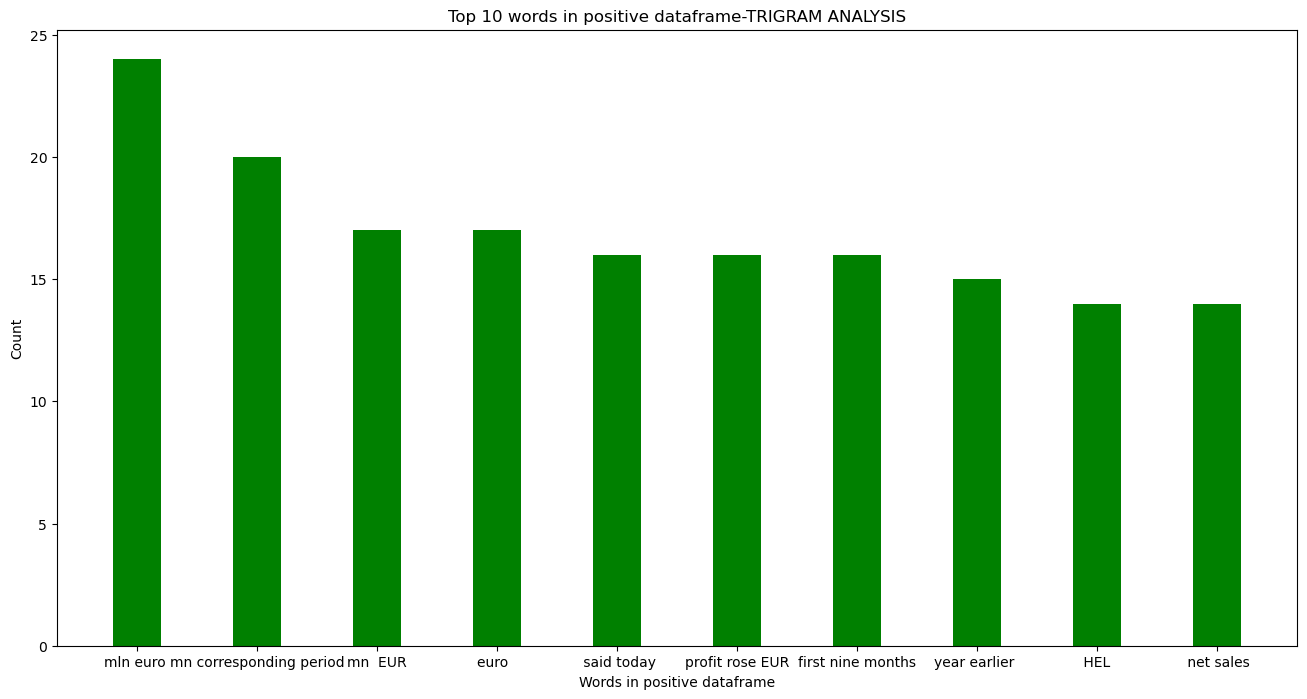

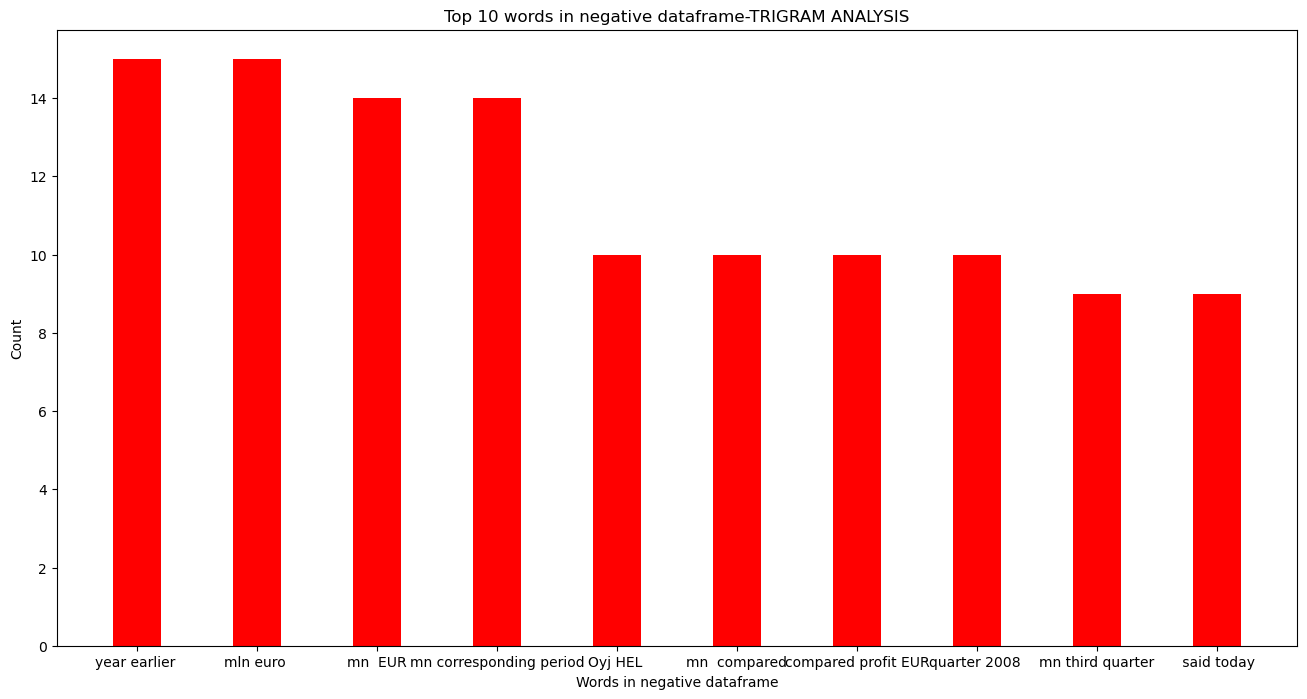

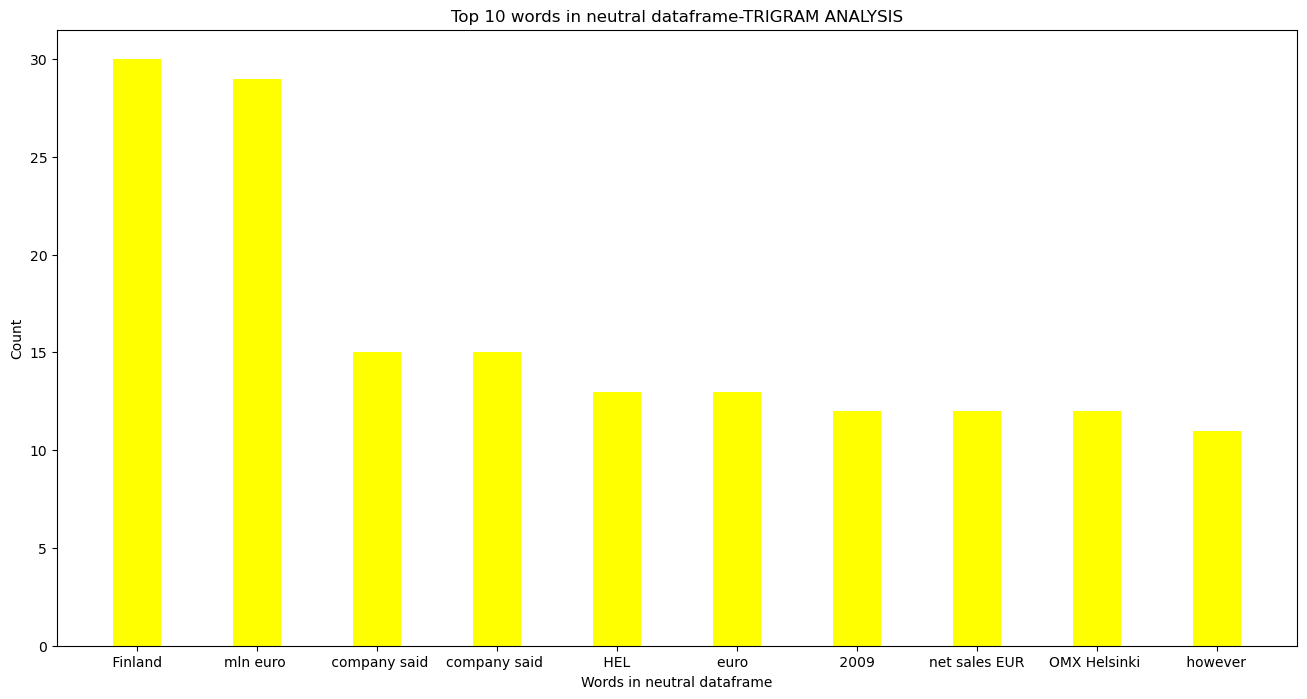

In [49]:
plt.figure(1,figsize=(16,8))
plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-TRIGRAM ANALYSIS")
plt.savefig("positive-trigram.png")

plt.figure(2,figsize=(16,8))
plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4) 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-TRIGRAM ANALYSIS")
plt.savefig("negative-trigram.png")

plt.figure(3,figsize=(16,8))
plt.bar(nud1tri,nud2tri, color ='yellow',
        width = 0.4) 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-TRIGRAM ANALYSIS")
plt.savefig("neutral-trigram.png")

plt.show()